# Major League Baseball Gold Glove Winners Prediction

### Libraries and Packages

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score, mean_squared_error

In [75]:
import warnings
warnings.filterwarnings('ignore')

In [76]:
# Load data for all positions

# Catcher
league_catcher = pd.read_csv("/Users/yejinchoi/Desktop/mlb-gold-glove-award-prediction/league-catcher.csv")
player_catcher = pd.read_csv("/Users/yejinchoi/Desktop/mlb-gold-glove-award-prediction/player-catcher.csv")

# Pitcher
league_pitcher = pd.read_csv("/Users/yejinchoi/Desktop/mlb-gold-glove-award-prediction/league-pitcher.csv")
player_pitcher = pd.read_csv("/Users/yejinchoi/Desktop/mlb-gold-glove-award-prediction/player-pitcher.csv")

# First Base
league_first_base = pd.read_csv("/Users/yejinchoi/Desktop/mlb-gold-glove-award-prediction/league-first-base.csv")
player_first_base = pd.read_csv("/Users/yejinchoi/Desktop/mlb-gold-glove-award-prediction/player-first-base.csv")

# Second Base
league_second_base = pd.read_csv("/Users/yejinchoi/Desktop/mlb-gold-glove-award-prediction/league-second-base.csv")
player_second_base = pd.read_csv("/Users/yejinchoi/Desktop/mlb-gold-glove-award-prediction/player-second-base.csv")

# Shortstop
league_shortstop = pd.read_csv("/Users/yejinchoi/Desktop/mlb-gold-glove-award-prediction/league-shortstop.csv")
player_shortstop = pd.read_csv("/Users/yejinchoi/Desktop/mlb-gold-glove-award-prediction/player-shortstop.csv")

# Third Base
league_third_base = pd.read_csv("/Users/yejinchoi/Desktop/mlb-gold-glove-award-prediction/league-third-base.csv")
player_third_base = pd.read_csv("/Users/yejinchoi/Desktop/mlb-gold-glove-award-prediction/player-third-base.csv")

# Left Field
league_left_field = pd.read_csv("/Users/yejinchoi/Desktop/mlb-gold-glove-award-prediction/league-left-field.csv")
player_left_field = pd.read_csv("/Users/yejinchoi/Desktop/mlb-gold-glove-award-prediction/player-left-field.csv")

# Center Field
league_center_field = pd.read_csv("/Users/yejinchoi/Desktop/mlb-gold-glove-award-prediction/league-center-field.csv")
player_center_field = pd.read_csv("/Users/yejinchoi/Desktop/mlb-gold-glove-award-prediction/player-center-field.csv")

# Right Field
league_right_field = pd.read_csv("/Users/yejinchoi/Desktop/mlb-gold-glove-award-prediction/league-right-field.csv")
player_right_field = pd.read_csv("/Users/yejinchoi/Desktop/mlb-gold-glove-award-prediction/player-right-field.csv")


### Catcher

In [77]:
player_catcher

,Name,Age,Tm,Lg,Season,Champion,G,GS,CG,Inn,...,RerC,RF/9,RF/G,PB,WP,SB,CS,CS%,Win,Unnamed: 36
0,Riley Adams,28,WSN,NL,2024,0,40,36,29,314.1,...,1,8.27,7.23,3,18,31,3,9%,0,NaN
1,Francisco Alvarez,22,NYM,NL,2024,0,96,82,70,726.0,...,3,9.92,8.33,11,40,66,14,18%,0,NaN
2,Miguel Amaya,25,CHC,NL,2024,0,116,103,88,905.2,...,5,8.81,7.65,6,19,78,18,19%,0,NaN
3,Patrick Bailey,25,SFG,NL,2024,0,115,101,98,908.0,...,1,9.51,8.34,9,25,70,26,27%,1,NaN
4,Austin Barnes,34,LAD,NL,2024,1,45,42,38,366.1,...,0,9.29,8.40,1,9,48,5,9%,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1311,Josh Thole,26,TOR,AL,2013,0,39,34,23,288.1,...,-1,8.30,6.82,9,12,22,8,27%,0,NaN
1312,Yorvit Torrealba,34,COL,NL,2013,0,50,48,43,422.0,...,-1,7.59,7.12,2,13,32,13,29%,0,NaN
1313,Stephen Vogt,28,OAK,AL,2013,0,44,40,28,335.2,...,1,8.39,7.11,6,10,20,9,31%,0,NaN
1314,Matt Wieters,27,BAL,AL,2013,0,140,134,127,1201.0,...,-12,8.09,7.71,5,28,44,24,35%,0,NaN


In [78]:
league_catcher

,Season,Lg,#Fld,RA/G,G,GS,CG,Inn,Ch,PO,...,Rrange,Rthrow,RszC,RsbC,RerC,PB,WP,SB,CS,CS%
0,2024,AL,3,4.34,162,162,142,1436,1472,1403,...,0,0,2,0,0,7,46,113,31,22%
1,2023,AL,4,4.57,162,162,137,1439,1511,1441,...,-1,0,1,0,-1,8,56,111,29,21%
2,2022,AL,4,4.20,162,162,140,1437,1438,1368,...,0,0,1,0,0,8,56,82,27,25%
3,2021,AL,4,4.58,162,162,142,1423,1488,1415,...,0,0,0,0,0,12,68,74,23,23%
4,2020,AL,4,4.63,60,60,50,519,552,524,...,0,0,0,0,0,5,23,29,10,26%
5,2019,AL,4,4.95,162,162,141,1446,1507,1425,...,0,0,-2,0,1,12,67,76,29,27%
6,2018,AL,4,4.56,162,162,143,1444,1463,1369,...,-1,0,0,0,0,15,68,83,32,28%
7,2017,AL,4,4.67,162,162,140,1442,1428,1341,...,-1,0,2,0,0,13,63,85,31,27%
8,2016,AL,4,4.47,162,162,142,1441,1380,1291,...,0,0,-1,0,0,13,59,75,31,29%
9,2015,AL,4,4.29,162,162,142,1446,1337,1239,...,0,0,-1,1,0,12,63,76,35,32%


In [79]:
# Drop unwanted columns
player_catcher = player_catcher.drop(columns=['Unnamed: 36', 'RF/9', 'RF/G'])
league_catcher = league_catcher.drop(columns=['#Fld', 'RA/G'])

# Convert CS% columns to numeric for normalization
player_catcher["CS%"] = player_catcher["CS%"].str.rstrip("%").astype(float) / 100
league_catcher["CS%"] = league_catcher["CS%"].str.rstrip("%").astype(float) / 100


In [80]:
# Check for missing values
missing_values = player_catcher.isnull().sum()
print("Missing Values:")
print(missing_values[missing_values > 0])

Missing Values:
Fld%       10
Rtot        1
Rtot/yr     1
Rctch       1
Rdrs/yr     1
Rair       39
Rrange     12
Rthrow     12
CS%        87
dtype: int64


In [81]:
# Drop rows with missing values
player_catcher = player_catcher.dropna()

In [222]:
# Generate basic statistics
print(player_catcher.describe())

               Age       Season     Champion            G           GS  \
count  1224.000000  1224.000000  1224.000000  1224.000000  1224.000000   
mean     28.588235  2018.505719     0.060458    50.507353    45.085784   
std       3.721989     3.420390     0.238430    37.964673    36.364310   
min      21.000000  2013.000000     0.000000     1.000000     0.000000   
25%      26.000000  2016.000000     0.000000    17.000000    13.000000   
50%      28.000000  2018.500000     0.000000    43.000000    37.000000   
75%      31.000000  2021.000000     0.000000    81.000000    72.000000   
max      41.000000  2024.000000     1.000000   146.000000   143.000000   

                CG          Inn           Ch           PO            A  ...  \
count  1224.000000  1224.000000  1224.000000  1224.000000  1224.000000  ...   
mean     39.628268   400.742075   399.676471   375.754902    21.164216  ...   
std      33.384818   320.711831   321.958284   303.246471    18.999419  ...   
min       0.00000

In [ ]:
# Display the column names
player_catcher.columns

Index(['Name', 'Age', 'Tm', 'Lg', 'Season', 'Champion', 'G', 'GS', 'CG', 'Inn',
       'Ch', 'PO', 'A', 'E', 'DP', 'Fld%', 'Rtot', 'Rtot/yr', 'Rctch', 'Rdrs',
       'Rdrs/yr', 'Rgood', 'Rair', 'Rrange', 'Rthrow', 'RszC', 'RsbC', 'RerC',
       'PB', 'WP', 'SB', 'CS', 'CS%', 'Win'],
      dtype='object')

In [83]:
# Merge player and league datasets on 'Season' and 'Lg', keeping all player rows
catcher = player_catcher.merge(
    league_catcher,
    on=["Season", "Lg"],
    suffixes=("_player", "_league"),
    how="left"
)

# Add the 'Win' column to the merged dataset
catcher["Win"] = player_catcher["Win"].values

# List of columns containing player and league metrics to be normalized
columns = [
    "G", "GS", "CG", "Inn", "Ch", "PO", "A", "E", "DP", "Fld%", 
    "Rtot", "Rtot/yr", "Rctch", "Rdrs", "Rdrs/yr", "Rgood", "Rair",
    "Rrange", "Rthrow", "RszC", "RsbC", "RerC", "PB", "WP", "SB", "CS", "CS%"
]

# Create a copy of the merged dataset for normalization
normalized_catcher = catcher.copy()

# Normalize the columns with player fielding metrics
for col in columns:
    if f"{col}_player" in catcher and f"{col}_league" in catcher:
        # Perform normalization and handle invalid values
        normalized_col = catcher[f"{col}_player"] / catcher[f"{col}_league"]
        normalized_col.replace([float('inf'), float('-inf')], pd.NA, inplace=True)  # Replace inf with NA
        normalized_col.fillna(catcher[f"{col}_player"], inplace=True)  # Revert to original value if invalid
        normalized_catcher[col] = normalized_col

# Drop extra columns from normalization dataset
for col in columns:
    normalized_catcher = normalized_catcher.drop(columns=[f"{col}_player", f"{col}_league"], errors='ignore')


In [84]:
normalized_catcher

,Name,Age,Tm,Lg,Season,Champion,Win,G,GS,CG,...,Rrange,Rthrow,RszC,RsbC,RerC,PB,WP,SB,CS,CS%
0,Riley Adams,28,WSN,NL,2024,0,0,0.246914,0.222222,0.204225,...,0.0,0.0,0.5,-0.0,1.0,0.333333,0.360000,0.242188,0.090909,0.450000
1,Francisco Alvarez,22,NYM,NL,2024,0,0,0.592593,0.506173,0.492958,...,-1.0,0.0,-3.5,2.0,3.0,1.222222,0.800000,0.515625,0.424242,0.900000
2,Miguel Amaya,25,CHC,NL,2024,0,0,0.716049,0.635802,0.619718,...,0.0,0.0,1.0,3.0,5.0,0.666667,0.380000,0.609375,0.545455,0.950000
3,Patrick Bailey,25,SFG,NL,2024,0,1,0.709877,0.623457,0.690141,...,-2.0,1.0,-7.5,-5.0,1.0,1.000000,0.500000,0.546875,0.787879,1.350000
4,Austin Barnes,34,LAD,NL,2024,1,0,0.277778,0.259259,0.267606,...,1.0,-1.0,-0.5,2.0,0.0,0.111111,0.180000,0.375000,0.151515,0.450000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219,Josh Thole,26,TOR,AL,2013,0,0,0.240741,0.209877,0.161972,...,0.0,0.0,0.0,-0.0,-1.0,0.692308,0.200000,0.234043,0.242424,1.038462
1220,Yorvit Torrealba,34,COL,NL,2013,0,0,0.308642,0.296296,0.290541,...,0.0,0.0,0.0,0.0,-1.0,0.222222,0.236364,0.376471,0.382353,1.035714
1221,Stephen Vogt,28,OAK,AL,2013,0,0,0.271605,0.246914,0.197183,...,0.0,0.0,-1.0,-1.0,1.0,0.461538,0.166667,0.212766,0.272727,1.192308
1222,Matt Wieters,27,BAL,AL,2013,0,0,0.864198,0.827160,0.894366,...,0.0,1.0,-2.0,-2.0,-12.0,0.384615,0.466667,0.468085,0.727273,1.346154


In [85]:
# Split the data into training and testing sets
catcher_train_data = normalized_catcher[normalized_catcher['Season'] != 2024]
catcher_test_data = normalized_catcher[normalized_catcher['Season'] == 2024]

# Define features and target
features = [
    'Champion', 'G', 'GS', 'CG', 'Inn', 'Ch', 'PO', 'A', 'E', 'DP', 
    'Fld%', 'Rtot', 'Rtot/yr', 'Rctch', 'Rdrs', 'Rdrs/yr', 'Rgood', 'Rair', 
    'Rrange', 'Rthrow', 'RszC', 'RsbC', 'RerC', 'PB', 'WP', 'SB', 'CS', 'CS%'
]
target = 'Win'

# Extract features and target
catcher_X_train = catcher_train_data[features]
catcher_y_train = catcher_train_data[target]
catcher_X_test = catcher_test_data[features]
catcher_y_test = catcher_test_data[target]

In [86]:
# Define hyperparameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=1),
    param_grid=param_grid_rf,
    scoring='roc_auc',
    cv=5
)

# Fit GridSearchCV
grid_search_rf.fit(catcher_X_train, catcher_y_train)

# Get the best model
best_rf = grid_search_rf.best_estimator_
print("\nBest Hyperparameters for Random Forest:")
print(grid_search_rf.best_params_)

# Predict probabilities for class 1
y_pred_prob_rf = best_rf.predict_proba(catcher_X_test)[:, 1]

# Add probabilities to the test dataset
catcher_test_data['RF_Probability_Class_1'] = y_pred_prob_rf

# Predict class labels for the test set
y_pred_rf = best_rf.predict(catcher_X_test)

# Evaluate the model
print("\nClassification Report for Random Forest:")
print(classification_report(catcher_y_test, y_pred_rf))
print(f"ROC AUC Score for Random Forest: {roc_auc_score(catcher_y_test, y_pred_prob_rf):.4f}")
print(f"Mean Squared Error for Random Forest: {mean_squared_error(catcher_y_test, y_pred_prob_rf):.4f}")

# Output top players by league
catcher_test_data_subset = catcher_test_data[['Name', 'Tm', 'Lg', 'Win', 'RF_Probability_Class_1']]
leagues = catcher_test_data_subset.groupby('Lg')
for league, group in leagues:
    print(f"\nTop Players in {league} League for Random Forest:")
    top_players = group.sort_values(by='RF_Probability_Class_1', ascending=False).head(10)
    print(top_players[['Name', 'Tm', 'Lg', 'Win', 'RF_Probability_Class_1']])


Best Hyperparameters for Random Forest:
{'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        93
           1       0.00      0.00      0.00         2

    accuracy                           0.98        95
   macro avg       0.49      0.50      0.49        95
weighted avg       0.96      0.98      0.97        95

ROC AUC Score for Random Forest: 0.9866
Mean Squared Error for Random Forest: 0.0143

Top Players in AL League for Random Forest:
               Name   Tm  Lg  Win  RF_Probability_Class_1
66      Cal Raleigh  SEA  AL    1                0.290833
45  Shea Langeliers  OAK  AL    0                0.140000
23    Freddy Fermin  KCR  AL    0                0.114167
33       Jonah Heim  TEX  AL    0                0.070833
42   Alejandro Kirk  TOR  AL    0                0.049167
61  


Feature Importance for Random Forest:



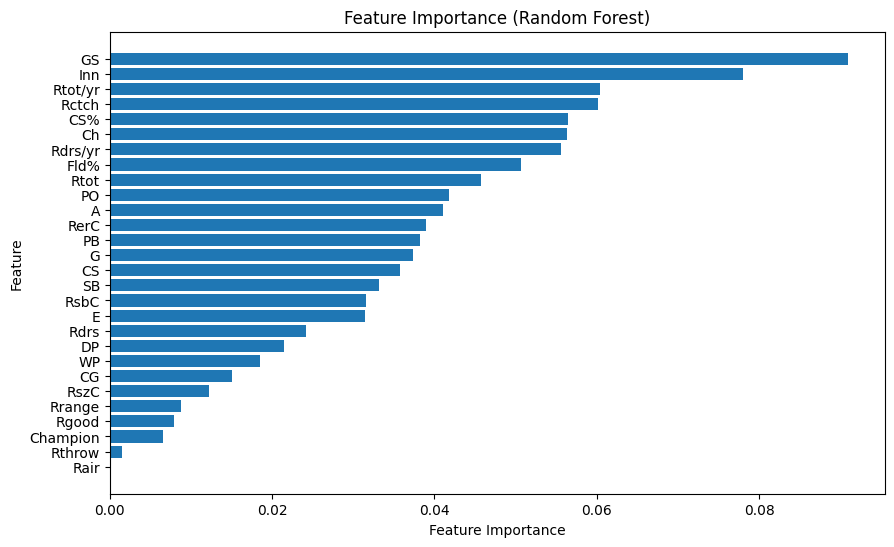

In [87]:
# Feature importance for Random Forest
print("\nFeature Importance for Random Forest:\n")

# Get feature importances and sort by importance
rf_importances = best_rf.feature_importances_
sorted_idx = np.argsort(rf_importances)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh([features[i] for i in sorted_idx], rf_importances[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance (Random Forest)")
plt.gca().invert_yaxis()
plt.show()

In [88]:
# Define hyperparameter grid for Logistic Regression
param_grid_lr = {
    'penalty': ['l1', 'l2'],
    'max_iter': [100, 500, 1000]
}

grid_search_lr = GridSearchCV(
    estimator=LogisticRegression(random_state=1),
    param_grid=param_grid_lr,
    scoring='roc_auc',
    cv=5
)

# Fit GridSearchCV
grid_search_lr.fit(catcher_X_train, catcher_y_train)

# Get the best model
best_lr = grid_search_lr.best_estimator_
print("\nBest Hyperparameters for Logistic Regression:")
print(grid_search_lr.best_params_)

# Predict probabilities for class 1
y_pred_prob_lr = best_lr.predict_proba(catcher_X_test)[:, 1]

# Add probabilities to the test dataset
catcher_test_data['LR_Probability_Class_1'] = y_pred_prob_lr

# Predict class labels for the test set
y_pred_lr = best_lr.predict(catcher_X_test)

# Evaluate the model
print("\nClassification Report for Logistic Regression:")
print(classification_report(catcher_y_test, y_pred_lr))
print(f"ROC AUC Score for Logistic Regression: {roc_auc_score(catcher_y_test, y_pred_prob_lr):.4f}")
print(f"Mean Squared Error for Logistic Regression: {mean_squared_error(catcher_y_test, y_pred_prob_lr):.4f}")


# Output top players by league
catcher_test_data_subset = catcher_test_data[['Name', 'Tm', 'Lg', 'Win', 'LR_Probability_Class_1']]
leagues = catcher_test_data_subset.groupby('Lg')
for league, group in leagues:
    print(f"\nTop Players in {league} League for Logistic Regression:")
    top_players = group.sort_values(by='LR_Probability_Class_1', ascending=False).head(10)
    print(top_players[['Name', 'Tm', 'Lg', 'Win', 'LR_Probability_Class_1']])


Best Hyperparameters for Logistic Regression:
{'max_iter': 100, 'penalty': 'l2'}

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        93
           1       0.00      0.00      0.00         2

    accuracy                           0.98        95
   macro avg       0.49      0.50      0.49        95
weighted avg       0.96      0.98      0.97        95

ROC AUC Score for Logistic Regression: 0.9032
Mean Squared Error for Logistic Regression: 0.0162

Top Players in AL League for Logistic Regression:
                Name   Tm  Lg  Win  LR_Probability_Class_1
66       Cal Raleigh  SEA  AL    1                0.328776
23     Freddy Fermin  KCR  AL    0                0.285345
91      Austin Wells  NYY  AL    0                0.090061
81  Tyler Soderstrom  OAK  AL    0                0.066065
70       Jake Rogers  DET  AL    0                0.062252
34    Tyler Heineman  TOR  AL    0       

In [89]:
# Define hyperparameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_gb = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=1),
    param_grid=param_grid_gb,
    scoring='roc_auc',
    cv=5
)

# Fit GridSearchCV
grid_search_gb.fit(catcher_X_train, catcher_y_train)

# Get the best model
best_gb = grid_search_gb.best_estimator_
print("\nBest Hyperparameters for Gradient Boosting:")
print(grid_search_gb.best_params_)

# Predict probabilities for class 1
y_pred_prob_gb = best_gb.predict_proba(catcher_X_test)[:, 1]

# Add probabilities to the test dataset
catcher_test_data['GB_Probability_Class_1'] = y_pred_prob_gb

# Predict class labels for the test set
y_pred_gb = best_gb.predict(catcher_X_test)

# Evaluate the model
print("\nClassification Report for Gradient Boosting:")
print(classification_report(catcher_y_test, y_pred_gb))
print(f"ROC AUC Score for Gradient Boosting: {roc_auc_score(catcher_y_test, y_pred_prob_gb):.4f}")
print(f"Mean Squared Error for Gradient Boosting: {mean_squared_error(catcher_y_test, y_pred_prob_gb):.4f}")

# Output top players by league
catcher_test_data_subset = catcher_test_data[['Name', 'Tm', 'Lg', 'Win', 'GB_Probability_Class_1']]
leagues = catcher_test_data_subset.groupby('Lg')
for league, group in leagues:
    print(f"\nTop Players in {league} League for Gradient Boosting:")
    top_players = group.sort_values(by='GB_Probability_Class_1', ascending=False).head(10)
    print(top_players[['Name', 'Tm', 'Lg', 'Win', 'GB_Probability_Class_1']])



Best Hyperparameters for Gradient Boosting:
{'learning_rate': 0.2, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}

Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        93
           1       0.00      0.00      0.00         2

    accuracy                           0.98        95
   macro avg       0.49      0.50      0.49        95
weighted avg       0.96      0.98      0.97        95

ROC AUC Score for Gradient Boosting: 0.9677
Mean Squared Error for Gradient Boosting: 0.0210

Top Players in AL League for Gradient Boosting:
               Name   Tm  Lg  Win  GB_Probability_Class_1
42   Alejandro Kirk  TOR  AL    0                0.001467
33       Jonah Heim  TEX  AL    0                0.000093
23    Freddy Fermin  KCR  AL    0                0.000024
91     Austin Wells  NYY  AL    0                0.000022
66      Cal Raleigh  SEA  AL    1         


Feature Importance for Gradient Boosting:



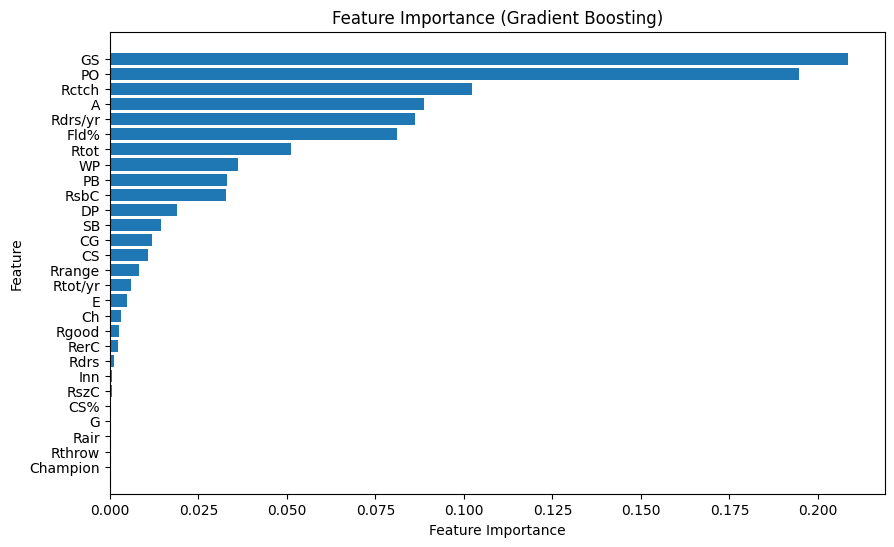

In [90]:
# Feature importance for Gradient Boosting
print("\nFeature Importance for Gradient Boosting:\n")

# Get feature importances and sort by importance
gb_importances = best_gb.feature_importances_
sorted_idx = np.argsort(gb_importances)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh([features[i] for i in sorted_idx], gb_importances[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance (Gradient Boosting)")
plt.gca().invert_yaxis()
plt.show()

In [91]:
# Define the hyperparameter grid for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

grid_search_knn = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid_knn,
    scoring='roc_auc',
    cv=5
)

# Fit GridSearchCV
grid_search_knn.fit(catcher_X_train, catcher_y_train)

# Get the best model
best_knn = grid_search_knn.best_estimator_
print("\nBest Hyperparameters for KNN:")
print(grid_search_knn.best_params_)

# Predict probabilities for class 1
y_pred_prob_knn = best_knn.predict_proba(catcher_X_test)[:, 1]  # Probability for class 1

# Add probabilities to the test dataset
catcher_test_data['KNN_Probability_Class_1'] = y_pred_prob_knn

# Predict class labels for the test set
y_pred_knn = best_knn.predict(catcher_X_test)

# Evaluate the model
print("\nClassification Report for KNN:")
print(classification_report(catcher_y_test, y_pred_knn))
print(f"ROC AUC Score for KNN: {roc_auc_score(catcher_y_test, y_pred_prob_knn):.4f}")
print(f"Mean Squared Error for KNN: {mean_squared_error(catcher_y_test, y_pred_prob_knn):.4f}")

# Output top players by league
catcher_test_data_subset = catcher_test_data[['Name', 'Tm', 'Lg', 'Win', 'KNN_Probability_Class_1']]
leagues = catcher_test_data_subset.groupby('Lg')
for league, group in leagues:
    print(f"\nTop Players in {league} League for KNN:")
    top_players = group.sort_values(by='KNN_Probability_Class_1', ascending=False).head(10)
    print(top_players[['Name', 'Tm', 'Lg', 'Win', 'KNN_Probability_Class_1']])



Best Hyperparameters for KNN:
{'n_neighbors': 11, 'p': 1, 'weights': 'uniform'}

Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        93
           1       0.00      0.00      0.00         2

    accuracy                           0.98        95
   macro avg       0.49      0.50      0.49        95
weighted avg       0.96      0.98      0.97        95

ROC AUC Score for KNN: 0.7151
Mean Squared Error for KNN: 0.0199

Top Players in AL League for KNN:
               Name   Tm  Lg  Win  KNN_Probability_Class_1
23    Freddy Fermin  KCR  AL    0                 0.272727
33       Jonah Heim  TEX  AL    0                 0.181818
59        Bo Naylor  CLE  AL    0                 0.090909
19      Yainer Diaz  HOU  AL    0                 0.090909
91     Austin Wells  NYY  AL    0                 0.090909
64   Salvador Perez  KCR  AL    0                 0.090909
74  Adley Rutschman  BAL  AL    0              

In [92]:
# Define hyperparameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel type
    'degree': [2, 3],  # Degree for polynomial kernel
    'gamma': ['scale', 'auto'],  # Kernel coefficient
}

grid_search_svm = GridSearchCV(
    estimator=SVC(probability=True, random_state=1),
    param_grid=param_grid_svm,
    scoring='roc_auc',
    cv=5
)

# Fit GridSearchCV
grid_search_svm.fit(catcher_X_train, catcher_y_train)

# Get the best model
best_svm = grid_search_svm.best_estimator_
print("\nBest Hyperparameters for SVM:")
print(grid_search_svm.best_params_)

# Predict probabilities for class 1
y_pred_prob_svm = best_svm.predict_proba(catcher_X_test)[:, 1]

# Add probabilities to the test dataset
catcher_test_data['SVM_Probability_Class_1'] = y_pred_prob_svm

# Predict class labels for the test set
y_pred_svm = best_svm.predict(catcher_X_test)

# Evaluate the model
print("\nClassification Report for SVM:")
print(classification_report(catcher_y_test, y_pred_svm))
print(f"ROC AUC Score for SVM: {roc_auc_score(catcher_y_test, y_pred_prob_svm):.4f}")
print(f"Mean Squared Error for SVM: {mean_squared_error(catcher_y_test, y_pred_prob_svm):.4f}")

# Output top players by league
catcher_test_data_subset = catcher_test_data[['Name', 'Tm', 'Lg', 'Win', 'SVM_Probability_Class_1']]
leagues = catcher_test_data_subset.groupby('Lg')
for league, group in leagues:
    print(f"\nTop Players in {league} League for SVM:")
    top_players = group.sort_values(by='SVM_Probability_Class_1', ascending=False).head(10)
    print(top_players[['Name', 'Tm', 'Lg', 'Win', 'SVM_Probability_Class_1']])


Best Hyperparameters for SVM:
{'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}

Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98        93
           1       0.00      0.00      0.00         2

    accuracy                           0.97        95
   macro avg       0.49      0.49      0.49        95
weighted avg       0.96      0.97      0.96        95

ROC AUC Score for SVM: 0.9086
Mean Squared Error for SVM: 0.0201

Top Players in AL League for SVM:
                 Name   Tm  Lg  Win  SVM_Probability_Class_1
81   Tyler Soderstrom  OAK  AL    0                 0.369026
66        Cal Raleigh  SEA  AL    1                 0.129703
23      Freddy Fermin  KCR  AL    0                 0.123540
70        Jake Rogers  DET  AL    0                 0.082911
91       Austin Wells  NYY  AL    0                 0.073851
19        Yainer Diaz  HOU  AL    0                 0.030696
61      Logan O'Hoppe 

### Pitcher

In [93]:
player_pitcher

,Name,Age,Tm,Lg,Season,Champion,G,GS,CG,Inn,...,Rrange,Rthrow,RsbP,RF/9,RF/G,SB,CS,CS%,PO.1,Win
0,Andrew Abbott,25,CIN,NL,2024,0,25,25,0,138.0,...,1.0,-1.0,0.0,0.91,0.56,10,4,29%,2,0
1,Bryan Abreu,27,HOU,AL,2024,0,78,0,0,78.1,...,-1.0,-1.0,0.0,0.92,0.10,13,3,19%,2,0
2,Jason Adam,32,TBR,AL,2024,0,74,0,0,73.2,...,1.0,0.0,-3.0,1.34,0.15,20,1,5%,1,0
3,Austin Adams,33,OAK,AL,2024,0,56,0,0,41.1,...,-1.0,0.0,0.0,0.87,0.07,4,2,33%,0,0
4,Ty Adcock,27,NYM,NL,2024,0,3,0,0,4.1,...,0.0,0.0,0.0,0.00,0.00,0,0,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9461,Mike Zagurski,30,PIT,NL,2013,0,7,0,0,6.1,...,0.0,0.0,0.0,1.42,0.14,1,0,0%,0,0
9462,Josh Zeid,26,HOU,AL,2013,0,25,0,0,27.2,...,0.0,0.0,0.0,2.28,0.28,4,2,33%,0,0
9463,Brad Ziegler,33,ARI,NL,2013,0,78,0,0,73.0,...,2.0,1.0,0.0,2.96,0.31,2,1,33%,0,0
9464,Jordan Zimmermann,27,WSN,NL,2013,0,32,32,4,213.1,...,0.0,0.0,0.0,1.69,1.25,14,5,26%,1,0


In [94]:
league_pitcher

,Season,Lg,#Fld,RA/G,G,GS,CG,Inn,Ch,PO,...,Rpm,Rgood,Rair,Rrange,Rthrow,RsbP,SB,CS,CS%,PO.1
0,2024,AL,30,4.34,162,162,1,1436,220,90,...,-1,0,0,0,-2,0,113,31,22%,9
1,2023,AL,31,4.57,162,162,1,1439,210,81,...,2,0,0,1,-2,1,111,29,21%,10
2,2022,AL,30,4.20,162,162,1,1437,192,67,...,-2,0,0,-2,-2,0,82,27,25%,7
3,2021,AL,31,4.58,162,162,1,1423,193,63,...,-1,-1,0,0,-2,-1,74,23,23%,7
4,2020,AL,25,4.63,60,60,1,519,76,26,...,0,0,0,-1,-2,0,29,10,26%,3
5,2019,AL,30,4.95,162,162,2,1446,208,71,...,-3,0,0,-2,-2,1,76,29,27%,10
6,2018,AL,28,4.56,162,162,2,1444,221,70,...,0,0,0,0,-2,0,83,32,28%,9
7,2017,AL,28,4.67,162,162,2,1442,225,73,...,-2,0,0,-2,-2,0,85,31,27%,8
8,2016,AL,26,4.47,162,162,3,1441,237,70,...,0,-1,0,0,-2,0,75,31,29%,8
9,2015,AL,26,4.29,162,162,4,1446,257,81,...,-1,0,0,0,-1,2,76,35,32%,10


In [95]:
# Drop unwanted columns
player_pitcher = player_pitcher.drop(columns=['RF/9', 'RF/G'])
league_pitcher = league_pitcher.drop(columns=['#Fld', 'RA/G'])

# Convert CS% columns to numeric for normalization
player_pitcher["CS%"] = player_pitcher["CS%"].str.rstrip("%").astype(float) / 100
league_pitcher["CS%"] = league_pitcher["CS%"].str.rstrip("%").astype(float) / 100

In [96]:
# Check for missing values
missing_values = player_pitcher.isnull().sum()
print("Missing Values:")
print(missing_values[missing_values > 0])

Missing Values:
Fld%       1409
Rdrs/yr      14
Rpm         175
Rgood      1296
Rair        902
Rrange      276
Rthrow      276
RsbP        173
CS%        2373
dtype: int64


In [97]:
# Drop rows with missing values
player_pitcher = player_pitcher.dropna()

In [223]:
# Generate basic statistics
print(player_pitcher.describe())

               Age       Season     Champion            G           GS  \
count  6662.000000  6662.000000  6662.000000  6662.000000  6662.000000   
mean     28.212549  2018.582558     0.060793    31.717202     8.085710   
std       3.709926     3.497358     0.238967    20.228707    11.061415   
min      19.000000  2013.000000     0.000000     1.000000     0.000000   
25%      25.000000  2016.000000     0.000000    15.000000     0.000000   
50%      28.000000  2018.000000     0.000000    28.000000     1.000000   
75%      31.000000  2022.000000     0.000000    46.000000    14.000000   
max      45.000000  2024.000000     1.000000    83.000000    35.000000   

                CG          Inn           Ch           PO            A  ...  \
count  6662.000000  6662.000000  6662.000000  6662.000000  6662.000000  ...   
mean      0.112579    69.282513    11.793305     3.997148     7.236265  ...   
std       0.461645    53.569982    10.663053     4.306682     6.936975  ...   
min       0.00000

In [ ]:
# Display the column names
player_pitcher.columns

Index(['Name', 'Age', 'Tm', 'Lg', 'Season', 'Champion', 'G', 'GS', 'CG', 'Inn',
       'Ch', 'PO', 'A', 'E', 'DP', 'Fld%', 'Rdrs', 'Rdrs/yr', 'Rpm', 'Rgood',
       'Rair', 'Rrange', 'Rthrow', 'RsbP', 'SB', 'CS', 'CS%', 'PO.1', 'Win'],
      dtype='object')

In [99]:
# Merge player and league datasets on 'Season' and 'Lg', keeping all player rows
pitcher = player_pitcher.merge(
    league_pitcher,
    on=["Season", "Lg"],
    suffixes=("_player", "_league"),
    how="left"
)

# Add the 'Win' column to the merged dataset
pitcher["Win"] = player_pitcher["Win"].values

# List of columns containing player and league metrics to be normalized
columns = [
    "G", "GS", "CG", "Inn", "Ch", "PO", "A", "E", "DP", "Fld%", 
    "Rdrs", "Rdrs/yr", "Rpm", "Rgood", "Rair", "Rrange", "Rthrow",
    "RsbP", "SB", "CS", "CS%", "PO.1"
]

# Create a copy of the merged dataset for normalization
normalized_pitcher = pitcher.copy()

# Normalize the columns with player fielding metrics
for col in columns:
    if f"{col}_player" in pitcher and f"{col}_league" in pitcher:
        # Perform normalization and handle invalid values
        normalized_col = pitcher[f"{col}_player"] / pitcher[f"{col}_league"]
        normalized_col.replace([float('inf'), float('-inf')], pd.NA, inplace=True)  # Replace inf with NA
        normalized_col.fillna(pitcher[f"{col}_player"], inplace=True)  # Revert to original value if invalid
        normalized_pitcher[col] = normalized_col

# Drop extra columns from normalization dataset
for col in columns:
    normalized_pitcher = normalized_pitcher.drop(columns=[f"{col}_player", f"{col}_league"], errors='ignore')


In [100]:
normalized_pitcher

,Name,Age,Tm,Lg,Season,Champion,Win,G,GS,CG,...,Rpm,Rgood,Rair,Rrange,Rthrow,RsbP,SB,CS,CS%,PO.1
0,Andrew Abbott,25,CIN,NL,2024,0,0,0.154321,0.154321,0.0,...,1.0,-0.0,0.0,1.0,0.5,-0.0,0.078125,0.121212,1.450000,0.166667
1,Bryan Abreu,27,HOU,AL,2024,0,0,0.481481,0.000000,0.0,...,2.0,0.0,0.0,-1.0,0.5,0.0,0.115044,0.096774,0.863636,0.222222
2,Jason Adam,32,TBR,AL,2024,0,0,0.456790,0.000000,0.0,...,-1.0,0.0,0.0,1.0,-0.0,-3.0,0.176991,0.032258,0.227273,0.111111
3,Austin Adams,33,OAK,AL,2024,0,0,0.345679,0.000000,0.0,...,1.0,0.0,0.0,-1.0,-0.0,0.0,0.035398,0.064516,1.500000,0.000000
4,Joan Adon,25,WSN,NL,2024,0,0,0.049383,0.006173,0.0,...,1.0,-0.0,0.0,1.0,-0.0,-0.0,0.007812,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6657,Mike Zagurski,30,PIT,NL,2013,0,0,0.043210,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.011765,0.000000,0.000000,0.000000
6658,Josh Zeid,26,HOU,AL,2013,0,0,0.154321,0.000000,0.0,...,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.042553,0.060606,1.269231,0.000000
6659,Brad Ziegler,33,ARI,NL,2013,0,0,0.481481,0.000000,0.0,...,3.0,-1.0,0.0,2.0,1.0,0.0,0.023529,0.029412,1.178571,0.000000
6660,Jordan Zimmermann,27,WSN,NL,2013,0,0,0.197531,0.197531,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.164706,0.147059,0.928571,0.100000


In [101]:
# Split the data into training and testing sets
pitcher_train_data = normalized_pitcher[normalized_pitcher['Season'] != 2024]
pitcher_test_data = normalized_pitcher[normalized_pitcher['Season'] == 2024]

# Define features and target
features = [
    'Champion', 'G', 'GS', 'CG', 'Inn', 'Ch', 'PO', 'A', 'E', 'DP',
    'Fld%', 'Rdrs', 'Rdrs/yr', 'Rpm', 'Rgood', 'Rair', 'Rrange', 'Rthrow',
    'RsbP', 'SB', 'CS', 'CS%', 'PO.1'
]
target = 'Win'

# Extract features and target
pitcher_X_train = pitcher_train_data[features]
pitcher_y_train = pitcher_train_data[target]
pitcher_X_test = pitcher_test_data[features]
pitcher_y_test = pitcher_test_data[target]

In [102]:
# Define hyperparameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=1),
    param_grid=param_grid_rf,
    scoring='roc_auc',
    cv=5
)

# Fit GridSearchCV
grid_search_rf.fit(pitcher_X_train, pitcher_y_train)

# Get the best model
best_rf = grid_search_rf.best_estimator_
print("\nBest Hyperparameters for Random Forest:")
print(grid_search_rf.best_params_)

# Predict probabilities for class 1
y_pred_prob_rf = best_rf.predict_proba(pitcher_X_test)[:, 1]

# Add probabilities to the test dataset
pitcher_test_data['RF_Probability_Class_1'] = y_pred_prob_rf

# Predict class labels for the test set
y_pred_rf = best_rf.predict(pitcher_X_test)

# Evaluate the model
print("\nClassification Report for Random Forest:")
print(classification_report(pitcher_y_test, y_pred_rf))
print(f"ROC AUC Score for Random Forest: {roc_auc_score(pitcher_y_test, y_pred_prob_rf):.4f}")
print(f"Mean Squared Error for Random Forest: {mean_squared_error(pitcher_y_test, y_pred_prob_rf):.4f}")

# Output top players by league
pitcher_test_data_subset = pitcher_test_data[['Name', 'Tm', 'Lg', 'Win', 'RF_Probability_Class_1']]
leagues = pitcher_test_data_subset.groupby('Lg')
for league, group in leagues:
    print(f"\nTop Players in {league} League for Random Forest:")
    top_players = group.sort_values(by='RF_Probability_Class_1', ascending=False).head(10)
    print(top_players[['Name', 'Tm', 'Lg', 'Win', 'RF_Probability_Class_1']])


Best Hyperparameters for Random Forest:
{'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       602
           1       0.00      0.00      0.00         2

    accuracy                           1.00       604
   macro avg       0.50      0.50      0.50       604
weighted avg       0.99      1.00      1.00       604

ROC AUC Score for Random Forest: 0.9792
Mean Squared Error for Random Forest: 0.0029

Top Players in AL League for Random Forest:
                 Name   Tm  Lg  Win  RF_Probability_Class_1
319         Seth Lugo  KCR  AL    1                0.229255
239      Tanner Houck  BOS  AL    0                0.134076
188     Logan Gilbert  SEA  AL    0                0.046783
146    Nathan Eovaldi  TEX  AL    0                0.028300
492      Brady Singer  KCR  AL    0                0


Feature Importance for Random Forest:



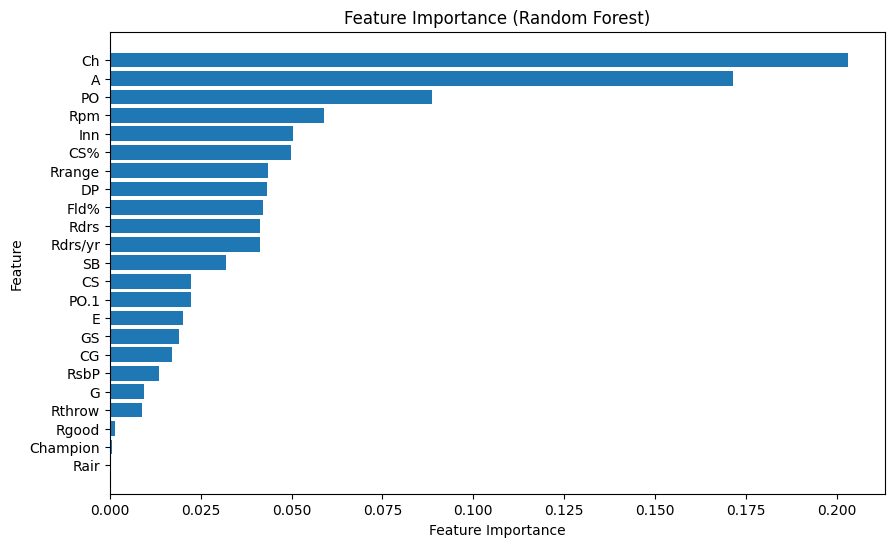

In [103]:
# Feature importance for Random Forest
print("\nFeature Importance for Random Forest:\n")

# Get feature importances and sort by importance
rf_importances = best_rf.feature_importances_
sorted_idx = np.argsort(rf_importances)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh([features[i] for i in sorted_idx], rf_importances[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance (Random Forest)")
plt.gca().invert_yaxis()
plt.show()

In [104]:
# Define hyperparameter grid for Logistic Regression
param_grid_lr = {
    'penalty': ['l1', 'l2'],
    'max_iter': [100, 500, 1000]
}

grid_search_lr = GridSearchCV(
    estimator=LogisticRegression(random_state=1),
    param_grid=param_grid_lr,
    scoring='roc_auc',
    cv=5
)

# Fit GridSearchCV
grid_search_lr.fit(pitcher_X_train, pitcher_y_train)

# Get the best model
best_lr = grid_search_lr.best_estimator_
print("\nBest Hyperparameters for Logistic Regression:")
print(grid_search_lr.best_params_)

# Predict probabilities for class 1
y_pred_prob_lr = best_lr.predict_proba(pitcher_X_test)[:, 1]

# Add probabilities to the test dataset
pitcher_test_data['LR_Probability_Class_1'] = y_pred_prob_lr

# Predict class labels for the test set
y_pred_lr = best_lr.predict(pitcher_X_test)

# Evaluate the model
print("\nClassification Report for Logistic Regression:")
print(classification_report(pitcher_y_test, y_pred_lr))
print(f"ROC AUC Score for Logistic Regression: {roc_auc_score(pitcher_y_test, y_pred_prob_lr):.4f}")
print(f"Mean Squared Error for Logistic Regression: {mean_squared_error(pitcher_y_test, y_pred_prob_lr):.4f}")


# Output top players by league
pitcher_test_data_subset = pitcher_test_data[['Name', 'Tm', 'Lg', 'Win', 'LR_Probability_Class_1']]
leagues = pitcher_test_data_subset.groupby('Lg')
for league, group in leagues:
    print(f"\nTop Players in {league} League for Logistic Regression:")
    top_players = group.sort_values(by='LR_Probability_Class_1', ascending=False).head(10)
    print(top_players[['Name', 'Tm', 'Lg', 'Win', 'LR_Probability_Class_1']])


Best Hyperparameters for Logistic Regression:
{'max_iter': 100, 'penalty': 'l2'}

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       602
           1       0.00      0.00      0.00         2

    accuracy                           1.00       604
   macro avg       0.50      0.50      0.50       604
weighted avg       0.99      1.00      1.00       604

ROC AUC Score for Logistic Regression: 0.9618
Mean Squared Error for Logistic Regression: 0.0028

Top Players in AL League for Logistic Regression:
                 Name   Tm  Lg  Win  LR_Probability_Class_1
319         Seth Lugo  KCR  AL    1                0.199263
44       Tanner Bibee  CLE  AL    0                0.095227
239      Tanner Houck  BOS  AL    0                0.050683
559     Michael Wacha  KCR  AL    0                0.049017
165      Chris Flexen  CHW  AL    0                0.040400
294       Joel Kuhnel  TBR  AL    0

In [105]:
# Define hyperparameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_gb = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=1),
    param_grid=param_grid_gb,
    scoring='roc_auc',
    cv=5
)

# Fit GridSearchCV
grid_search_gb.fit(pitcher_X_train, pitcher_y_train)

# Get the best model
best_gb = grid_search_gb.best_estimator_
print("\nBest Hyperparameters for Gradient Boosting:")
print(grid_search_gb.best_params_)

# Predict probabilities for class 1
y_pred_prob_gb = best_gb.predict_proba(pitcher_X_test)[:, 1]

# Add probabilities to the test dataset
pitcher_test_data['GB_Probability_Class_1'] = y_pred_prob_gb

# Predict class labels for the test set
y_pred_gb = best_gb.predict(pitcher_X_test)

# Evaluate the model
print("\nClassification Report for Gradient Boosting:")
print(classification_report(pitcher_y_test, y_pred_gb))
print(f"ROC AUC Score for Gradient Boosting: {roc_auc_score(pitcher_y_test, y_pred_prob_gb):.4f}")
print(f"Mean Squared Error for Gradient Boosting: {mean_squared_error(pitcher_y_test, y_pred_prob_gb):.4f}")

# Output top players by league
pitcher_test_data_subset = pitcher_test_data[['Name', 'Tm', 'Lg', 'Win', 'GB_Probability_Class_1']]
leagues = pitcher_test_data_subset.groupby('Lg')
for league, group in leagues:
    print(f"\nTop Players in {league} League for Gradient Boosting:")
    top_players = group.sort_values(by='GB_Probability_Class_1', ascending=False).head(10)
    print(top_players[['Name', 'Tm', 'Lg', 'Win', 'GB_Probability_Class_1']])


Best Hyperparameters for Gradient Boosting:
{'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}

Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       602
           1       0.00      0.00      0.00         2

    accuracy                           0.99       604
   macro avg       0.50      0.50      0.50       604
weighted avg       0.99      0.99      0.99       604

ROC AUC Score for Gradient Boosting: 0.9626
Mean Squared Error for Gradient Boosting: 0.0058

Top Players in AL League for Gradient Boosting:
                Name   Tm  Lg  Win  GB_Probability_Class_1
81     Corbin Burnes  BAL  AL    0            7.542089e-01
504     José Soriano  LAA  AL    0            2.399234e-01
17    Tyler Anderson  LAA  AL    0            1.357641e-01
319        Seth Lugo  KCR  AL    1            3.321957e-06
366       Casey Mize  DET  AL    0    


Feature Importance for Gradient Boosting:



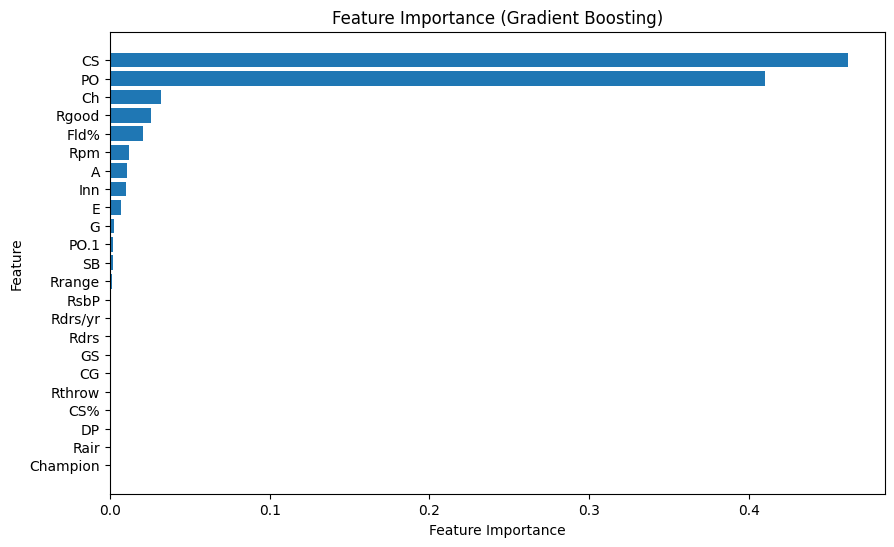

In [106]:
# Feature importance for Gradient Boosting
print("\nFeature Importance for Gradient Boosting:\n")

# Get feature importances and sort by importance
gb_importances = best_gb.feature_importances_
sorted_idx = np.argsort(gb_importances)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh([features[i] for i in sorted_idx], gb_importances[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance (Gradient Boosting)")
plt.gca().invert_yaxis()
plt.show()

In [107]:
# Define the hyperparameter grid for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Perform GridSearchCV to find the best parameters
grid_search_knn = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid_knn,
    scoring='roc_auc',
    cv=5
)

# Fit GridSearchCV
grid_search_knn.fit(pitcher_X_train, pitcher_y_train)

# Get the best model
best_knn = grid_search_knn.best_estimator_
print("\nBest Hyperparameters for KNN:")
print(grid_search_knn.best_params_)

# Predict probabilities for class 1
y_pred_prob_knn = best_knn.predict_proba(pitcher_X_test)[:, 1]  # Probability for class 1

# Add probabilities to the test dataset
pitcher_test_data['KNN_Probability_Class_1'] = y_pred_prob_knn

# Predict class labels for the test set
y_pred_knn = best_knn.predict(pitcher_X_test)

# Evaluate the model
print("\nClassification Report for KNN:")
print(classification_report(pitcher_y_test, y_pred_knn))
print(f"ROC AUC Score for KNN: {roc_auc_score(pitcher_y_test, y_pred_prob_knn):.4f}")
print(f"Mean Squared Error for KNN: {mean_squared_error(pitcher_y_test, y_pred_prob_knn):.4f}")

# Output top players by league
pitcher_test_data_subset = pitcher_test_data[['Name', 'Tm', 'Lg', 'Win', 'KNN_Probability_Class_1']]
leagues = pitcher_test_data_subset.groupby('Lg')
for league, group in leagues:
    print(f"\nTop Players in {league} League for KNN:")
    top_players = group.sort_values(by='KNN_Probability_Class_1', ascending=False).head(10)
    print(top_players[['Name', 'Tm', 'Lg', 'Win', 'KNN_Probability_Class_1']])



Best Hyperparameters for KNN:
{'n_neighbors': 9, 'p': 1, 'weights': 'distance'}

Classification Report for KNN:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       602
           1       0.00      0.00      0.00         2

    accuracy                           1.00       604
   macro avg       0.50      0.50      0.50       604
weighted avg       0.99      1.00      1.00       604

ROC AUC Score for KNN: 0.4942
Mean Squared Error for KNN: 0.0034

Top Players in AL League for KNN:
                  Name   Tm  Lg  Win  KNN_Probability_Class_1
433        Cole Ragans  KCR  AL    0                 0.110849
316   Michael Lorenzen  TEX  AL    0                 0.101182
395        Bailey Ober  MIN  AL    0                 0.098240
492       Brady Singer  KCR  AL    0                 0.091854
412  Walter Pennington  TEX  AL    0                 0.000000
407        Wes Parsons  TOR  AL    0                 0.000000
402      Chris Paddack  MI

In [108]:
# Define hyperparameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel type
    'degree': [2, 3],  # Degree for polynomial kernel
    'gamma': ['scale', 'auto'],  # Kernel coefficient
}

grid_search_svm = GridSearchCV(
    estimator=SVC(probability=True, random_state=1),
    param_grid=param_grid_svm,
    scoring='roc_auc',
    cv=5
)

# Fit GridSearchCV
grid_search_svm.fit(pitcher_X_train, pitcher_y_train)

# Get the best model
best_svm = grid_search_svm.best_estimator_
print("\nBest Hyperparameters for SVM:")
print(grid_search_svm.best_params_)

# Predict probabilities for class 1
y_pred_prob_svm = best_svm.predict_proba(pitcher_X_test)[:, 1]

# Add probabilities to the test dataset
pitcher_test_data['SVM_Probability_Class_1'] = y_pred_prob_svm

# Predict class labels for the test set
y_pred_svm = best_svm.predict(pitcher_X_test)

# Evaluate the model
print("\nClassification Report for SVM:")
print(classification_report(pitcher_y_test, y_pred_svm))
print(f"ROC AUC Score for SVM: {roc_auc_score(pitcher_y_test, y_pred_prob_svm):.4f}")
print(f"Mean Squared Error for SVM: {mean_squared_error(pitcher_y_test, y_pred_prob_svm):.4f}")

# Output top players by league
pitcher_test_data_subset = pitcher_test_data[['Name', 'Tm', 'Lg', 'Win', 'SVM_Probability_Class_1']]
leagues = pitcher_test_data_subset.groupby('Lg')
for league, group in leagues:
    print(f"\nTop Players in {league} League for SVM:")
    top_players = group.sort_values(by='SVM_Probability_Class_1', ascending=False).head(10)
    print(top_players[['Name', 'Tm', 'Lg', 'Win', 'SVM_Probability_Class_1']])


Best Hyperparameters for SVM:
{'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}

Classification Report for SVM:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       602
           1       0.00      0.00      0.00         2

    accuracy                           1.00       604
   macro avg       0.50      0.50      0.50       604
weighted avg       0.99      1.00      1.00       604

ROC AUC Score for SVM: 0.9776
Mean Squared Error for SVM: 0.0027

Top Players in AL League for SVM:
              Name   Tm  Lg  Win  SVM_Probability_Class_1
319      Seth Lugo  KCR  AL    1                 0.187070
559  Michael Wacha  KCR  AL    0                 0.041378
143     Zach Eflin  TBR  AL    0                 0.033596
239   Tanner Houck  BOS  AL    0                 0.029755
44    Tanner Bibee  CLE  AL    0                 0.022530
492   Brady Singer  KCR  AL    0                 0.022430
494   Tarik Skubal  DET  AL    0            

### First Base

In [109]:
player_first_base

,Name,Age,Tm,Lg,Season,Champion,G,GS,CG,Inn,...,Rdrs/yr,Rpm,Rgood,Rair,Rrange,Rthrow,Rbnt,RF/9,RF/G,Win
0,José Abreu,37,HOU,AL,2024,0,35,31,28,275.1,...,-9.0,-1.0,-1.0,0.0,-2.0,1.0,NaN,8.92,7.80,0
1,Pete Alonso,29,NYM,NL,2024,0,161,159,157,1412.1,...,-3.0,-4.0,2.0,-1.0,1.0,-4.0,0.0,8.14,7.94,0
2,Armando Alvarez,29,OAK,AL,2024,0,5,4,1,29.0,...,-83.0,-2.0,0.0,0.0,-2.0,0.0,NaN,6.83,4.40,0
3,Miguel Andujar,29,OAK,AL,2024,0,1,0,0,0.0,...,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.00,0
4,Jonathan Aranda,26,TBR,AL,2024,0,23,20,18,178.0,...,7.0,0.0,1.0,0.0,2.0,-2.0,NaN,7.08,6.09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2172,Vernon Wells,34,NYY,AL,2013,0,1,1,1,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,6.75,6.00,0
2173,Ryan Wheeler,24,COL,NL,2013,0,7,3,2,34.1,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,10.22,5.57,0
2174,Ty Wigginton,35,STL,NL,2013,1,7,4,2,39.2,...,-30.0,-1.0,0.0,0.0,-1.0,0.0,NaN,8.85,5.57,0
2175,Kevin Youkilis,34,NYY,AL,2013,0,6,6,3,46.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.00,7.67,0


In [110]:
league_first_base

,Season,Lg,#Fld,RA/G,G,GS,CG,Inn,Ch,PO,...,Rtz,Rdp,Rdrs,Rdrs/yr,Rpm,Rgood,Rair,Rrange,Rthrow,Rbnt
0,2024.0,AL,7.0,4.34,162.0,162.0,140.0,1436.0,1290.0,1178.0,...,0.0,0.0,19.0,0.0,-2.0,0.0,0.0,-2.0,0.0,0.0
1,2023.0,AL,6.0,4.57,162.0,162.0,137.0,1439.0,1288.0,1188.0,...,-2.0,0.0,10.0,0.0,-2.0,-1.0,0.0,-1.0,-1.0,0.0
2,2022.0,AL,6.0,4.20,162.0,162.0,142.0,1437.0,1328.0,1241.0,...,-1.0,0.0,24.0,0.0,-2.0,0.0,0.0,-1.0,-1.0,0.0
3,2021.0,AL,6.0,4.58,162.0,162.0,144.0,1423.0,1307.0,1221.0,...,-2.0,0.0,9.0,0.0,-2.0,0.0,0.0,-2.0,-1.0,0.0
4,2020.0,AL,5.0,4.63,60.0,60.0,51.0,519.0,474.0,439.0,...,1.0,0.0,4.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5,2019.0,AL,7.0,4.95,162.0,162.0,140.0,1446.0,1348.0,1252.0,...,-4.0,1.0,-8.0,0.0,-2.0,0.0,0.0,-1.0,-1.0,0.0
6,2018.0,AL,6.0,4.56,162.0,162.0,141.0,1444.0,1374.0,1281.0,...,-1.0,0.0,-4.0,0.0,-2.0,0.0,0.0,-2.0,-1.0,0.0
7,2017.0,AL,6.0,4.67,162.0,162.0,142.0,1442.0,1394.0,1295.0,...,0.0,0.0,6.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0
8,2016.0,AL,6.0,4.47,162.0,162.0,138.0,1441.0,1444.0,1349.0,...,-2.0,0.0,9.0,0.0,-2.0,1.0,0.0,-1.0,0.0,0.0
9,2015.0,AL,6.0,4.29,162.0,162.0,136.0,1446.0,1471.0,1365.0,...,-1.0,0.0,-4.0,0.0,-3.0,0.0,0.0,-2.0,-1.0,-1.0


In [111]:
# Keep rows until index 24
league_first_base = league_first_base.iloc[:24]

# Convert 'Season' column to integer
league_first_base['Season'] = league_first_base['Season'].astype(int)

# Drop unwanted columns
player_first_base = player_first_base.drop(columns=['RF/9', 'RF/G'])
league_first_base = league_first_base.drop(columns=['#Fld', 'RA/G'])

In [112]:
# Check for missing values
missing_values = player_first_base.isnull().sum()
print("Missing Values:")
print(missing_values[missing_values > 0])

Missing Values:
Fld%         83
Rtot/yr       9
Rdp         811
Rdrs/yr       9
Rpm          74
Rgood        79
Rair        269
Rrange      116
Rthrow      116
Rbnt       1369
dtype: int64


In [113]:
# Drop rows with missing values
player_first_base = player_first_base.dropna()

In [224]:
# Generate basic statistics
print(player_first_base.describe())

              Age       Season    Champion           G          GS  \
count  784.000000   784.000000  784.000000  784.000000  784.000000   
mean    29.038265  2018.067602    0.056122   65.934949   60.209184   
std      3.759170     3.437346    0.230305   49.376724   49.204472   
min     21.000000  2013.000000    0.000000    1.000000    0.000000   
25%     26.000000  2015.000000    0.000000   22.000000   17.000000   
50%     29.000000  2018.000000    0.000000   51.000000   43.500000   
75%     32.000000  2021.000000    0.000000  110.000000  101.250000   
max     42.000000  2024.000000    1.000000  162.000000  162.000000   

               CG         Inn           Ch           PO           A  ...  \
count  784.000000   784.00000   784.000000   784.000000  784.000000  ...   
mean    52.460459   531.51824   516.911990   476.727041   37.002551  ...   
std     46.687308   432.34372   425.773621   392.141590   33.811437  ...   
min      0.000000     5.00000     3.000000     2.000000    0.0000

In [ ]:
# Display the column names
player_first_base.columns

Index(['Name', 'Age', 'Tm', 'Lg', 'Season', 'Champion', 'G', 'GS', 'CG', 'Inn',
       'Ch', 'PO', 'A', 'E', 'DP', 'Fld%', 'Rtot', 'Rtot/yr', 'Rtz', 'Rdp',
       'Rdrs', 'Rdrs/yr', 'Rpm', 'Rgood', 'Rair', 'Rrange', 'Rthrow', 'Rbnt',
       'Win'],
      dtype='object')

In [115]:
# Merge player and league datasets on 'Season' and 'Lg', keeping all player rows
first_base = player_first_base.merge(
    league_first_base,
    on=["Season", "Lg"],
    suffixes=("_player", "_league"),
    how="left"
)

# Add the 'Win' column to the merged dataset
first_base["Win"] = player_first_base["Win"].values

# List of columns containing player and league metrics to be normalized
columns = [
    "G", "GS", "CG", "Inn", "Ch", "PO", "A", "E", "DP", "Fld%", 
    "Rtot", "Rtot/yr", "Rtz", "Rdp", "Rdrs", "Rdrs/yr", "Rpm",
    "Rgood", "Rair", "Rrange", "Rthrow", "Rbnt"
]

# Create a copy of the merged dataset for normalization
normalized_first_base = first_base.copy()

# Normalize the columns with player fielding metrics
for col in columns:
    if f"{col}_player" in first_base and f"{col}_league" in first_base:
        # Perform normalization and handle invalid values
        normalized_col = first_base[f"{col}_player"] / first_base[f"{col}_league"]
        normalized_col.replace([float('inf'), float('-inf')], pd.NA, inplace=True)  # Replace inf with NA
        normalized_col.fillna(first_base[f"{col}_player"], inplace=True)  # Revert to original value if invalid
        normalized_first_base[col] = normalized_col

# Drop extra columns from normalization dataset
for col in columns:
    normalized_first_base = normalized_first_base.drop(columns=[f"{col}_player", f"{col}_league"], errors='ignore')


In [116]:
normalized_first_base

,Name,Age,Tm,Lg,Season,Champion,Win,G,GS,CG,...,Rtz,Rdp,Rdrs,Rdrs/yr,Rpm,Rgood,Rair,Rrange,Rthrow,Rbnt
0,Pete Alonso,29,NYM,NL,2024,0,0,0.993827,0.981481,1.113475,...,0.0,-1.0,-0.250000,-3.0,-2.000000,2.0,-1.0,0.5,-4.0,0.0
1,Luis Arráez,27,SDP,NL,2024,0,0,0.425926,0.376543,0.382979,...,-1.0,0.0,-0.250000,-6.0,-1.000000,-1.0,1.0,0.5,-3.0,0.0
2,Jake Bauers,28,MIL,NL,2024,0,0,0.469136,0.370370,0.340426,...,1.0,0.0,-0.083333,-2.0,0.000000,0.0,0.0,-0.5,1.0,-1.0
3,Josh Bell,31,MIA,NL,2024,0,0,0.604938,0.598765,0.375887,...,-4.0,0.0,-0.750000,-13.0,-4.000000,-1.0,0.0,-3.0,-1.0,0.0
4,Cody Bellinger,28,CHC,NL,2024,0,0,0.135802,0.080247,0.085106,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,Mark Trumbo,27,LAA,AL,2013,0,0,0.759259,0.703704,0.753521,...,-1.0,1.0,0.050000,-1.0,-0.000000,2.0,0.0,-0.0,0.0,1.0
780,Joey Votto,29,CIN,NL,2013,0,0,0.993827,0.993827,1.064748,...,0.0,-1.0,2.500000,4.0,3.000000,1.0,0.0,8.0,-3.0,-1.0
781,Brett Wallace,26,HOU,AL,2013,0,0,0.376543,0.351852,0.323944,...,1.0,0.0,0.100000,-5.0,0.666667,-0.0,-1.0,0.5,0.0,0.0
782,Kevin Youkilis,34,NYY,AL,2013,0,0,0.037037,0.037037,0.021127,...,-0.0,0.0,-0.000000,0.0,-0.000000,-0.0,0.0,-0.0,0.0,0.0


In [117]:
# Split the data into training and testing sets
first_base_train_data = normalized_first_base[normalized_first_base['Season'] != 2024]
first_base_test_data = normalized_first_base[normalized_first_base['Season'] == 2024]

# Define features and target
features = [
    'Champion', 'G', 'GS', 'CG', 'Inn', 'Ch', 'PO', 'A', 'E', 'DP',
    'Fld%', 'Rtot', 'Rtot/yr', 'Rtz', 'Rdp', 'Rdrs', 'Rdrs/yr', 'Rpm',
    'Rgood', 'Rair', 'Rrange', 'Rthrow', 'Rbnt'
]
target = 'Win'

# Extract features and target
first_base_X_train = first_base_train_data[features]
first_base_y_train = first_base_train_data[target]
first_base_X_test = first_base_test_data[features]
first_base_y_test = first_base_test_data[target]

In [118]:
# Define hyperparameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=1),
    param_grid=param_grid_rf,
    scoring='roc_auc',
    cv=5
)

# Fit GridSearchCV
grid_search_rf.fit(first_base_X_train, first_base_y_train)

# Get the best model
best_rf = grid_search_rf.best_estimator_
print("\nBest Hyperparameters for Random Forest:")
print(grid_search_rf.best_params_)

# Predict probabilities for class 1
y_pred_prob_rf = best_rf.predict_proba(first_base_X_test)[:, 1]

# Add probabilities to the test dataset
first_base_test_data['RF_Probability_Class_1'] = y_pred_prob_rf

# Predict class labels for the test set
y_pred_rf = best_rf.predict(first_base_X_test)

# Evaluate the model
print("\nClassification Report for Random Forest:")
print(classification_report(first_base_y_test, y_pred_rf))
print(f"ROC AUC Score for Random Forest: {roc_auc_score(first_base_y_test, y_pred_prob_rf):.4f}")
print(f"Mean Squared Error for Random Forest: {mean_squared_error(first_base_y_test, y_pred_prob_rf):.4f}")

# Output top players by league
first_base_test_data_subset = first_base_test_data[['Name', 'Tm', 'Lg', 'Win', 'RF_Probability_Class_1']]
leagues = first_base_test_data_subset.groupby('Lg')
for league, group in leagues:
    print(f"\nTop Players in {league} League for Random Forest:")
    top_players = group.sort_values(by='RF_Probability_Class_1', ascending=False).head(10)
    print(top_players[['Name', 'Tm', 'Lg', 'Win', 'RF_Probability_Class_1']])


Best Hyperparameters for Random Forest:
{'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        48
           1       0.00      0.00      0.00         2

    accuracy                           0.94        50
   macro avg       0.48      0.49      0.48        50
weighted avg       0.92      0.94      0.93        50

ROC AUC Score for Random Forest: 0.8854
Mean Squared Error for Random Forest: 0.0483

Top Players in AL League for Random Forest:
                Name   Tm  Lg  Win  RF_Probability_Class_1
35    Carlos Santana  MIN  AL    1                0.120000
24    Nathaniel Lowe  TEX  AL    0                0.050000
27  Ryan Mountcastle  BAL  AL    0                0.040000
37     Jon Singleton  HOU  AL    0                0.033333
36    Nolan Schanuel  LAA  AL    0                0.033333


Feature Importance for Random Forest:



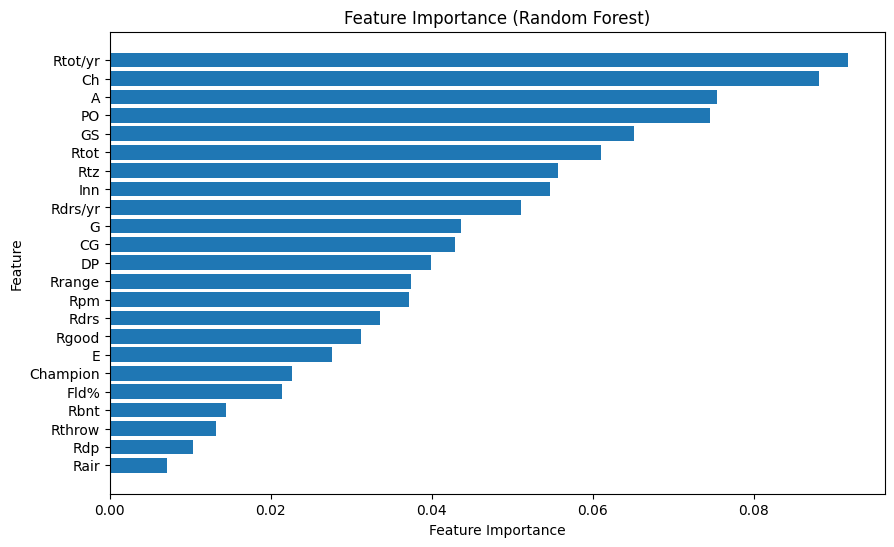

In [119]:
# Feature importance for Random Forest
print("\nFeature Importance for Random Forest:\n")

# Get feature importances and sort by importance
rf_importances = best_rf.feature_importances_
sorted_idx = np.argsort(rf_importances)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh([features[i] for i in sorted_idx], rf_importances[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance (Random Forest)")
plt.gca().invert_yaxis()
plt.show()

In [120]:
# Define hyperparameter grid for Logistic Regression
param_grid_lr = {
    'penalty': ['l1', 'l2'],
    'max_iter': [100, 500, 1000]
}

grid_search_lr = GridSearchCV(
    estimator=LogisticRegression(random_state=1),
    param_grid=param_grid_lr,
    scoring='roc_auc',
    cv=5
)

# Fit GridSearchCV
grid_search_lr.fit(first_base_X_train, first_base_y_train)

# Get the best model
best_lr = grid_search_lr.best_estimator_
print("\nBest Hyperparameters for Logistic Regression:")
print(grid_search_lr.best_params_)

# Predict probabilities for class 1
y_pred_prob_lr = best_lr.predict_proba(first_base_X_test)[:, 1]

# Add probabilities to the test dataset
first_base_test_data['LR_Probability_Class_1'] = y_pred_prob_lr

# Predict class labels for the test set
y_pred_lr = best_lr.predict(first_base_X_test)

# Evaluate the model
print("\nClassification Report for Logistic Regression:")
print(classification_report(first_base_y_test, y_pred_lr))
print(f"ROC AUC Score for Logistic Regression: {roc_auc_score(first_base_y_test, y_pred_prob_lr):.4f}")
print(f"Mean Squared Error for Logistic Regression: {mean_squared_error(first_base_y_test, y_pred_prob_lr):.4f}")


# Output top players by league
first_base_test_data_subset = first_base_test_data[['Name', 'Tm', 'Lg', 'Win', 'LR_Probability_Class_1']]
leagues = first_base_test_data_subset.groupby('Lg')
for league, group in leagues:
    print(f"\nTop Players in {league} League for Logistic Regression:")
    top_players = group.sort_values(by='LR_Probability_Class_1', ascending=False).head(10)
    print(top_players[['Name', 'Tm', 'Lg', 'Win', 'LR_Probability_Class_1']])


Best Hyperparameters for Logistic Regression:
{'max_iter': 500, 'penalty': 'l2'}

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        48
           1       0.00      0.00      0.00         2

    accuracy                           0.94        50
   macro avg       0.48      0.49      0.48        50
weighted avg       0.92      0.94      0.93        50

ROC AUC Score for Logistic Regression: 0.9583
Mean Squared Error for Logistic Regression: 0.0345

Top Players in AL League for Logistic Regression:
                     Name   Tm  Lg  Win  LR_Probability_Class_1
27       Ryan Mountcastle  BAL  AL    0                0.190408
34          Anthony Rizzo  NYY  AL    0                0.185892
35         Carlos Santana  MIN  AL    1                0.171200
36         Nolan Schanuel  LAA  AL    0                0.072134
43      Spencer Torkelson  DET  AL    0                0.052728
24         

In [121]:
# Define hyperparameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_gb = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=1),
    param_grid=param_grid_gb,
    scoring='roc_auc',
    cv=5
)

# Fit GridSearchCV
grid_search_gb.fit(first_base_X_train, first_base_y_train)

# Get the best model
best_gb = grid_search_gb.best_estimator_
print("\nBest Hyperparameters for Gradient Boosting:")
print(grid_search_gb.best_params_)

# Predict probabilities for class 1
y_pred_prob_gb = best_gb.predict_proba(first_base_X_test)[:, 1]

# Add probabilities to the test dataset
first_base_test_data['GB_Probability_Class_1'] = y_pred_prob_gb

# Predict class labels for the test set
y_pred_gb = best_gb.predict(first_base_X_test)

# Evaluate the model
print("\nClassification Report for Gradient Boosting:")
print(classification_report(first_base_y_test, y_pred_gb))
print(f"ROC AUC Score for Gradient Boosting: {roc_auc_score(first_base_y_test, y_pred_prob_gb):.4f}")
print(f"Mean Squared Error for Gradient Boosting: {mean_squared_error(first_base_y_test, y_pred_prob_gb):.4f}")

# Output top players by league
first_base_test_data_subset = first_base_test_data[['Name', 'Tm', 'Lg', 'Win', 'GB_Probability_Class_1']]
leagues = first_base_test_data_subset.groupby('Lg')
for league, group in leagues:
    print(f"\nTop Players in {league} League for Gradient Boosting:")
    top_players = group.sort_values(by='GB_Probability_Class_1', ascending=False).head(10)
    print(top_players[['Name', 'Tm', 'Lg', 'Win', 'GB_Probability_Class_1']])


Best Hyperparameters for Gradient Boosting:
{'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}

Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        48
           1       0.00      0.00      0.00         2

    accuracy                           0.94        50
   macro avg       0.48      0.49      0.48        50
weighted avg       0.92      0.94      0.93        50

ROC AUC Score for Gradient Boosting: 0.8646
Mean Squared Error for Gradient Boosting: 0.0631

Top Players in AL League for Gradient Boosting:
                     Name   Tm  Lg  Win  GB_Probability_Class_1
35         Carlos Santana  MIN  AL    1            5.105827e-06
24         Nathaniel Lowe  TEX  AL    0            1.835029e-06
37          Jon Singleton  HOU  AL    0            6.261377e-07
36         Nolan Schanuel  LAA  AL    0            2.604657e-07
28           


Feature Importance for Gradient Boosting:



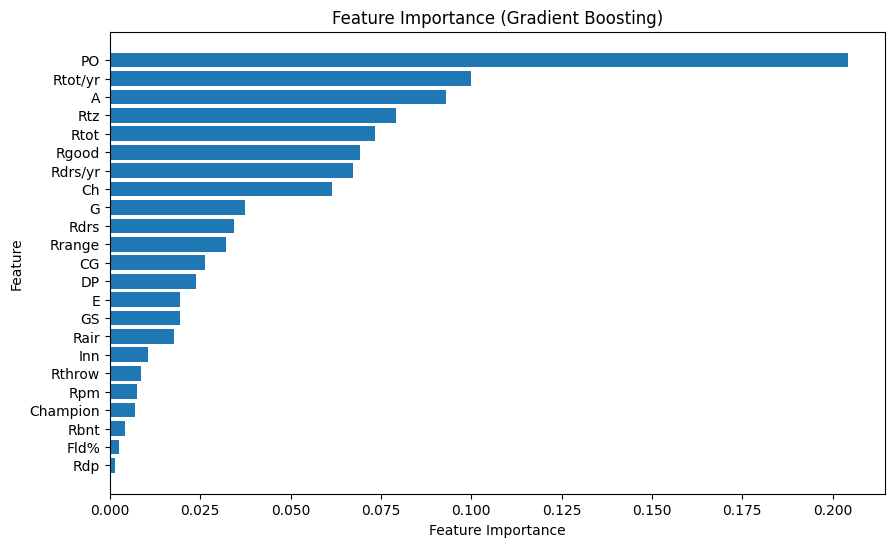

In [122]:
# Feature importance for Gradient Boosting
print("\nFeature Importance for Gradient Boosting:\n")

# Get feature importances and sort by importance
gb_importances = best_gb.feature_importances_
sorted_idx = np.argsort(gb_importances)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh([features[i] for i in sorted_idx], gb_importances[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance (Gradient Boosting)")
plt.gca().invert_yaxis()
plt.show()

In [123]:
# Define the hyperparameter grid for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Perform GridSearchCV to find the best parameters
grid_search_knn = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid_knn,
    scoring='roc_auc',
    cv=5
)

# Fit GridSearchCV
grid_search_knn.fit(first_base_X_train, first_base_y_train)

# Get the best model
best_knn = grid_search_knn.best_estimator_
print("\nBest Hyperparameters for KNN:")
print(grid_search_knn.best_params_)

# Predict probabilities for class 1
y_pred_prob_knn = best_knn.predict_proba(first_base_X_test)[:, 1]  # Probability for class 1

# Add probabilities to the test dataset
first_base_test_data['KNN_Probability_Class_1'] = y_pred_prob_knn

# Predict class labels for the test set
y_pred_knn = best_knn.predict(first_base_X_test)

# Evaluate the model
print("\nClassification Report for KNN:")
print(classification_report(first_base_y_test, y_pred_knn))
print(f"ROC AUC Score for KNN: {roc_auc_score(first_base_y_test, y_pred_prob_knn):.4f}")
print(f"Mean Squared Error for KNN: {mean_squared_error(first_base_y_test, y_pred_prob_knn):.4f}")

# Output top players by league
first_base_test_data_subset = first_base_test_data[['Name', 'Tm', 'Lg', 'Win', 'KNN_Probability_Class_1']]
leagues = first_base_test_data_subset.groupby('Lg')
for league, group in leagues:
    print(f"\nTop Players in {league} League for KNN:")
    top_players = group.sort_values(by='KNN_Probability_Class_1', ascending=False).head(10)
    print(top_players[['Name', 'Tm', 'Lg', 'Win', 'KNN_Probability_Class_1']])



Best Hyperparameters for KNN:
{'n_neighbors': 11, 'p': 1, 'weights': 'distance'}

Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        48
           1       0.00      0.00      0.00         2

    accuracy                           0.96        50
   macro avg       0.48      0.50      0.49        50
weighted avg       0.92      0.96      0.94        50

ROC AUC Score for KNN: 0.9792
Mean Squared Error for KNN: 0.0274

Top Players in AL League for KNN:
                 Name   Tm  Lg  Win  KNN_Probability_Class_1
35     Carlos Santana  MIN  AL    1                 0.232409
24     Nathaniel Lowe  TEX  AL    0                 0.187653
11        Yainer Diaz  HOU  AL    0                 0.000000
32     Salvador Perez  KCR  AL    0                 0.000000
44      Justin Turner  SEA  AL    0                 0.000000
43  Spencer Torkelson  DET  AL    0                 0.000000
39   Tyler Soderstrom  OAK  AL  

In [124]:
# Define hyperparameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel type
    'degree': [2, 3],  # Degree for polynomial kernel
    'gamma': ['scale', 'auto'],  # Kernel coefficient
}

grid_search_svm = GridSearchCV(
    estimator=SVC(probability=True, random_state=1),
    param_grid=param_grid_svm,
    scoring='roc_auc',
    cv=5
)

# Fit GridSearchCV
grid_search_svm.fit(first_base_X_train, first_base_y_train)

# Get the best model
best_svm = grid_search_svm.best_estimator_
print("\nBest Hyperparameters for SVM:")
print(grid_search_svm.best_params_)

# Predict probabilities for class 1
y_pred_prob_svm = best_svm.predict_proba(first_base_X_test)[:, 1]

# Add probabilities to the test dataset
first_base_test_data['SVM_Probability_Class_1'] = y_pred_prob_svm

# Predict class labels for the test set
y_pred_svm = best_svm.predict(first_base_X_test)

# Evaluate the model
print("\nClassification Report for SVM:")
print(classification_report(first_base_y_test, y_pred_svm))
print(f"ROC AUC Score for SVM: {roc_auc_score(first_base_y_test, y_pred_prob_svm):.4f}")
print(f"Mean Squared Error for SVM: {mean_squared_error(first_base_y_test, y_pred_prob_svm):.4f}")

# Output top players by league
first_base_test_data_subset = first_base_test_data[['Name', 'Tm', 'Lg', 'Win', 'SVM_Probability_Class_1']]
leagues = first_base_test_data_subset.groupby('Lg')
for league, group in leagues:
    print(f"\nTop Players in {league} League for SVM:")
    top_players = group.sort_values(by='SVM_Probability_Class_1', ascending=False).head(10)
    print(top_players[['Name', 'Tm', 'Lg', 'Win', 'SVM_Probability_Class_1']])


Best Hyperparameters for SVM:
{'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}

Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        48
           1       0.00      0.00      0.00         2

    accuracy                           0.96        50
   macro avg       0.48      0.50      0.49        50
weighted avg       0.92      0.96      0.94        50

ROC AUC Score for SVM: 0.8958
Mean Squared Error for SVM: 0.0345

Top Players in AL League for SVM:
                     Name   Tm  Lg  Win  SVM_Probability_Class_1
34          Anthony Rizzo  NYY  AL    0                 0.135444
36         Nolan Schanuel  LAA  AL    0                 0.113800
27       Ryan Mountcastle  BAL  AL    0                 0.110322
35         Carlos Santana  MIN  AL    1                 0.107826
43      Spencer Torkelson  DET  AL    0                 0.067330
19  Vladimir Guerrero Jr.  TOR  AL    0                 0.0

### Second Base

In [125]:
player_second_base

,Name,Age,Tm,Lg,Season,Champion,G,GS,CG,Inn,...,Rdrs/yr,Rpm,Rdp.1,Rgood,Rair,Rrange,Rthrow,RF/9,RF/G,Win
0,Luisangel Acuña,22,NYM,NL,2024,0,1,0,0,6.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,3.00,2.00,0
1,Ehire Adrianza,34,LAA,AL,2024,0,2,2,2,18.0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,3.00,3.00,0
2,Nick Ahmed,34,SDP,NL,2024,0,1,1,1,9.0,...,0.0,0.0,0,0.0,NaN,0.0,0.0,5.00,5.00,0
3,Ozzie Albies,27,ATL,NL,2024,0,99,99,98,875.2,...,1.0,2.0,-2,1.0,-1.0,2.0,1.0,4.03,3.96,0
4,Blaze Alexander,25,ARI,NL,2024,0,17,13,11,121.0,...,10.0,1.0,0,0.0,0.0,0.0,0.0,4.83,3.82,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023,Josh Wilson,32,ARI,NL,2013,0,17,15,12,132.0,...,36.0,3.0,0,1.0,0.0,2.0,2.0,4.43,3.82,0
2024,Kolten Wong,22,STL,NL,2013,1,18,10,7,111.0,...,-22.0,-2.0,0,0.0,0.0,-1.0,-1.0,5.27,3.61,0
2025,Eric Young Jr.,28,NYM,NL,2013,0,4,1,0,14.2,...,0.0,0.0,0,0.0,0.0,0.0,0.0,3.68,1.50,0
2026,Michael Young,36,LAD,NL,2013,0,2,1,1,10.2,...,0.0,0.0,0,0.0,0.0,0.0,0.0,3.38,2.00,0


In [126]:
league_second_base

,Season,Lg,#Fld,RA/G,G,GS,CG,Inn,Ch,PO,...,Rtz,Rdp,Rdrs,Rdrs/yr,Rpm,Rdp.1,Rgood,Rair,Rrange,Rthrow
0,2024,AL,7,4.34,162,162,132,1436,644,239,...,1,0,19,0,-2,0,0,0,-1,-1
1,2023,AL,6,4.57,162,162,128,1439,659,259,...,-1,0,10,0,0,0,0,0,-1,0
2,2022,AL,6,4.20,162,162,137,1437,675,271,...,1,0,24,0,2,0,0,0,1,1
3,2021,AL,6,4.58,162,162,140,1423,651,259,...,-3,0,9,0,-1,0,0,0,1,-1
4,2020,AL,5,4.63,60,60,50,519,235,92,...,-1,0,4,0,-1,0,0,0,-1,0
5,2019,AL,6,4.95,162,162,139,1446,670,267,...,-1,0,-8,0,-3,0,0,-1,-3,0
6,2018,AL,6,4.56,162,162,145,1444,673,263,...,0,0,-4,0,-1,0,-1,0,-2,0
7,2017,AL,5,4.67,162,162,142,1442,710,279,...,3,1,6,0,1,1,-1,0,-1,2
8,2016,AL,5,4.67,162,162,142,1442,710,279,...,3,1,6,0,1,1,-1,0,-1,2
9,2015,AL,5,4.29,162,162,142,1446,749,286,...,0,0,-4,0,-2,0,0,-1,-1,0


In [127]:
# Drop unwanted columns
player_second_base = player_second_base.drop(columns=['RF/9', 'RF/G'])
league_second_base = league_second_base.drop(columns=['#Fld', 'RA/G'])

In [128]:
# Check for missing values
missing_values = player_second_base.isnull().sum()
print("Missing Values:")
print(missing_values[missing_values > 0])

Missing Values:
Fld%       102
Rtot/yr      4
Rdp        197
Rdrs/yr      4
Rpm         38
Rgood       99
Rair       163
Rrange      56
Rthrow      56
dtype: int64


In [129]:
# Drop rows with missing values
player_second_base = player_second_base.dropna()

In [225]:
# Generate basic statistics
print(player_second_base.describe())

               Age       Season     Champion            G           GS  \
count  1762.000000  1762.000000  1762.000000  1762.000000  1762.000000   
mean     27.345630  2018.600454     0.059024    36.122588    31.313280   
std       3.586247     3.453982     0.235736    41.484297    40.506581   
min      19.000000  2013.000000     0.000000     1.000000     0.000000   
25%      25.000000  2016.000000     0.000000     7.000000     4.000000   
50%      27.000000  2019.000000     0.000000    18.000000    13.000000   
75%      30.000000  2022.000000     0.000000    48.000000    39.000000   
max      39.000000  2024.000000     1.000000   162.000000   162.000000   

                CG          Inn           Ch           PO            A  ...  \
count  1762.000000  1762.000000  1762.000000  1762.000000  1762.000000  ...   
mean     26.558456   278.133995   136.177639    53.035187    80.849035  ...   
std      37.523284   355.498050   177.705860    69.511265   106.071574  ...   
min       0.00000

In [ ]:
# Display the column names
player_second_base.columns

Index(['Name', 'Age', 'Tm', 'Lg', 'Season', 'Champion', 'G', 'GS', 'CG', 'Inn',
       'Ch', 'PO', 'A', 'E', 'DP', 'Fld%', 'Rtot', 'Rtot/yr', 'Rtz', 'Rdp',
       'Rdrs', 'Rdrs/yr', 'Rpm', 'Rdp.1', 'Rgood', 'Rair', 'Rrange', 'Rthrow',
       'Win'],
      dtype='object')

In [131]:
# Merge player and league datasets on 'Season' and 'Lg', keeping all player rows
second_base = player_second_base.merge(
    league_second_base,
    on=["Season", "Lg"],
    suffixes=("_player", "_league"),
    how="left"
)

# Add the 'Win' column to the merged dataset
second_base["Win"] = player_second_base["Win"].values

# List of columns containing player and league metrics to be normalized
columns = [
    "G", "GS", "CG", "Inn", "Ch", "PO", "A", "E", "DP", "Fld%", 
    "Rtot", "Rtot/yr", "Rtz", "Rdp", "Rdrs", "Rdrs/yr", "Rpm",
    'Rdp.1', "Rgood", "Rair", "Rrange", "Rthrow"
]

# Create a copy of the merged dataset for normalization
normalized_second_base = second_base.copy()

# Normalize the columns with player fielding metrics
for col in columns:
    if f"{col}_player" in second_base and f"{col}_league" in second_base:
        # Perform normalization and handle invalid values
        normalized_col = second_base[f"{col}_player"] / second_base[f"{col}_league"]
        normalized_col.replace([float('inf'), float('-inf')], pd.NA, inplace=True)  # Replace inf with NA
        normalized_col.fillna(second_base[f"{col}_player"], inplace=True)  # Revert to original value if invalid
        normalized_second_base[col] = normalized_col

# Drop extra columns from normalization dataset
for col in columns:
    normalized_second_base = normalized_second_base.drop(columns=[f"{col}_player", f"{col}_league"], errors='ignore')


In [132]:
normalized_second_base

,Name,Age,Tm,Lg,Season,Champion,Win,G,GS,CG,...,Rtz,Rdp,Rdrs,Rdrs/yr,Rpm,Rdp.1,Rgood,Rair,Rrange,Rthrow
0,Ehire Adrianza,34,LAA,AL,2024,0,0,0.012346,0.012346,0.015152,...,0.0,0.0,0.000000,0.0,-0.0,0.0,0.0,0.0,-0.00,-0.0
1,Ozzie Albies,27,ATL,NL,2024,0,0,0.611111,0.611111,0.695035,...,-2.0,-1.0,0.083333,1.0,1.0,-2.0,1.0,-1.0,2.00,1.0
2,Blaze Alexander,25,ARI,NL,2024,0,0,0.104938,0.080247,0.078014,...,-2.0,-1.0,0.083333,10.0,0.5,0.0,0.0,0.0,0.00,0.0
3,Jose Altuve,34,HOU,AL,2024,0,0,0.907407,0.901235,0.984848,...,-1.0,3.0,-0.684211,-12.0,8.5,2.0,2.0,-1.0,20.00,-4.0
4,Eddy Alvarez,34,NYM,NL,2024,0,0,0.067901,0.018519,0.000000,...,-0.0,0.0,0.083333,39.0,0.5,0.0,0.0,0.0,1.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1757,Josh Wilson,32,ARI,NL,2013,0,0,0.104938,0.092593,0.083333,...,3.0,-0.0,2.000000,36.0,-0.6,0.0,1.0,0.0,-0.50,-2.0
1758,Kolten Wong,22,STL,NL,2013,1,0,0.111111,0.061728,0.048611,...,1.0,-0.0,-1.000000,-22.0,0.4,0.0,0.0,0.0,0.25,1.0
1759,Eric Young Jr.,28,NYM,NL,2013,0,0,0.024691,0.006173,0.000000,...,1.0,-0.0,0.000000,0.0,-0.0,0.0,0.0,0.0,-0.00,-0.0
1760,Michael Young,36,LAD,NL,2013,0,0,0.012346,0.006173,0.006944,...,1.0,-0.0,0.000000,0.0,-0.0,0.0,0.0,0.0,-0.00,-0.0


In [133]:
# Split the data into training and testing sets
second_base_train_data = normalized_second_base[normalized_second_base['Season'] != 2024]
second_base_test_data = normalized_second_base[normalized_second_base['Season'] == 2024]

# Define features and target
features = [
    'Champion', 'G', 'GS', 'CG', 'Inn', 'Ch', 'PO', 'A', 'E', 'DP',
    'Fld%', 'Rtot', 'Rtot/yr', 'Rtz', 'Rdp', 'Rdrs', 'Rdrs/yr', 'Rpm',
    'Rdp.1', 'Rgood', 'Rair', 'Rrange', 'Rthrow'
]
target = 'Win'

# Extract features and target
second_base_X_train = second_base_train_data[features]
second_base_y_train = second_base_train_data[target]
second_base_X_test = second_base_test_data[features]
second_base_y_test = second_base_test_data[target]

In [134]:
# Define hyperparameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=1),
    param_grid=param_grid_rf,
    scoring='roc_auc',
    cv=5
)

# Fit GridSearchCV
grid_search_rf.fit(second_base_X_train, second_base_y_train)

# Get the best model
best_rf = grid_search_rf.best_estimator_
print("\nBest Hyperparameters for Random Forest:")
print(grid_search_rf.best_params_)

# Predict probabilities for class 1
y_pred_prob_rf = best_rf.predict_proba(second_base_X_test)[:, 1]

# Add probabilities to the test dataset
second_base_test_data['RF_Probability_Class_1'] = y_pred_prob_rf

# Predict class labels for the test set
y_pred_rf = best_rf.predict(second_base_X_test)

# Evaluate the model
print("\nClassification Report for Random Forest:")
print(classification_report(second_base_y_test, y_pred_rf))
print(f"ROC AUC Score for Random Forest: {roc_auc_score(second_base_y_test, y_pred_prob_rf):.4f}")
print(f"Mean Squared Error for Random Forest: {mean_squared_error(second_base_y_test, y_pred_prob_rf):.4f}")

# Output top players by league
second_base_test_data_subset = second_base_test_data[['Name', 'Tm', 'Lg', 'Win', 'RF_Probability_Class_1']]
leagues = second_base_test_data_subset.groupby('Lg')
for league, group in leagues:
    print(f"\nTop Players in {league} League for Random Forest:")
    top_players = group.sort_values(by='RF_Probability_Class_1', ascending=False).head(10)
    print(top_players[['Name', 'Tm', 'Lg', 'Win', 'RF_Probability_Class_1']])


Best Hyperparameters for Random Forest:
{'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       149
           1       0.50      0.50      0.50         2

    accuracy                           0.99       151
   macro avg       0.75      0.75      0.75       151
weighted avg       0.99      0.99      0.99       151

ROC AUC Score for Random Forest: 0.9966
Mean Squared Error for Random Forest: 0.0054

Top Players in AL League for Random Forest:
                 Name   Tm  Lg  Win  RF_Probability_Class_1
120     Marcus Semien  TEX  AL    0                0.502857
47     Andrés Giménez  CLE  AL    1                0.458381
46         Zack Gelof  OAK  AL    0                0.123048
3         Jose Altuve  HOU  AL    0                0.120429
68         Colt Keith  DET  AL    0                0.


Feature Importance for Random Forest:



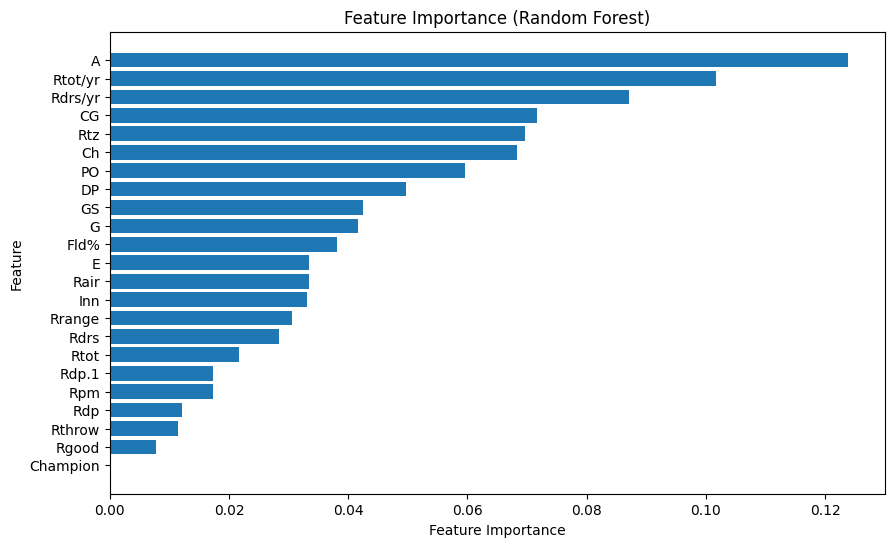

In [135]:
# Feature importance for Random Forest
print("\nFeature Importance for Random Forest:\n")

# Get feature importances and sort by importance
rf_importances = best_rf.feature_importances_
sorted_idx = np.argsort(rf_importances)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh([features[i] for i in sorted_idx], rf_importances[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance (Random Forest)")
plt.gca().invert_yaxis()
plt.show()

In [136]:
# Define hyperparameter grid for Logistic Regression
param_grid_lr = {
    'penalty': ['l1', 'l2'],
    'max_iter': [100, 500, 1000]
}

grid_search_lr = GridSearchCV(
    estimator=LogisticRegression(random_state=1),
    param_grid=param_grid_lr,
    scoring='roc_auc',
    cv=5
)

# Fit GridSearchCV
grid_search_lr.fit(second_base_X_train, second_base_y_train)

# Get the best model
best_lr = grid_search_lr.best_estimator_
print("\nBest Hyperparameters for Logistic Regression:")
print(grid_search_lr.best_params_)

# Predict probabilities for class 1
y_pred_prob_lr = best_lr.predict_proba(second_base_X_test)[:, 1]

# Add probabilities to the test dataset
second_base_test_data['LR_Probability_Class_1'] = y_pred_prob_lr

# Predict class labels for the test set
y_pred_lr = best_lr.predict(second_base_X_test)

# Evaluate the model
print("\nClassification Report for Logistic Regression:")
print(classification_report(second_base_y_test, y_pred_lr))
print(f"ROC AUC Score for Logistic Regression: {roc_auc_score(second_base_y_test, y_pred_prob_lr):.4f}")
print(f"Mean Squared Error for Logistic Regression: {mean_squared_error(second_base_y_test, y_pred_prob_lr):.4f}")


# Output top players by league
second_base_test_data_subset = second_base_test_data[['Name', 'Tm', 'Lg', 'Win', 'LR_Probability_Class_1']]
leagues = second_base_test_data_subset.groupby('Lg')
for league, group in leagues:
    print(f"\nTop Players in {league} League for Logistic Regression:")
    top_players = group.sort_values(by='LR_Probability_Class_1', ascending=False).head(10)
    print(top_players[['Name', 'Tm', 'Lg', 'Win', 'LR_Probability_Class_1']])


Best Hyperparameters for Logistic Regression:
{'max_iter': 500, 'penalty': 'l2'}

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       149
           1       0.50      0.50      0.50         2

    accuracy                           0.99       151
   macro avg       0.75      0.75      0.75       151
weighted avg       0.99      0.99      0.99       151

ROC AUC Score for Logistic Regression: 0.9832
Mean Squared Error for Logistic Regression: 0.0096

Top Players in AL League for Logistic Regression:
                   Name   Tm  Lg  Win  LR_Probability_Class_1
47       Andrés Giménez  CLE  AL    1                0.677586
120       Marcus Semien  TEX  AL    0                0.532528
46           Zack Gelof  OAK  AL    0                0.135044
3           Jose Altuve  HOU  AL    0                0.043853
132      Gleyber Torres  NYY  AL    0                0.021599
68           Colt Keith

In [137]:
# Define hyperparameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_gb = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=1),
    param_grid=param_grid_gb,
    scoring='roc_auc',
    cv=5
)

# Fit GridSearchCV
grid_search_gb.fit(second_base_X_train, second_base_y_train)

# Get the best model
best_gb = grid_search_gb.best_estimator_
print("\nBest Hyperparameters for Gradient Boosting:")
print(grid_search_gb.best_params_)

# Predict probabilities for class 1
y_pred_prob_gb = best_gb.predict_proba(second_base_X_test)[:, 1]

# Add probabilities to the test dataset
second_base_test_data['GB_Probability_Class_1'] = y_pred_prob_gb

# Predict class labels for the test set
y_pred_gb = best_gb.predict(second_base_X_test)

# Evaluate the model
print("\nClassification Report for Gradient Boosting:")
print(classification_report(second_base_y_test, y_pred_gb))
print(f"ROC AUC Score for Gradient Boosting: {roc_auc_score(second_base_y_test, y_pred_prob_gb):.4f}")
print(f"Mean Squared Error for Gradient Boosting: {mean_squared_error(second_base_y_test, y_pred_prob_gb):.4f}")

# Output top players by league
second_base_test_data_subset = second_base_test_data[['Name', 'Tm', 'Lg', 'Win', 'GB_Probability_Class_1']]
leagues = second_base_test_data_subset.groupby('Lg')
for league, group in leagues:
    print(f"\nTop Players in {league} League for Gradient Boosting:")
    top_players = group.sort_values(by='GB_Probability_Class_1', ascending=False).head(10)
    print(top_players[['Name', 'Tm', 'Lg', 'Win', 'GB_Probability_Class_1']])


Best Hyperparameters for Gradient Boosting:
{'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}

Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       149
           1       0.50      1.00      0.67         2

    accuracy                           0.99       151
   macro avg       0.75      0.99      0.83       151
weighted avg       0.99      0.99      0.99       151

ROC AUC Score for Gradient Boosting: 0.9966
Mean Squared Error for Gradient Boosting: 0.0082

Top Players in AL League for Gradient Boosting:
                 Name   Tm  Lg  Win  GB_Probability_Class_1
120     Marcus Semien  TEX  AL    0                0.900060
47     Andrés Giménez  CLE  AL    1                0.891693
3         Jose Altuve  HOU  AL    0                0.637881
46         Zack Gelof  OAK  AL    0                0.005089
132    Gleyber Torres  NYY  AL    


Feature Importance for Gradient Boosting:



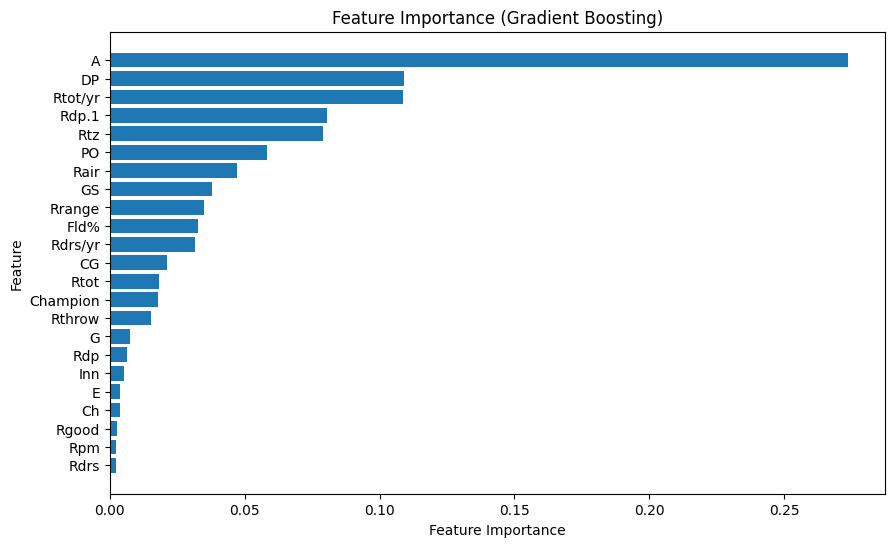

In [138]:
# Feature importance for Gradient Boosting
print("\nFeature Importance for Gradient Boosting:\n")

# Get feature importances and sort by importance
gb_importances = best_gb.feature_importances_
sorted_idx = np.argsort(gb_importances)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh([features[i] for i in sorted_idx], gb_importances[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance (Gradient Boosting)")
plt.gca().invert_yaxis()
plt.show()

In [139]:
# Define the hyperparameter grid for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Perform GridSearchCV to find the best parameters
grid_search_knn = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid_knn,
    scoring='roc_auc',
    cv=5
)

# Fit GridSearchCV
grid_search_knn.fit(second_base_X_train, second_base_y_train)

# Get the best model
best_knn = grid_search_knn.best_estimator_
print("\nBest Hyperparameters for KNN:")
print(grid_search_knn.best_params_)

# Predict probabilities for class 1
y_pred_prob_knn = best_knn.predict_proba(second_base_X_test)[:, 1]  # Probability for class 1

# Add probabilities to the test dataset
second_base_test_data['KNN_Probability_Class_1'] = y_pred_prob_knn

# Predict class labels for the test set
y_pred_knn = best_knn.predict(second_base_X_test)

# Evaluate the model
print("\nClassification Report for KNN:")
print(classification_report(second_base_y_test, y_pred_knn))
print(f"ROC AUC Score for KNN: {roc_auc_score(second_base_y_test, y_pred_prob_knn):.4f}")
print(f"Mean Squared Error for KNN: {mean_squared_error(second_base_y_test, y_pred_prob_knn):.4f}")

# Output top players by league
second_base_test_data_subset = second_base_test_data[['Name', 'Tm', 'Lg', 'Win', 'KNN_Probability_Class_1']]
leagues = second_base_test_data_subset.groupby('Lg')
for league, group in leagues:
    print(f"\nTop Players in {league} League for KNN:")
    top_players = group.sort_values(by='KNN_Probability_Class_1', ascending=False).head(10)
    print(top_players[['Name', 'Tm', 'Lg', 'Win', 'KNN_Probability_Class_1']])



Best Hyperparameters for KNN:
{'n_neighbors': 9, 'p': 1, 'weights': 'distance'}

Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       149
           1       0.00      0.00      0.00         2

    accuracy                           0.99       151
   macro avg       0.49      0.50      0.50       151
weighted avg       0.97      0.99      0.98       151

ROC AUC Score for KNN: 1.0000
Mean Squared Error for KNN: 0.0059

Top Players in AL League for KNN:
                 Name   Tm  Lg  Win  KNN_Probability_Class_1
47     Andrés Giménez  CLE  AL    1                 0.251801
120     Marcus Semien  TEX  AL    0                 0.122301
46         Zack Gelof  OAK  AL    0                 0.094885
110        Josh Rojas  SEA  AL    0                 0.000000
107       Pablo Reyes  BOS  AL    0                 0.000000
106      Luis Rengifo  LAA  AL    0                 0.000000
105    Zach Remillard  CHW  AL   

In [140]:
# Define hyperparameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel type
    'degree': [2, 3],  # Degree for polynomial kernel
    'gamma': ['scale', 'auto'],  # Kernel coefficient
}

grid_search_svm = GridSearchCV(
    estimator=SVC(probability=True, random_state=1),
    param_grid=param_grid_svm,
    scoring='roc_auc',
    cv=5
)

# Fit GridSearchCV
grid_search_svm.fit(second_base_X_train, second_base_y_train)

# Get the best model
best_svm = grid_search_svm.best_estimator_
print("\nBest Hyperparameters for SVM:")
print(grid_search_svm.best_params_)

# Predict probabilities for class 1
y_pred_prob_svm = best_svm.predict_proba(second_base_X_test)[:, 1]

# Add probabilities to the test dataset
second_base_test_data['SVM_Probability_Class_1'] = y_pred_prob_svm

# Predict class labels for the test set
y_pred_svm = best_svm.predict(second_base_X_test)

# Evaluate the model
print("\nClassification Report for SVM:")
print(classification_report(second_base_y_test, y_pred_svm))
print(f"ROC AUC Score for SVM: {roc_auc_score(second_base_y_test, y_pred_prob_svm):.4f}")
print(f"Mean Squared Error for SVM: {mean_squared_error(second_base_y_test, y_pred_prob_svm):.4f}")

# Output top players by league
second_base_test_data_subset = second_base_test_data[['Name', 'Tm', 'Lg', 'Win', 'SVM_Probability_Class_1']]
leagues = second_base_test_data_subset.groupby('Lg')
for league, group in leagues:
    print(f"\nTop Players in {league} League for SVM:")
    top_players = group.sort_values(by='SVM_Probability_Class_1', ascending=False).head(10)
    print(top_players[['Name', 'Tm', 'Lg', 'Win', 'SVM_Probability_Class_1']])


Best Hyperparameters for SVM:
{'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}

Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       149
           1       0.50      0.50      0.50         2

    accuracy                           0.99       151
   macro avg       0.75      0.75      0.75       151
weighted avg       0.99      0.99      0.99       151

ROC AUC Score for SVM: 0.9732
Mean Squared Error for SVM: 0.0110

Top Players in AL League for SVM:
                   Name   Tm  Lg  Win  SVM_Probability_Class_1
47       Andrés Giménez  CLE  AL    1                 0.194468
120       Marcus Semien  TEX  AL    0                 0.164063
46           Zack Gelof  OAK  AL    0                 0.028994
77          Nicky Lopez  CHW  AL    0                 0.023581
3           Jose Altuve  HOU  AL    0                 0.022768
71   Isiah Kiner-Falefa  TOR  AL    0                 0.019583
68      

### Shortstop

In [141]:
player_shortstop

,Name,Age,Tm,Lg,Season,Champion,G,GS,CG,Inn,...,Rdrs/yr,Rpm,Rdp.1,Rgood,Rair,Rrange,Rthrow,RF/9,RF/G,Win
0,CJ Abrams,23,WSN,NL,2024,0,136,135,124,1170.2,...,1,0.0,-1,2.0,0.0,1.0,-2.0,3.91,3.74,0
1,Luisangel Acuña,22,NYM,NL,2024,0,12,10,9,89.2,...,13,3.0,-1,-1.0,0.0,3.0,0.0,4.22,3.50,0
2,Willy Adames,28,MIL,NL,2024,0,161,161,151,1406.1,...,-14,-16.0,-1,1.0,-1.0,-9.0,-6.0,3.37,3.27,0
3,Nick Ahmed,34,SFG,NL,2024,0,68,65,57,554.1,...,-2,2.0,-1,-2.0,0.0,2.0,0.0,4.01,3.63,0
4,Nick Ahmed,34,SDP,NL,2024,0,1,1,1,8.0,...,-150,0.0,-1,0.0,0.0,0.0,0.0,6.75,6.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1531,Jonathan Villar,22,HOU,AL,2013,0,58,57,55,499.0,...,-19,-5.0,0,-3.0,0.0,-4.0,-2.0,4.26,4.07,0
1532,Zach Walters,23,WSN,NL,2013,0,2,1,1,10.0,...,0,0.0,0,0.0,0.0,0.0,0.0,5.40,3.00,0
1533,Josh Wilson,32,ARI,NL,2013,0,2,0,0,3.0,...,0,0.0,0,0.0,NaN,0.0,0.0,6.00,1.00,0
1534,Michael Young,36,LAD,NL,2013,0,1,1,0,7.0,...,0,0.0,0,0.0,0.0,0.0,0.0,2.57,2.00,0


In [142]:
league_shortstop

,Season,Lg,#Fld,RA/G,G,GS,CG,Inn,Ch,PO,...,Rtz,Rdp,Rdrs,Rdrs/yr,Rpm,Rdp.1,Rgood,Rair,Rrange,Rthrow
0,2024,AL,4,4.34,162,162,145,1436,607,216,...,1,0,19,0,1,0,0,0,0,1
1,2023,AL,5,4.57,162,162,142,1439,605,199,...,-2,0,10,0,0,0,0,0,1,-1
2,2022,AL,5,4.20,162,162,146,1437,643,192,...,0,0,24,0,1,0,0,0,1,0
3,2021,AL,4,4.58,162,162,148,1423,619,191,...,1,0,9,0,2,0,0,0,1,1
4,2020,AL,4,4.63,60,60,53,519,224,70,...,0,0,4,0,0,0,0,0,-1,0
5,2019,AL,5,4.95,162,162,146,1446,641,199,...,0,0,-8,0,-3,-1,0,0,-2,-1
6,2018,AL,5,4.56,162,162,149,1444,634,201,...,-2,0,-4,0,-4,0,0,-1,-2,-1
7,2017,AL,4,4.67,162,162,149,1442,672,216,...,1,0,6,0,0,0,0,0,-1,1
8,2016,AL,4,4.47,162,162,149,1441,684,221,...,1,0,9,0,-2,0,-1,0,-3,2
9,2015,AL,4,4.29,162,162,149,1446,695,223,...,0,-1,-4,0,-4,0,0,-1,-2,-1


In [143]:
# Drop unwanted columns
player_shortstop = player_shortstop.drop(columns=['RF/9', 'RF/G'])
league_shortstop = league_shortstop.drop(columns=['#Fld', 'RA/G'])

In [144]:
# Check for missing values
missing_values = player_shortstop.isnull().sum()
print("Missing Values:")
print(missing_values[missing_values > 0])

Missing Values:
Fld%       62
Rdp       140
Rpm        22
Rgood      60
Rair       89
Rrange     33
Rthrow     33
dtype: int64


In [145]:
# Drop rows with missing values
player_shortstop = player_shortstop.dropna()

In [226]:
# Generate basic statistics
print(player_shortstop.describe())

               Age       Season     Champion            G           GS  \
count  1362.000000  1362.000000  1362.000000  1362.000000  1362.000000   
mean     26.890602  2018.572687     0.053598    44.361233    40.521292   
std       3.538255     3.452342     0.225305    50.203746    50.036753   
min      20.000000  2013.000000     0.000000     1.000000     0.000000   
25%      24.000000  2016.000000     0.000000     7.000000     4.000000   
50%      27.000000  2019.000000     0.000000    20.000000    15.000000   
75%      29.000000  2022.000000     0.000000    69.750000    64.000000   
max      40.000000  2024.000000     1.000000   162.000000   162.000000   

                CG          Inn           Ch           PO            A  ...  \
count  1362.000000  1362.000000  1362.000000  1362.000000  1362.000000  ...   
mean     36.638767   360.091924   164.465492    52.917768   107.113803  ...   
std      47.283054   438.811197   202.485676    66.062184   132.255768  ...   
min       0.00000

In [ ]:
# Display the column names
player_shortstop.columns

Index(['Name', 'Age', 'Tm', 'Lg', 'Season', 'Champion', 'G', 'GS', 'CG', 'Inn',
       'Ch', 'PO', 'A', 'E', 'DP', 'Fld%', 'Rtot', 'Rtot/yr', 'Rtz', 'Rdp',
       'Rdrs', 'Rdrs/yr', 'Rpm', 'Rdp.1', 'Rgood', 'Rair', 'Rrange', 'Rthrow',
       'Win'],
      dtype='object')

In [147]:
# Merge player and league datasets on 'Season' and 'Lg', keeping all player rows
shortstop = player_shortstop.merge(
    league_shortstop,
    on=["Season", "Lg"],
    suffixes=("_player", "_league"),
    how="left"
)

# Add the 'Win' column to the merged dataset
shortstop["Win"] = player_shortstop["Win"].values

# List of columns containing player and league metrics to be normalized
columns = [
    "G", "GS", "CG", "Inn", "Ch", "PO", "A", "E", "DP", "Fld%", 
    "Rtot", "Rtot/yr", "Rtz", "Rdp", "Rdrs", "Rdrs/yr", "Rpm",
    'Rdp.1', "Rgood", "Rair", "Rrange", "Rthrow"
]

# Create a copy of the merged dataset for normalization
normalized_shortstop = shortstop.copy()

# Normalize the columns with player fielding metrics
for col in columns:
    if f"{col}_player" in shortstop and f"{col}_league" in shortstop:
        # Perform normalization and handle invalid values
        normalized_col = shortstop[f"{col}_player"] / shortstop[f"{col}_league"]
        normalized_col.replace([float('inf'), float('-inf')], pd.NA, inplace=True)  # Replace inf with NA
        normalized_col.fillna(shortstop[f"{col}_player"], inplace=True)  # Revert to original value if invalid
        normalized_shortstop[col] = normalized_col

# Drop extra columns from normalization dataset
for col in columns:
    normalized_shortstop = normalized_shortstop.drop(columns=[f"{col}_player", f"{col}_league"], errors='ignore')


In [148]:
normalized_shortstop

,Name,Age,Tm,Lg,Season,Champion,Win,G,GS,CG,...,Rtz,Rdp,Rdrs,Rdrs/yr,Rpm,Rdp.1,Rgood,Rair,Rrange,Rthrow
0,CJ Abrams,23,WSN,NL,2024,0,0,0.839506,0.833333,0.826667,...,4.000000,-1.0,0.083333,1,-0.000000,-1.0,2.0,0.0,1.0,-2.0
1,Luisangel Acuña,22,NYM,NL,2024,0,0,0.074074,0.061728,0.060000,...,-1.000000,0.0,0.083333,13,-3.000000,-1.0,-1.0,0.0,3.0,0.0
2,Willy Adames,28,MIL,NL,2024,0,0,0.993827,0.993827,1.006667,...,4.000000,0.0,-1.333333,-14,16.000000,-1.0,1.0,-1.0,-9.0,-6.0
3,Nick Ahmed,34,SFG,NL,2024,0,0,0.419753,0.401235,0.380000,...,1.000000,0.0,-0.083333,-2,-2.000000,-1.0,-2.0,0.0,2.0,0.0
4,Nick Ahmed,34,SDP,NL,2024,0,0,0.006173,0.006173,0.006667,...,-0.500000,-1.0,-0.083333,-150,-0.000000,-1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1357,Chris Valaika,27,MIA,NL,2013,0,0,0.037037,0.037037,0.040816,...,-1.000000,0.0,-1.000000,-45,-2.000000,0.0,-0.0,0.0,-1.0,-1.0
1358,Jonathan Villar,22,HOU,AL,2013,0,0,0.358025,0.351852,0.371622,...,2.000000,0.0,0.400000,-19,0.833333,0.0,-3.0,0.0,0.8,2.0
1359,Zach Walters,23,WSN,NL,2013,0,0,0.012346,0.006173,0.006803,...,0.333333,0.0,0.000000,0,0.000000,0.0,-0.0,0.0,0.0,0.0
1360,Michael Young,36,LAD,NL,2013,0,0,0.006173,0.006173,0.000000,...,-0.333333,0.0,0.000000,0,0.000000,0.0,-0.0,0.0,0.0,0.0


In [149]:
# Split the data into training and testing sets
shortstop_train_data = normalized_shortstop[normalized_shortstop['Season'] != 2024]
shortstop_test_data = normalized_shortstop[normalized_shortstop['Season'] == 2024]

# Define features and target
features = [
    'Champion', 'G', 'GS', 'CG', 'Inn', 'Ch', 'PO', 'A', 'E', 'DP',
    'Fld%', 'Rtot', 'Rtot/yr', 'Rtz', 'Rdp', 'Rdrs', 'Rdrs/yr', 'Rpm',
    'Rdp.1', 'Rgood', 'Rair', 'Rrange', 'Rthrow'
]
target = 'Win'

# Extract features and target
shortstop_X_train = shortstop_train_data[features]
shortstop_y_train = shortstop_train_data[target]
shortstop_X_test = shortstop_test_data[features]
shortstop_y_test = shortstop_test_data[target]

In [150]:
# Define hyperparameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=1),
    param_grid=param_grid_rf,
    scoring='roc_auc',
    cv=5
)

# Fit GridSearchCV
grid_search_rf.fit(shortstop_X_train, shortstop_y_train)

# Get the best model
best_rf = grid_search_rf.best_estimator_
print("\nBest Hyperparameters for Random Forest:")
print(grid_search_rf.best_params_)

# Predict probabilities for class 1
y_pred_prob_rf = best_rf.predict_proba(shortstop_X_test)[:, 1]

# Add probabilities to the test dataset
shortstop_test_data['RF_Probability_Class_1'] = y_pred_prob_rf

# Predict class labels for the test set
y_pred_rf = best_rf.predict(shortstop_X_test)

# Evaluate the model
print("\nClassification Report for Random Forest:")
print(classification_report(shortstop_y_test, y_pred_rf))
print(f"ROC AUC Score for Random Forest: {roc_auc_score(shortstop_y_test, y_pred_prob_rf):.4f}")
print(f"Mean Squared Error for Random Forest: {mean_squared_error(shortstop_y_test, y_pred_prob_rf):.4f}")

# Output top players by league
shortstop_test_data_subset = shortstop_test_data[['Name', 'Tm', 'Lg', 'Win', 'RF_Probability_Class_1']]
leagues = shortstop_test_data_subset.groupby('Lg')
for league, group in leagues:
    print(f"\nTop Players in {league} League for Random Forest:")
    top_players = group.sort_values(by='RF_Probability_Class_1', ascending=False).head(10)
    print(top_players[['Name', 'Tm', 'Lg', 'Win', 'RF_Probability_Class_1']])


Best Hyperparameters for Random Forest:
{'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       111
           1       0.00      0.00      0.00         2

    accuracy                           0.98       113
   macro avg       0.49      0.50      0.50       113
weighted avg       0.96      0.98      0.97       113

ROC AUC Score for Random Forest: 0.9775
Mean Squared Error for Random Forest: 0.0147

Top Players in AL League for Random Forest:
                 Name   Tm  Lg  Win  RF_Probability_Class_1
65          Zach Neto  LAA  AL    0                0.326142
103     Anthony Volpe  NYY  AL    0                0.149100
112    Bobby Witt Jr.  KCR  AL    1                0.080515
42   Gunnar Henderson  BAL  AL    0                0.062455
79     Brayan Rocchio  CLE  AL    0                0.


Feature Importance for Random Forest:



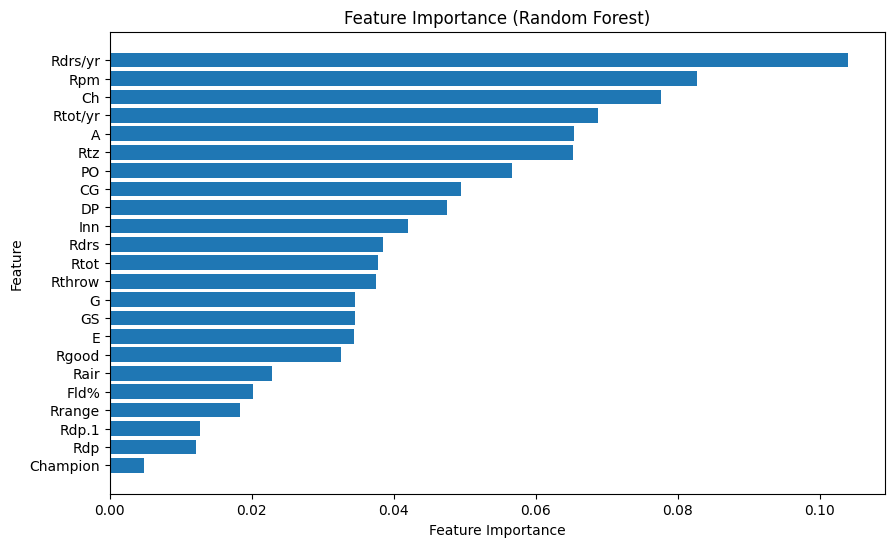

In [151]:
# Feature importance for Random Forest
print("\nFeature Importance for Random Forest:\n")

# Get feature importances and sort by importance
rf_importances = best_rf.feature_importances_
sorted_idx = np.argsort(rf_importances)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh([features[i] for i in sorted_idx], rf_importances[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance (Random Forest)")
plt.gca().invert_yaxis()
plt.show()

In [152]:
# Define hyperparameter grid for Logistic Regression
param_grid_lr = {
    'penalty': ['l1', 'l2'],
    'max_iter': [100, 500, 1000]
}

grid_search_lr = GridSearchCV(
    estimator=LogisticRegression(random_state=1),
    param_grid=param_grid_lr,
    scoring='roc_auc',
    cv=5
)

# Fit GridSearchCV
grid_search_lr.fit(shortstop_X_train, shortstop_y_train)

# Get the best model
best_lr = grid_search_lr.best_estimator_
print("\nBest Hyperparameters for Logistic Regression:")
print(grid_search_lr.best_params_)

# Predict probabilities for class 1
y_pred_prob_lr = best_lr.predict_proba(shortstop_X_test)[:, 1]

# Add probabilities to the test dataset
shortstop_test_data['LR_Probability_Class_1'] = y_pred_prob_lr

# Predict class labels for the test set
y_pred_lr = best_lr.predict(shortstop_X_test)

# Evaluate the model
print("\nClassification Report for Logistic Regression:")
print(classification_report(shortstop_y_test, y_pred_lr))
print(f"ROC AUC Score for Logistic Regression: {roc_auc_score(shortstop_y_test, y_pred_prob_lr):.4f}")
print(f"Mean Squared Error for Logistic Regression: {mean_squared_error(shortstop_y_test, y_pred_prob_lr):.4f}")


# Output top players by league
shortstop_test_data_subset = shortstop_test_data[['Name', 'Tm', 'Lg', 'Win', 'LR_Probability_Class_1']]
leagues = shortstop_test_data_subset.groupby('Lg')
for league, group in leagues:
    print(f"\nTop Players in {league} League for Logistic Regression:")
    top_players = group.sort_values(by='LR_Probability_Class_1', ascending=False).head(10)
    print(top_players[['Name', 'Tm', 'Lg', 'Win', 'LR_Probability_Class_1']])


Best Hyperparameters for Logistic Regression:
{'max_iter': 100, 'penalty': 'l2'}

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       111
           1       0.00      0.00      0.00         2

    accuracy                           0.97       113
   macro avg       0.49      0.50      0.49       113
weighted avg       0.96      0.97      0.97       113

ROC AUC Score for Logistic Regression: 0.9640
Mean Squared Error for Logistic Regression: 0.0177

Top Players in AL League for Logistic Regression:
                 Name   Tm  Lg  Win  LR_Probability_Class_1
65          Zach Neto  LAA  AL    0                0.356870
103     Anthony Volpe  NYY  AL    0                0.248926
79     Brayan Rocchio  CLE  AL    0                0.230007
112    Bobby Witt Jr.  KCR  AL    1                0.112491
72        Jeremy Peña  HOU  AL    0                0.063704
42   Gunnar Henderson  BAL  AL    0

In [153]:
# Define hyperparameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_gb = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=1),
    param_grid=param_grid_gb,
    scoring='roc_auc',
    cv=5
)

# Fit GridSearchCV
grid_search_gb.fit(shortstop_X_train, shortstop_y_train)

# Get the best model
best_gb = grid_search_gb.best_estimator_
print("\nBest Hyperparameters for Gradient Boosting:")
print(grid_search_gb.best_params_)

# Predict probabilities for class 1
y_pred_prob_gb = best_gb.predict_proba(shortstop_X_test)[:, 1]

# Add probabilities to the test dataset
shortstop_test_data['GB_Probability_Class_1'] = y_pred_prob_gb

# Predict class labels for the test set
y_pred_gb = best_gb.predict(shortstop_X_test)

# Evaluate the model
print("\nClassification Report for Gradient Boosting:")
print(classification_report(shortstop_y_test, y_pred_gb))
print(f"ROC AUC Score for Gradient Boosting: {roc_auc_score(shortstop_y_test, y_pred_prob_gb):.4f}")
print(f"Mean Squared Error for Gradient Boosting: {mean_squared_error(shortstop_y_test, y_pred_prob_gb):.4f}")

# Output top players by league
shortstop_test_data_subset = shortstop_test_data[['Name', 'Tm', 'Lg', 'Win', 'GB_Probability_Class_1']]
leagues = shortstop_test_data_subset.groupby('Lg')
for league, group in leagues:
    print(f"\nTop Players in {league} League for Gradient Boosting:")
    top_players = group.sort_values(by='GB_Probability_Class_1', ascending=False).head(10)
    print(top_players[['Name', 'Tm', 'Lg', 'Win', 'GB_Probability_Class_1']])


Best Hyperparameters for Gradient Boosting:
{'learning_rate': 0.2, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}

Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       111
           1       0.00      0.00      0.00         2

    accuracy                           0.97       113
   macro avg       0.49      0.50      0.49       113
weighted avg       0.96      0.97      0.97       113

ROC AUC Score for Gradient Boosting: 0.9685
Mean Squared Error for Gradient Boosting: 0.0177

Top Players in AL League for Gradient Boosting:
                 Name   Tm  Lg  Win  GB_Probability_Class_1
112    Bobby Witt Jr.  KCR  AL    1            2.675956e-01
105      Taylor Walls  TBR  AL    0            3.751187e-03
103     Anthony Volpe  NYY  AL    0            4.394713e-07
23      J.P. Crawford  SEA  AL    0            2.875287e-07
79     Brayan Rocchio  CLE  AL  


Feature Importance for Gradient Boosting:



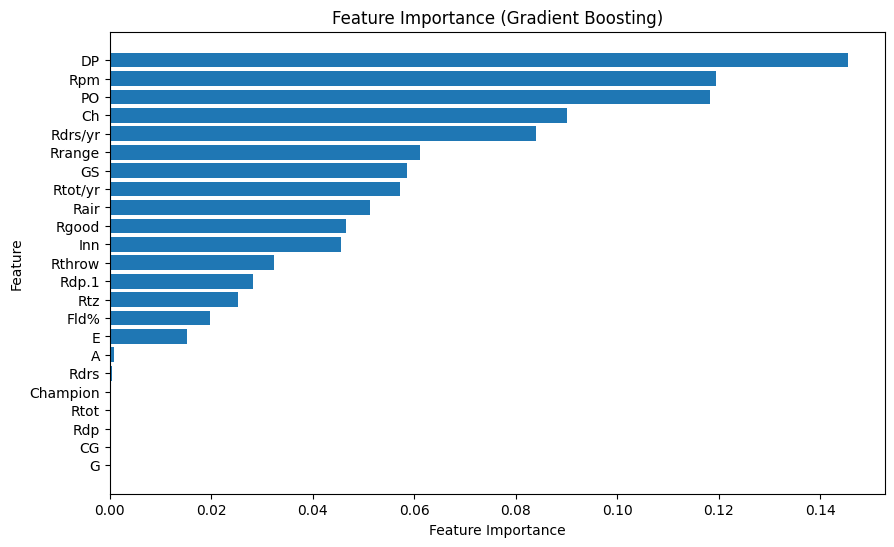

In [154]:
# Feature importance for Gradient Boosting
print("\nFeature Importance for Gradient Boosting:\n")

# Get feature importances and sort by importance
gb_importances = best_gb.feature_importances_
sorted_idx = np.argsort(gb_importances)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh([features[i] for i in sorted_idx], gb_importances[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance (Gradient Boosting)")
plt.gca().invert_yaxis()
plt.show()

In [155]:
# Define the hyperparameter grid for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Perform GridSearchCV to find the best parameters
grid_search_knn = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid_knn,
    scoring='roc_auc',
    cv=5
)

# Fit GridSearchCV
grid_search_knn.fit(shortstop_X_train, shortstop_y_train)

# Get the best model
best_knn = grid_search_knn.best_estimator_
print("\nBest Hyperparameters for KNN:")
print(grid_search_knn.best_params_)

# Predict probabilities for class 1
y_pred_prob_knn = best_knn.predict_proba(shortstop_X_test)[:, 1]  # Probability for class 1

# Add probabilities to the test dataset
shortstop_test_data['KNN_Probability_Class_1'] = y_pred_prob_knn

# Predict class labels for the test set
y_pred_knn = best_knn.predict(shortstop_X_test)

# Evaluate the model
print("\nClassification Report for KNN:")
print(classification_report(shortstop_y_test, y_pred_knn))
print(f"ROC AUC Score for KNN: {roc_auc_score(shortstop_y_test, y_pred_prob_knn):.4f}")
print(f"Mean Squared Error for KNN: {mean_squared_error(shortstop_y_test, y_pred_prob_knn):.4f}")

# Output top players by league
shortstop_test_data_subset = shortstop_test_data[['Name', 'Tm', 'Lg', 'Win', 'KNN_Probability_Class_1']]
leagues = shortstop_test_data_subset.groupby('Lg')
for league, group in leagues:
    print(f"\nTop Players in {league} League for KNN:")
    top_players = group.sort_values(by='KNN_Probability_Class_1', ascending=False).head(10)
    print(top_players[['Name', 'Tm', 'Lg', 'Win', 'KNN_Probability_Class_1']])



Best Hyperparameters for KNN:
{'n_neighbors': 11, 'p': 1, 'weights': 'uniform'}

Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       111
           1       0.00      0.00      0.00         2

    accuracy                           0.98       113
   macro avg       0.49      0.50      0.50       113
weighted avg       0.96      0.98      0.97       113

ROC AUC Score for KNN: 0.7095
Mean Squared Error for KNN: 0.0176

Top Players in AL League for KNN:
                 Name   Tm  Lg  Win  KNN_Probability_Class_1
79     Brayan Rocchio  CLE  AL    0                 0.181818
105      Taylor Walls  TBR  AL    0                 0.181818
65          Zach Neto  LAA  AL    0                 0.181818
23      J.P. Crawford  SEA  AL    0                 0.181818
42   Gunnar Henderson  BAL  AL    0                 0.090909
6          Nick Allen  OAK  AL    0                 0.000000
61        Jorge Mateo  BAL  AL   

In [156]:
# Define hyperparameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel type
    'degree': [2, 3],  # Degree for polynomial kernel
    'gamma': ['scale', 'auto'],  # Kernel coefficient
}

grid_search_svm = GridSearchCV(
    estimator=SVC(probability=True, random_state=1),
    param_grid=param_grid_svm,
    scoring='roc_auc',
    cv=5
)

# Fit GridSearchCV
grid_search_svm.fit(shortstop_X_train, shortstop_y_train)

# Get the best model
best_svm = grid_search_svm.best_estimator_
print("\nBest Hyperparameters for SVM:")
print(grid_search_svm.best_params_)

# Predict probabilities for class 1
y_pred_prob_svm = best_svm.predict_proba(shortstop_X_test)[:, 1]

# Add probabilities to the test dataset
shortstop_test_data['SVM_Probability_Class_1'] = y_pred_prob_svm

# Predict class labels for the test set
y_pred_svm = best_svm.predict(shortstop_X_test)

# Evaluate the model
print("\nClassification Report for SVM:")
print(classification_report(shortstop_y_test, y_pred_svm))
print(f"ROC AUC Score for SVM: {roc_auc_score(shortstop_y_test, y_pred_prob_svm):.4f}")
print(f"Mean Squared Error for SVM: {mean_squared_error(shortstop_y_test, y_pred_prob_svm):.4f}")

# Output top players by league
shortstop_test_data_subset = shortstop_test_data[['Name', 'Tm', 'Lg', 'Win', 'SVM_Probability_Class_1']]
leagues = shortstop_test_data_subset.groupby('Lg')
for league, group in leagues:
    print(f"\nTop Players in {league} League for SVM:")
    top_players = group.sort_values(by='SVM_Probability_Class_1', ascending=False).head(10)
    print(top_players[['Name', 'Tm', 'Lg', 'Win', 'SVM_Probability_Class_1']])


Best Hyperparameters for SVM:
{'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}

Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       111
           1       0.00      0.00      0.00         2

    accuracy                           0.98       113
   macro avg       0.49      0.50      0.50       113
weighted avg       0.96      0.98      0.97       113

ROC AUC Score for SVM: 0.9820
Mean Squared Error for SVM: 0.0149

Top Players in AL League for SVM:
                 Name   Tm  Lg  Win  SVM_Probability_Class_1
103     Anthony Volpe  NYY  AL    0                 0.173609
112    Bobby Witt Jr.  KCR  AL    1                 0.109599
65          Zach Neto  LAA  AL    0                 0.080663
42   Gunnar Henderson  BAL  AL    0                 0.076873
72        Jeremy Peña  HOU  AL    0                 0.052406
79     Brayan Rocchio  CLE  AL    0                 0.041397
47        Andy Ibáñez 

### Third Base

In [157]:
player_third_base

,Name,Age,Tm,Lg,Season,Champion,G,GS,CG,Inn,...,Rdrs/yr,Rpm,Rgood,Rair,Rrange,Rthrow,Rbnt,RF/9,RF/G,Win
0,Ehire Adrianza,34,LAA,AL,2024,0,6,4,4,42.0,...,29.0,1.0,0.0,0.0,1.0,0.0,NaN,1.71,1.33,0
1,Blaze Alexander,25,ARI,NL,2024,0,8,6,5,53.0,...,23.0,0.0,0.0,0.0,-1.0,1.0,1.0,2.38,1.75,0
2,CJ Alexander,27,KCR,AL,2024,0,3,3,2,25.0,...,-48.0,-1.0,0.0,0.0,-1.0,-1.0,NaN,1.44,1.33,0
3,Nick Allen,25,OAK,AL,2024,0,5,3,2,29.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.10,2.00,0
4,Armando Alvarez,29,OAK,AL,2024,0,6,4,3,36.0,...,-33.0,-1.0,0.0,0.0,-1.0,0.0,0.0,3.00,2.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,Danny Worth,27,DET,AL,2013,0,2,0,0,6.0,...,0.0,0.0,0.0,0.0,0.0,-1.0,NaN,4.50,1.50,0
2062,David Wright,30,NYM,NL,2013,0,111,111,107,1003.1,...,-2.0,0.0,-3.0,0.0,0.0,0.0,1.0,2.88,2.89,0
2063,Kevin Youkilis,34,NYY,AL,2013,0,22,20,19,185.1,...,-26.0,-4.0,0.0,0.0,-3.0,-1.0,0.0,1.80,1.68,0
2064,Michael Young,36,PHI,NL,2013,0,107,104,92,890.2,...,-26.0,-17.0,-2.0,0.0,-13.0,-4.0,0.0,2.35,2.18,0


In [158]:
league_third_base

,Season,Lg,#Fld,RA/G,G,GS,CG,Inn,Ch,PO,...,Rtz,Rdp,Rdrs,Rdrs/yr,Rpm,Rgood,Rair,Rrange,Rthrow,Rbnt
0,2024,AL,7,4.34,162,162,134,1436,410,118,...,-3,0,19,0,-1,0,0,1,-1,0
1,2023,AL,6,4.57,162,162,136,1439,415,111,...,0,0,10,0,-1,0,0,-1,1,0
2,2022,AL,6,4.20,162,162,143,1437,446,126,...,-2,1,24,0,-1,0,0,-1,0,0
3,2021,AL,6,4.58,162,162,141,1423,449,121,...,-1,0,9,0,-1,0,0,-1,0,0
4,2020,AL,5,4.63,60,60,52,519,155,42,...,-2,0,4,0,-1,0,0,-2,-1,0
5,2019,AL,6,4.95,162,162,142,1446,448,121,...,-2,0,-8,0,-2,0,0,-3,0,0
6,2018,AL,6,4.56,162,162,145,1444,442,114,...,-2,0,-4,0,-2,-1,0,-2,0,-1
7,2017,AL,6,4.67,162,162,141,1442,435,110,...,-3,0,6,0,-2,0,0,-2,0,0
8,2016,AL,6,4.47,162,162,144,1441,445,111,...,-1,1,9,0,0,0,0,0,0,0
9,2015,AL,5,4.29,162,162,139,1446,443,113,...,3,0,-4,0,1,0,0,1,0,0


In [159]:
# Drop unwanted columns
player_third_base = player_third_base.drop(columns=['RF/9', 'RF/G'])
league_third_base = league_third_base.drop(columns=['#Fld', 'RA/G'])

In [160]:
# Check for missing values
missing_values = player_third_base.isnull().sum()
print("Missing Values:")
print(missing_values[missing_values > 0])

Missing Values:
Fld%        165
Rtot/yr       3
Rdp         405
Rdrs/yr       3
Rpm          49
Rgood       155
Rair        183
Rrange       77
Rthrow       77
Rbnt       1000
dtype: int64


In [161]:
# Drop rows with missing values
player_third_base = player_third_base.dropna()

In [227]:
# Generate basic statistics
print(player_third_base.describe())

               Age       Season     Champion            G           GS  \
count  1039.000000  1039.000000  1039.000000  1039.000000  1039.000000   
mean     27.907603  2018.437921     0.067372    54.374398    48.916266   
std       3.657169     3.505260     0.250787    46.574669    46.940003   
min      20.000000  2013.000000     0.000000     1.000000     0.000000   
25%      25.000000  2015.000000     0.000000    16.000000    11.000000   
50%      27.000000  2018.000000     0.000000    38.000000    31.000000   
75%      30.000000  2022.000000     0.000000    86.000000    80.000000   
max      39.000000  2024.000000     1.000000   160.000000   160.000000   

                CG          Inn           Ch           PO            A  ...  \
count  1039.000000  1039.000000  1039.000000  1039.000000  1039.000000  ...   
mean     42.462945   432.633013   129.563041    33.080847    91.330125  ...   
std      43.851324   408.994852   123.799288    33.158015    87.531012  ...   
min       0.00000

In [ ]:
# Display the column names
player_third_base.columns

Index(['Name', 'Age', 'Tm', 'Lg', 'Season', 'Champion', 'G', 'GS', 'CG', 'Inn',
       'Ch', 'PO', 'A', 'E', 'DP', 'Fld%', 'Rtot', 'Rtot/yr', 'Rtz', 'Rdp',
       'Rdrs', 'Rdrs/yr', 'Rpm', 'Rgood', 'Rair', 'Rrange', 'Rthrow', 'Rbnt',
       'Win'],
      dtype='object')

In [163]:
# Merge player and league datasets on 'Season' and 'Lg', keeping all player rows
third_base = player_third_base.merge(
    league_third_base,
    on=["Season", "Lg"],
    suffixes=("_player", "_league"),
    how="left"
)

# Add the 'Win' column to the merged dataset
third_base["Win"] = player_third_base["Win"].values

# List of columns containing player and league metrics to be normalized
columns = [
    "G", "GS", "CG", "Inn", "Ch", "PO", "A", "E", "DP", "Fld%", 
    "Rtot", "Rtot/yr", "Rtz", "Rdp", "Rdrs", "Rdrs/yr", "Rpm",
    "Rgood", "Rair", "Rrange", "Rthrow", "Rbnt"
]

# Create a copy of the merged dataset for normalization
normalized_third_base = third_base.copy()

# Normalize the columns with player fielding metrics
for col in columns:
    if f"{col}_player" in third_base and f"{col}_league" in third_base:
        # Perform normalization and handle invalid values
        normalized_col = third_base[f"{col}_player"] / third_base[f"{col}_league"]
        normalized_col.replace([float('inf'), float('-inf')], pd.NA, inplace=True)  # Replace inf with NA
        normalized_col.fillna(third_base[f"{col}_player"], inplace=True)  # Revert to original value if invalid
        normalized_third_base[col] = normalized_col

# Drop extra columns from normalization dataset
for col in columns:
    normalized_third_base = normalized_third_base.drop(columns=[f"{col}_player", f"{col}_league"], errors='ignore')


In [164]:
normalized_third_base

,Name,Age,Tm,Lg,Season,Champion,Win,G,GS,CG,...,Rtz,Rdp,Rdrs,Rdrs/yr,Rpm,Rgood,Rair,Rrange,Rthrow,Rbnt
0,Blaze Alexander,25,ARI,NL,2024,0,0,0.049383,0.037037,0.035971,...,0.000000,0.0,0.083333,23.0,0.0,0.0,0.0,1.0,1.0,1.0
1,Nick Allen,25,OAK,AL,2024,0,0,0.030864,0.018519,0.014925,...,0.333333,0.0,0.000000,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0
2,Armando Alvarez,29,OAK,AL,2024,0,0,0.037037,0.024691,0.022388,...,0.333333,0.0,-0.052632,-33.0,1.0,0.0,0.0,-1.0,-0.0,0.0
3,Nolan Arenado,33,STL,NL,2024,0,0,0.901235,0.895062,0.949640,...,6.500000,0.0,0.500000,6.0,5.0,0.0,0.0,3.0,8.0,1.0
4,Brett Baty,24,NYM,NL,2024,0,0,0.290123,0.265432,0.237410,...,0.500000,0.0,-0.083333,-3.0,0.0,0.0,0.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034,Ty Wigginton,35,STL,NL,2013,1,0,0.030864,0.018519,0.022556,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,-1.0,0.0
1035,David Wright,30,NYM,NL,2013,0,0,0.685185,0.685185,0.804511,...,-1.000000,0.0,-1.000000,-2.0,0.0,-3.0,0.0,0.0,0.0,1.0
1036,Kevin Youkilis,34,NYY,AL,2013,0,0,0.135802,0.123457,0.131034,...,2.000000,0.0,0.200000,-26.0,4.0,0.0,0.0,1.5,-1.0,0.0
1037,Michael Young,36,PHI,NL,2013,0,0,0.660494,0.641975,0.691729,...,-8.500000,-2.0,-10.000000,-26.0,-17.0,-2.0,0.0,-13.0,-4.0,0.0


In [165]:
# Split the data into training and testing sets
third_base_train_data = normalized_third_base[normalized_third_base['Season'] != 2024]
third_base_test_data = normalized_third_base[normalized_third_base['Season'] == 2024]

# Define features and target
features = [
    'Champion', 'G', 'GS', 'CG', 'Inn', 'Ch', 'PO', 'A', 'E', 'DP',
    'Fld%', 'Rtot', 'Rtot/yr', 'Rtz', 'Rdp', 'Rdrs', 'Rdrs/yr', 'Rpm',
    'Rgood', 'Rair', 'Rrange', 'Rthrow', 'Rbnt'
]
target = 'Win'

# Extract features and target
third_base_X_train = third_base_train_data[features]
third_base_y_train = third_base_train_data[target]
third_base_X_test = third_base_test_data[features]
third_base_y_test = third_base_test_data[target]

In [166]:
# Define hyperparameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=1),
    param_grid=param_grid_rf,
    scoring='roc_auc',
    cv=5
)

# Fit GridSearchCV
grid_search_rf.fit(third_base_X_train, third_base_y_train)

# Get the best model
best_rf = grid_search_rf.best_estimator_
print("\nBest Hyperparameters for Random Forest:")
print(grid_search_rf.best_params_)

# Predict probabilities for class 1
y_pred_prob_rf = best_rf.predict_proba(third_base_X_test)[:, 1]

# Add probabilities to the test dataset
third_base_test_data['RF_Probability_Class_1'] = y_pred_prob_rf

# Predict class labels for the test set
y_pred_rf = best_rf.predict(third_base_X_test)

# Evaluate the model
print("\nClassification Report for Random Forest:")
print(classification_report(third_base_y_test, y_pred_rf))
print(f"ROC AUC Score for Random Forest: {roc_auc_score(third_base_y_test, y_pred_prob_rf):.4f}")
print(f"Mean Squared Error for Random Forest: {mean_squared_error(third_base_y_test, y_pred_prob_rf):.4f}")

# Output top players by league
third_base_test_data_subset = third_base_test_data[['Name', 'Tm', 'Lg', 'Win', 'RF_Probability_Class_1']]
leagues = third_base_test_data_subset.groupby('Lg')
for league, group in leagues:
    print(f"\nTop Players in {league} League for Random Forest:")
    top_players = group.sort_values(by='RF_Probability_Class_1', ascending=False).head(10)
    print(top_players[['Name', 'Tm', 'Lg', 'Win', 'RF_Probability_Class_1']])


Best Hyperparameters for Random Forest:
{'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        90
           1       0.00      0.00      0.00         2

    accuracy                           0.98        92
   macro avg       0.49      0.50      0.49        92
weighted avg       0.96      0.98      0.97        92

ROC AUC Score for Random Forest: 0.9889
Mean Squared Error for Random Forest: 0.0145

Top Players in AL League for Random Forest:
              Name   Tm  Lg  Win  RF_Probability_Class_1
7     Alex Bregman  HOU  AL    1                0.081667
81     Gio Urshela  DET  AL    0                0.010000
25   Maikel Garcia  KCR  AL    0                0.010000
1       Nick Allen  OAK  AL    0                0.000000
69      Josh Smith  TEX  AL    0                0.000000
50     Dylan


Feature Importance for Random Forest:



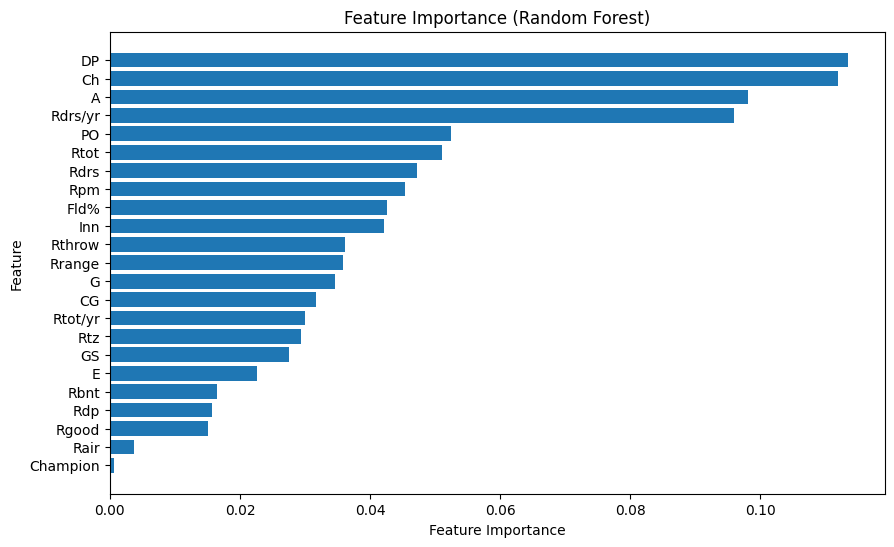

In [167]:
# Feature importance for Random Forest
print("\nFeature Importance for Random Forest:\n")

# Get feature importances and sort by importance
rf_importances = best_rf.feature_importances_
sorted_idx = np.argsort(rf_importances)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh([features[i] for i in sorted_idx], rf_importances[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance (Random Forest)")
plt.gca().invert_yaxis()
plt.show()

In [168]:
# Define hyperparameter grid for Logistic Regression
param_grid_lr = {
    'penalty': ['l1', 'l2'],
    'max_iter': [100, 500, 1000]
}

grid_search_lr = GridSearchCV(
    estimator=LogisticRegression(random_state=1),
    param_grid=param_grid_lr,
    scoring='roc_auc',
    cv=5
)

# Fit GridSearchCV
grid_search_lr.fit(third_base_X_train, third_base_y_train)

# Get the best model
best_lr = grid_search_lr.best_estimator_
print("\nBest Hyperparameters for Logistic Regression:")
print(grid_search_lr.best_params_)

# Predict probabilities for class 1
y_pred_prob_lr = best_lr.predict_proba(third_base_X_test)[:, 1]

# Add probabilities to the test dataset
third_base_test_data['LR_Probability_Class_1'] = y_pred_prob_lr

# Predict class labels for the test set
y_pred_lr = best_lr.predict(third_base_X_test)

# Evaluate the model
print("\nClassification Report for Logistic Regression:")
print(classification_report(third_base_y_test, y_pred_lr))
print(f"ROC AUC Score for Logistic Regression: {roc_auc_score(third_base_y_test, y_pred_prob_lr):.4f}")
print(f"Mean Squared Error for Logistic Regression: {mean_squared_error(third_base_y_test, y_pred_prob_lr):.4f}")


# Output top players by league
third_base_test_data_subset = third_base_test_data[['Name', 'Tm', 'Lg', 'Win', 'LR_Probability_Class_1']]
leagues = third_base_test_data_subset.groupby('Lg')
for league, group in leagues:
    print(f"\nTop Players in {league} League for Logistic Regression:")
    top_players = group.sort_values(by='LR_Probability_Class_1', ascending=False).head(10)
    print(top_players[['Name', 'Tm', 'Lg', 'Win', 'LR_Probability_Class_1']])


Best Hyperparameters for Logistic Regression:
{'max_iter': 500, 'penalty': 'l2'}

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        90
           1       0.00      0.00      0.00         2

    accuracy                           0.98        92
   macro avg       0.49      0.50      0.49        92
weighted avg       0.96      0.98      0.97        92

ROC AUC Score for Logistic Regression: 0.9333
Mean Squared Error for Logistic Regression: 0.0217

Top Players in AL League for Logistic Regression:
                  Name   Tm  Lg  Win  LR_Probability_Class_1
15       Ernie Clement  TOR  AL    0                0.404079
70         Nick Sogard  BOS  AL    0                0.258899
7         Alex Bregman  HOU  AL    1                0.257296
58        José Ramírez  CLE  AL    0                0.142333
10     Oswaldo Cabrera  NYY  AL    0                0.128545
64          Josh Rojas  SEA  

In [169]:
# Define hyperparameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_gb = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=1),
    param_grid=param_grid_gb,
    scoring='roc_auc',
    cv=5
)

# Fit GridSearchCV
grid_search_gb.fit(third_base_X_train, third_base_y_train)

# Get the best model
best_gb = grid_search_gb.best_estimator_
print("\nBest Hyperparameters for Gradient Boosting:")
print(grid_search_gb.best_params_)

# Predict probabilities for class 1
y_pred_prob_gb = best_gb.predict_proba(third_base_X_test)[:, 1]

# Add probabilities to the test dataset
third_base_test_data['GB_Probability_Class_1'] = y_pred_prob_gb

# Predict class labels for the test set
y_pred_gb = best_gb.predict(third_base_X_test)

# Evaluate the model
print("\nClassification Report for Gradient Boosting:")
print(classification_report(third_base_y_test, y_pred_gb))
print(f"ROC AUC Score for Gradient Boosting: {roc_auc_score(third_base_y_test, y_pred_prob_gb):.4f}")
print(f"Mean Squared Error for Gradient Boosting: {mean_squared_error(third_base_y_test, y_pred_prob_gb):.4f}")

# Output top players by league
third_base_test_data_subset = third_base_test_data[['Name', 'Tm', 'Lg', 'Win', 'GB_Probability_Class_1']]
leagues = third_base_test_data_subset.groupby('Lg')
for league, group in leagues:
    print(f"\nTop Players in {league} League for Gradient Boosting:")
    top_players = group.sort_values(by='GB_Probability_Class_1', ascending=False).head(10)
    print(top_players[['Name', 'Tm', 'Lg', 'Win', 'GB_Probability_Class_1']])


Best Hyperparameters for Gradient Boosting:
{'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}

Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        90
           1       0.00      0.00      0.00         2

    accuracy                           0.98        92
   macro avg       0.49      0.50      0.49        92
weighted avg       0.96      0.98      0.97        92

ROC AUC Score for Gradient Boosting: 0.9944
Mean Squared Error for Gradient Boosting: 0.0200

Top Players in AL League for Gradient Boosting:
               Name   Tm  Lg  Win  GB_Probability_Class_1
7      Alex Bregman  HOU  AL    1            1.282807e-07
10  Oswaldo Cabrera  NYY  AL    0            1.210077e-08
15    Ernie Clement  TOR  AL    0            9.330267e-09
56    Isaac Paredes  TBR  AL    0            2.614010e-09
58     José Ramírez  CLE  AL    0          


Feature Importance for Gradient Boosting:



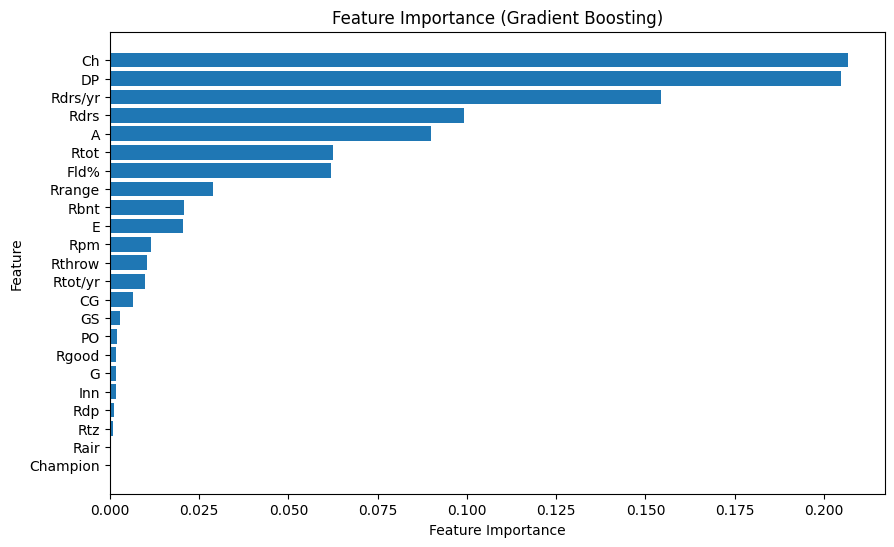

In [170]:
# Feature importance for Gradient Boosting
print("\nFeature Importance for Gradient Boosting:\n")

# Get feature importances and sort by importance
gb_importances = best_gb.feature_importances_
sorted_idx = np.argsort(gb_importances)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh([features[i] for i in sorted_idx], gb_importances[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance (Gradient Boosting)")
plt.gca().invert_yaxis()
plt.show()

In [171]:
# Define the hyperparameter grid for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Perform GridSearchCV to find the best parameters
grid_search_knn = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid_knn,
    scoring='roc_auc',
    cv=5
)

# Fit GridSearchCV
grid_search_knn.fit(third_base_X_train, third_base_y_train)

# Get the best model
best_knn = grid_search_knn.best_estimator_
print("\nBest Hyperparameters for KNN:")
print(grid_search_knn.best_params_)

# Predict probabilities for class 1
y_pred_prob_knn = best_knn.predict_proba(third_base_X_test)[:, 1]  # Probability for class 1

# Add probabilities to the test dataset
third_base_test_data['KNN_Probability_Class_1'] = y_pred_prob_knn

# Predict class labels for the test set
y_pred_knn = best_knn.predict(third_base_X_test)

# Evaluate the model
print("\nClassification Report for KNN:")
print(classification_report(third_base_y_test, y_pred_knn))
print(f"ROC AUC Score for KNN: {roc_auc_score(third_base_y_test, y_pred_prob_knn):.4f}")
print(f"Mean Squared Error for KNN: {mean_squared_error(third_base_y_test, y_pred_prob_knn):.4f}")

# Output top players by league
third_base_test_data_subset = third_base_test_data[['Name', 'Tm', 'Lg', 'Win', 'KNN_Probability_Class_1']]
leagues = third_base_test_data_subset.groupby('Lg')
for league, group in leagues:
    print(f"\nTop Players in {league} League for KNN:")
    top_players = group.sort_values(by='KNN_Probability_Class_1', ascending=False).head(10)
    print(top_players[['Name', 'Tm', 'Lg', 'Win', 'KNN_Probability_Class_1']])



Best Hyperparameters for KNN:
{'n_neighbors': 11, 'p': 1, 'weights': 'distance'}

Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        90
           1       0.00      0.00      0.00         2

    accuracy                           0.98        92
   macro avg       0.49      0.50      0.49        92
weighted avg       0.96      0.98      0.97        92

ROC AUC Score for KNN: 0.7361
Mean Squared Error for KNN: 0.0165

Top Players in AL League for KNN:
               Name   Tm  Lg  Win  KNN_Probability_Class_1
58     José Ramírez  CLE  AL    0                 0.099406
1        Nick Allen  OAK  AL    0                 0.000000
2   Armando Alvarez  OAK  AL    0                 0.000000
48     José Miranda  MIN  AL    0                 0.000000
50      Dylan Moore  SEA  AL    0                 0.000000
53      Tyler Nevin  OAK  AL    0                 0.000000
56    Isaac Paredes  TBR  AL    0             

In [172]:
# Define hyperparameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel type
    'degree': [2, 3],  # Degree for polynomial kernel
    'gamma': ['scale', 'auto'],  # Kernel coefficient
}

grid_search_svm = GridSearchCV(
    estimator=SVC(probability=True, random_state=1),
    param_grid=param_grid_svm,
    scoring='roc_auc',
    cv=5
)

# Fit GridSearchCV
grid_search_svm.fit(third_base_X_train, third_base_y_train)

# Get the best model
best_svm = grid_search_svm.best_estimator_
print("\nBest Hyperparameters for SVM:")
print(grid_search_svm.best_params_)

# Predict probabilities for class 1
y_pred_prob_svm = best_svm.predict_proba(third_base_X_test)[:, 1]

# Add probabilities to the test dataset
third_base_test_data['SVM_Probability_Class_1'] = y_pred_prob_svm

# Predict class labels for the test set
y_pred_svm = best_svm.predict(third_base_X_test)

# Evaluate the model
print("\nClassification Report for SVM:")
print(classification_report(third_base_y_test, y_pred_svm))
print(f"ROC AUC Score for SVM: {roc_auc_score(third_base_y_test, y_pred_prob_svm):.4f}")
print(f"Mean Squared Error for SVM: {mean_squared_error(third_base_y_test, y_pred_prob_svm):.4f}")

# Output top players by league
third_base_test_data_subset = third_base_test_data[['Name', 'Tm', 'Lg', 'Win', 'SVM_Probability_Class_1']]
leagues = third_base_test_data_subset.groupby('Lg')
for league, group in leagues:
    print(f"\nTop Players in {league} League for SVM:")
    top_players = group.sort_values(by='SVM_Probability_Class_1', ascending=False).head(10)
    print(top_players[['Name', 'Tm', 'Lg', 'Win', 'SVM_Probability_Class_1']])


Best Hyperparameters for SVM:
{'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}

Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98        90
           1       0.00      0.00      0.00         2

    accuracy                           0.97        92
   macro avg       0.49      0.49      0.49        92
weighted avg       0.96      0.97      0.96        92

ROC AUC Score for SVM: 0.9333
Mean Squared Error for SVM: 0.0231

Top Players in AL League for SVM:
                  Name   Tm  Lg  Win  SVM_Probability_Class_1
15       Ernie Clement  TOR  AL    0                 0.194979
7         Alex Bregman  HOU  AL    1                 0.167890
70         Nick Sogard  BOS  AL    0                 0.167759
58        José Ramírez  CLE  AL    0                 0.148064
10     Oswaldo Cabrera  NYY  AL    0                 0.092838
64          Josh Rojas  SEA  AL    0                 0.090450
34  Isiah Kiner-

### Left Field

In [173]:
player_left_field

,Name,Age,Tm,Lg,Season,Champion,G,GS,CG,Inn,...,Rtz,Rof,Rdrs,Rdrs/yr,Rpm,Rof.1,Rgood,RF/9,RF/G,Win
0,Wilyer Abreu,25,BOS,AL,2024,0,5,4,4,37.0,...,-1,0,-1,-32.0,-1.0,0.0,0.0,2.19,1.80,0
1,Jordyn Adams,24,LAA,AL,2024,0,1,0,0,1.0,...,0,0,0,0.0,NaN,NaN,NaN,0.00,0.00,0
2,Armando Alvarez,29,OAK,AL,2024,0,2,1,0,7.0,...,1,0,0,0.0,0.0,0.0,0.0,5.14,2.00,0
3,Yordan Alvarez,27,HOU,AL,2024,0,53,53,23,421.0,...,-2,0,-5,-14.0,-6.0,1.0,0.0,1.58,1.40,0
4,Miguel Andujar,29,OAK,AL,2024,0,72,71,64,615.2,...,5,4,-1,-2.0,-6.0,4.0,1.0,2.03,1.93,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2886,Dewayne Wise,35,CHW,AL,2013,0,4,0,0,6.2,...,0,0,0,0.0,0.0,0.0,0.0,5.40,1.00,0
2887,Christian Yelich,21,MIA,NL,2013,0,59,56,56,505.1,...,5,-2,0,0.0,4.0,-3.0,-1.0,1.83,1.75,0
2888,Chris Young,29,OAK,AL,2013,0,24,18,15,164.1,...,2,-1,-1,-7.0,0.0,-1.0,0.0,2.41,1.83,0
2889,Eric Young Jr.,28,NYM,NL,2013,0,95,88,78,790.1,...,7,0,2,3.0,4.0,-1.0,-1.0,2.13,1.97,0


In [174]:
league_left_field

,Season,Lg,#Fld,RA/G,G,GS,CG,Inn,Ch,PO,...,Fld%,Rtot,Rtot/yr,Rtz,Rof,Rdrs,Rdrs/yr,Rpm,Rof.1,Rgood
0,2024,AL,9,4.34,162,162,122,1436,331,320,...,0.987,3,0,3,0,19,0,1,1,0
1,2023,AL,8,4.57,162,162,125,1439,311,298,...,0.987,-1,0,-1,0,10,0,1,1,1
2,2022,AL,10,4.20,162,162,127,1437,312,298,...,0.985,2,0,1,0,24,0,1,1,1
3,2021,AL,9,4.58,162,162,122,1423,289,278,...,0.988,-1,0,-2,0,9,0,-1,1,0
4,2020,AL,7,4.63,60,60,46,519,107,103,...,0.985,2,0,2,0,4,0,0,0,0
5,2019,AL,9,4.95,162,162,133,1446,301,286,...,0.983,0,0,-1,1,-8,0,-2,0,0
6,2018,AL,8,4.56,162,162,129,1444,321,307,...,0.986,0,0,-1,1,-4,0,-1,1,1
7,2017,AL,7,4.67,162,162,129,1442,311,296,...,0.986,2,0,3,-1,6,0,0,0,0
8,2016,AL,8,4.47,162,162,127,1441,303,287,...,0.984,-2,0,-2,0,9,0,-1,-1,1
9,2015,AL,9,4.29,162,162,118,1446,312,296,...,0.984,-1,0,-3,2,-4,0,0,2,1


In [175]:
# Drop unwanted columns
player_left_field = player_left_field.drop(columns=['RF/9', 'RF/G'])
league_left_field = league_left_field.drop(columns=['#Fld', 'RA/G'])

In [176]:
# Check for missing values
missing_values = player_left_field.isnull().sum()
print("Missing Values:")
print(missing_values[missing_values > 0])

Missing Values:
Fld%       305
Rtot/yr     11
Rdrs/yr     11
Rpm        118
Rof.1      165
Rgood      165
dtype: int64


In [177]:
# Drop rows with missing values
player_left_field = player_left_field.dropna()

In [228]:
# Generate basic statistics
print(player_left_field.describe())

               Age       Season     Champion            G           GS  \
count  2586.000000  2586.000000  2586.000000  2586.000000  2586.000000   
mean     27.800851  2018.546404     0.060712    26.560712    21.334493   
std       3.518640     3.434884     0.238847    32.530759    30.701178   
min      19.000000  2013.000000     0.000000     1.000000     0.000000   
25%      25.000000  2016.000000     0.000000     5.000000     2.000000   
50%      27.000000  2019.000000     0.000000    13.000000     9.000000   
75%      30.000000  2022.000000     0.000000    35.000000    26.000000   
max      44.000000  2024.000000     1.000000   156.000000   155.000000   

                CG          Inn           Ch           PO            A  ...  \
count  2586.000000  2586.000000  2586.000000  2586.000000  2586.000000  ...   
mean     16.305491   189.513534    40.269528    38.531323     1.141145  ...   
std      26.511577   266.875609    56.945409    54.595959     2.056596  ...   
min       0.00000

In [ ]:
# Display the column names
player_left_field.columns

Index(['Name', 'Age', 'Tm', 'Lg', 'Season', 'Champion', 'G', 'GS', 'CG', 'Inn',
       'Ch', 'PO', 'A', 'E', 'DP', 'Fld%', 'Rtot', 'Rtot/yr', 'Rtz', 'Rof',
       'Rdrs', 'Rdrs/yr', 'Rpm', 'Rof.1', 'Rgood', 'Win'],
      dtype='object')

In [179]:
# Merge player and league datasets on 'Season' and 'Lg', keeping all player rows
left_field = player_left_field.merge(
    league_left_field,
    on=["Season", "Lg"],
    suffixes=("_player", "_league"),
    how="left"
)

# Add the 'Win' column to the merged dataset
left_field["Win"] = player_left_field["Win"].values

# List of columns containing player and league metrics to be normalized
columns = [
    "G", "GS", "CG", "Inn", "Ch", "PO", "A", "E", "DP", "Fld%", 
    "Rtot", "Rtot/yr", "Rtz", "Rof", "Rdrs", "Rdrs/yr", "Rpm",
    'Rof.1', "Rgood"
]

# Create a copy of the merged dataset for normalization
normalized_left_field = left_field.copy()

# Normalize the columns with player fielding metrics
for col in columns:
    if f"{col}_player" in left_field and f"{col}_league" in left_field:
        # Perform normalization and handle invalid values
        normalized_col = left_field[f"{col}_player"] / left_field[f"{col}_league"]
        normalized_col.replace([float('inf'), float('-inf')], pd.NA, inplace=True)  # Replace inf with NA
        normalized_col.fillna(left_field[f"{col}_player"], inplace=True)  # Revert to original value if invalid
        normalized_left_field[col] = normalized_col

# Drop extra columns from normalization dataset
for col in columns:
    normalized_left_field = normalized_left_field.drop(columns=[f"{col}_player", f"{col}_league"], errors='ignore')


In [180]:
normalized_left_field

,Name,Age,Tm,Lg,Season,Champion,Win,G,GS,CG,...,Fld%,Rtot,Rtot/yr,Rtz,Rof,Rdrs,Rdrs/yr,Rpm,Rof.1,Rgood
0,Wilyer Abreu,25,BOS,AL,2024,0,0,0.030864,0.024691,0.032787,...,1.013171,-0.333333,-37.0,-0.333333,0.0,-0.052632,-32.0,-1.0,0.0,0.0
1,Armando Alvarez,29,OAK,AL,2024,0,0,0.012346,0.006173,0.000000,...,1.013171,0.333333,118.0,0.333333,0.0,0.000000,0.0,0.0,0.0,0.0
2,Yordan Alvarez,27,HOU,AL,2024,0,0,0.327160,0.327160,0.188525,...,1.000000,-0.666667,-5.0,-0.666667,0.0,-0.263158,-14.0,-6.0,1.0,0.0
3,Miguel Andujar,29,OAK,AL,2024,0,0,0.444444,0.438272,0.524590,...,0.998987,2.666667,16.0,1.666667,4.0,-0.052632,-2.0,-6.0,4.0,1.0
4,Gabriel Arias,24,CLE,AL,2024,0,0,0.012346,0.006173,0.008197,...,1.013171,0.000000,-37.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2581,Dewayne Wise,35,CHW,AL,2013,0,0,0.024691,0.000000,0.000000,...,0.808898,-0.000000,18.0,-0.000000,0.0,-0.000000,0.0,-0.0,0.0,0.0
2582,Christian Yelich,21,MIA,NL,2013,0,0,0.364198,0.345679,0.455285,...,1.016260,0.750000,8.0,1.250000,2.0,0.000000,0.0,4.0,3.0,1.0
2583,Chris Young,29,OAK,AL,2013,0,0,0.148148,0.111111,0.120968,...,1.011122,-0.250000,4.0,-0.500000,-1.0,0.050000,-7.0,-0.0,-1.0,0.0
2584,Eric Young Jr.,28,NYM,NL,2013,0,0,0.586420,0.543210,0.634146,...,1.005081,1.750000,10.0,1.750000,-0.0,1.000000,3.0,4.0,1.0,1.0


In [181]:
# Split the data into training and testing sets
left_field_train_data = normalized_left_field[normalized_left_field['Season'] != 2024]
left_field_test_data = normalized_left_field[normalized_left_field['Season'] == 2024]

# Define features and target
features = [
    'Champion', 'G', 'GS', 'CG', 'Inn', 'Ch', 'PO', 'A', 'E', 'DP',
    'Fld%', 'Rtot', 'Rtot/yr', 'Rtz', 'Rof', 'Rdrs', 'Rdrs/yr', 'Rpm',
    'Rof.1', 'Rgood'
]
target = 'Win'

# Extract features and target
left_field_X_train = left_field_train_data[features]
left_field_y_train = left_field_train_data[target]
left_field_X_test = left_field_test_data[features]
left_field_y_test = left_field_test_data[target]

In [182]:
# Define hyperparameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=1),
    param_grid=param_grid_rf,
    scoring='roc_auc',
    cv=5
)

# Fit GridSearchCV
grid_search_rf.fit(left_field_X_train, left_field_y_train)

# Get the best model
best_rf = grid_search_rf.best_estimator_
print("\nBest Hyperparameters for Random Forest:")
print(grid_search_rf.best_params_)

# Predict probabilities for class 1
y_pred_prob_rf = best_rf.predict_proba(left_field_X_test)[:, 1]

# Add probabilities to the test dataset
left_field_test_data['RF_Probability_Class_1'] = y_pred_prob_rf

# Predict class labels for the test set
y_pred_rf = best_rf.predict(left_field_X_test)

# Evaluate the model
print("\nClassification Report for Random Forest:")
print(classification_report(left_field_y_test, y_pred_rf))
print(f"ROC AUC Score for Random Forest: {roc_auc_score(left_field_y_test, y_pred_prob_rf):.4f}")
print(f"Mean Squared Error for Random Forest: {mean_squared_error(left_field_y_test, y_pred_prob_rf):.4f}")

# Output top players by league
left_field_test_data_subset = left_field_test_data[['Name', 'Tm', 'Lg', 'Win', 'RF_Probability_Class_1']]
leagues = left_field_test_data_subset.groupby('Lg')
for league, group in leagues:
    print(f"\nTop Players in {league} League for Random Forest:")
    top_players = group.sort_values(by='RF_Probability_Class_1', ascending=False).head(10)
    print(top_players[['Name', 'Tm', 'Lg', 'Win', 'RF_Probability_Class_1']])


Best Hyperparameters for Random Forest:
{'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       207
           1       1.00      0.50      0.67         2

    accuracy                           1.00       209
   macro avg       1.00      0.75      0.83       209
weighted avg       1.00      1.00      0.99       209

ROC AUC Score for Random Forest: 0.9831
Mean Squared Error for Random Forest: 0.0059

Top Players in AL League for Random Forest:
                  Name   Tm  Lg  Win  RF_Probability_Class_1
192       Alex Verdugo  NYY  AL    0                    0.28
13   Andrew Benintendi  CHW  AL    0                    0.16
104     Wyatt Langford  TEX  AL    0                    0.12
73        Riley Greene  DET  AL    0                    0.10
199        Taylor Ward  LAA  AL    0             


Feature Importance for Random Forest:



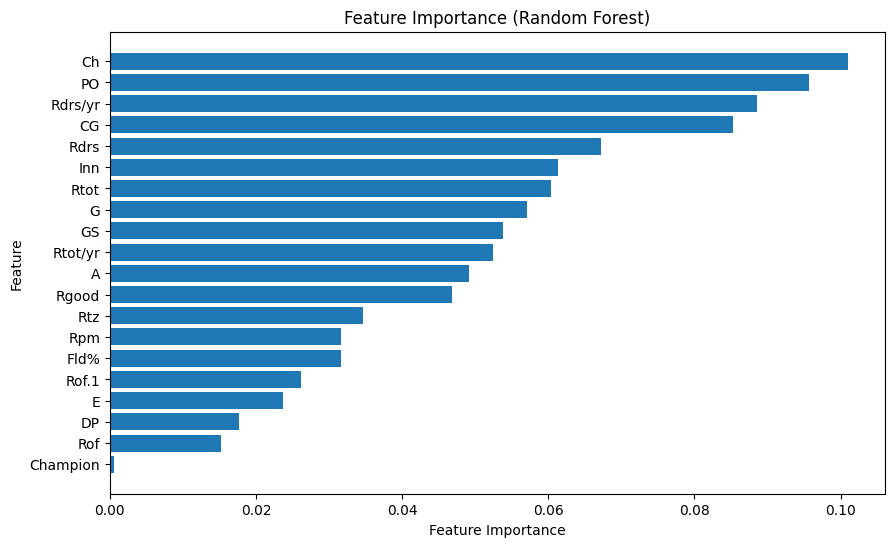

In [183]:
# Feature importance for Random Forest
print("\nFeature Importance for Random Forest:\n")

# Get feature importances and sort by importance
rf_importances = best_rf.feature_importances_
sorted_idx = np.argsort(rf_importances)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh([features[i] for i in sorted_idx], rf_importances[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance (Random Forest)")
plt.gca().invert_yaxis()
plt.show()

In [184]:
# Define hyperparameter grid for Logistic Regression
param_grid_lr = {
    'penalty': ['l1', 'l2'],
    'max_iter': [100, 500, 1000]
}

grid_search_lr = GridSearchCV(
    estimator=LogisticRegression(random_state=1),
    param_grid=param_grid_lr,
    scoring='roc_auc',
    cv=5
)

# Fit GridSearchCV
grid_search_lr.fit(left_field_X_train, left_field_y_train)

# Get the best model
best_lr = grid_search_lr.best_estimator_
print("\nBest Hyperparameters for Logistic Regression:")
print(grid_search_lr.best_params_)

# Predict probabilities for class 1
y_pred_prob_lr = best_lr.predict_proba(left_field_X_test)[:, 1]

# Add probabilities to the test dataset
left_field_test_data['LR_Probability_Class_1'] = y_pred_prob_lr

# Predict class labels for the test set
y_pred_lr = best_lr.predict(left_field_X_test)

# Evaluate the model
print("\nClassification Report for Logistic Regression:")
print(classification_report(left_field_y_test, y_pred_lr))
print(f"ROC AUC Score for Logistic Regression: {roc_auc_score(left_field_y_test, y_pred_prob_lr):.4f}")
print(f"Mean Squared Error for Logistic Regression: {mean_squared_error(left_field_y_test, y_pred_prob_lr):.4f}")


# Output top players by league
left_field_test_data_subset = left_field_test_data[['Name', 'Tm', 'Lg', 'Win', 'LR_Probability_Class_1']]
leagues = left_field_test_data_subset.groupby('Lg')
for league, group in leagues:
    print(f"\nTop Players in {league} League for Logistic Regression:")
    top_players = group.sort_values(by='LR_Probability_Class_1', ascending=False).head(10)
    print(top_players[['Name', 'Tm', 'Lg', 'Win', 'LR_Probability_Class_1']])


Best Hyperparameters for Logistic Regression:
{'max_iter': 1000, 'penalty': 'l2'}

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       207
           1       1.00      0.50      0.67         2

    accuracy                           1.00       209
   macro avg       1.00      0.75      0.83       209
weighted avg       1.00      1.00      0.99       209

ROC AUC Score for Logistic Regression: 0.9976
Mean Squared Error for Logistic Regression: 0.0037

Top Players in AL League for Logistic Regression:
                  Name   Tm  Lg  Win  LR_Probability_Class_1
192       Alex Verdugo  NYY  AL    0                0.368201
103        Steven Kwan  CLE  AL    1                0.301539
199        Taylor Ward  LAA  AL    0                0.202598
5      Randy Arozarena  TBR  AL    0                0.085596
104     Wyatt Langford  TEX  AL    0                0.066472
13   Andrew Benintendi  CHW 

In [185]:
# Define hyperparameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_gb = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=1),
    param_grid=param_grid_gb,
    scoring='roc_auc',
    cv=5
)

# Fit GridSearchCV
grid_search_gb.fit(left_field_X_train, left_field_y_train)

# Get the best model
best_gb = grid_search_gb.best_estimator_
print("\nBest Hyperparameters for Gradient Boosting:")
print(grid_search_gb.best_params_)

# Predict probabilities for class 1
y_pred_prob_gb = best_gb.predict_proba(left_field_X_test)[:, 1]

# Add probabilities to the test dataset
left_field_test_data['GB_Probability_Class_1'] = y_pred_prob_gb

# Predict class labels for the test set
y_pred_gb = best_gb.predict(left_field_X_test)

# Evaluate the model
print("\nClassification Report for Gradient Boosting:")
print(classification_report(left_field_y_test, y_pred_gb))
print(f"ROC AUC Score for Gradient Boosting: {roc_auc_score(left_field_y_test, y_pred_prob_gb):.4f}")
print(f"Mean Squared Error for Gradient Boosting: {mean_squared_error(left_field_y_test, y_pred_prob_gb):.4f}")

# Output top players by league
left_field_test_data_subset = left_field_test_data[['Name', 'Tm', 'Lg', 'Win', 'GB_Probability_Class_1']]
leagues = left_field_test_data_subset.groupby('Lg')
for league, group in leagues:
    print(f"\nTop Players in {league} League for Gradient Boosting:")
    top_players = group.sort_values(by='GB_Probability_Class_1', ascending=False).head(10)
    print(top_players[['Name', 'Tm', 'Lg', 'Win', 'GB_Probability_Class_1']])


Best Hyperparameters for Gradient Boosting:
{'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}

Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       207
           1       0.50      0.50      0.50         2

    accuracy                           0.99       209
   macro avg       0.75      0.75      0.75       209
weighted avg       0.99      0.99      0.99       209

ROC AUC Score for Gradient Boosting: 0.9758
Mean Squared Error for Gradient Boosting: 0.0065

Top Players in AL League for Gradient Boosting:
                  Name   Tm  Lg  Win  GB_Probability_Class_1
192       Alex Verdugo  NYY  AL    0                0.604617
13   Andrew Benintendi  CHW  AL    0                0.050883
3       Miguel Andujar  OAK  AL    0                0.004511
5      Randy Arozarena  TBR  AL    0                0.000813
199        Taylor Ward  LAA 


Feature Importance for Gradient Boosting:



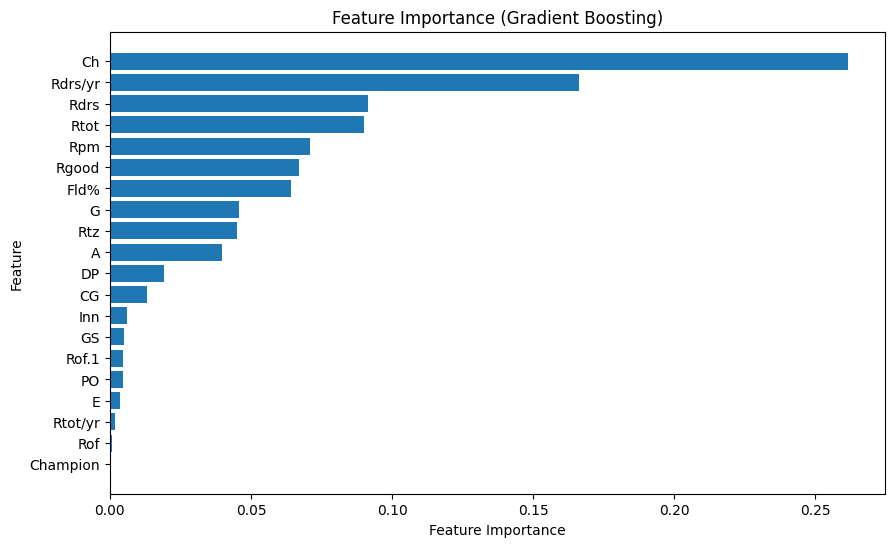

In [186]:
# Feature importance for Gradient Boosting
print("\nFeature Importance for Gradient Boosting:\n")

# Get feature importances and sort by importance
gb_importances = best_gb.feature_importances_
sorted_idx = np.argsort(gb_importances)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh([features[i] for i in sorted_idx], gb_importances[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance (Gradient Boosting)")
plt.gca().invert_yaxis()
plt.show()

In [187]:
# Define the hyperparameter grid for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Perform GridSearchCV to find the best parameters
grid_search_knn = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid_knn,
    scoring='roc_auc',
    cv=5
)

# Fit GridSearchCV
grid_search_knn.fit(left_field_X_train, left_field_y_train)

# Get the best model
best_knn = grid_search_knn.best_estimator_
print("\nBest Hyperparameters for KNN:")
print(grid_search_knn.best_params_)

# Predict probabilities for class 1
y_pred_prob_knn = best_knn.predict_proba(left_field_X_test)[:, 1]  # Probability for class 1

# Add probabilities to the test dataset
left_field_test_data['KNN_Probability_Class_1'] = y_pred_prob_knn

# Predict class labels for the test set
y_pred_knn = best_knn.predict(left_field_X_test)

# Evaluate the model
print("\nClassification Report for KNN:")
print(classification_report(left_field_y_test, y_pred_knn))
print(f"ROC AUC Score for KNN: {roc_auc_score(left_field_y_test, y_pred_prob_knn):.4f}")
print(f"Mean Squared Error for KNN: {mean_squared_error(left_field_y_test, y_pred_prob_knn):.4f}")

# Output top players by league
left_field_test_data_subset = left_field_test_data[['Name', 'Tm', 'Lg', 'Win', 'KNN_Probability_Class_1']]
leagues = left_field_test_data_subset.groupby('Lg')
for league, group in leagues:
    print(f"\nTop Players in {league} League for KNN:")
    top_players = group.sort_values(by='KNN_Probability_Class_1', ascending=False).head(10)
    print(top_players[['Name', 'Tm', 'Lg', 'Win', 'KNN_Probability_Class_1']])



Best Hyperparameters for KNN:
{'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}

Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       207
           1       0.00      0.00      0.00         2

    accuracy                           0.99       209
   macro avg       0.50      0.50      0.50       209
weighted avg       0.98      0.99      0.99       209

ROC AUC Score for KNN: 0.4952
Mean Squared Error for KNN: 0.0097

Top Players in AL League for KNN:
                  Name   Tm  Lg  Win  KNN_Probability_Class_1
73        Riley Greene  DET  AL    0                 0.111111
104     Wyatt Langford  TEX  AL    0                 0.111111
124     Zach McKinstry  DET  AL    0                 0.000000
146      Wenceel Pérez  DET  AL    0                 0.000000
144    Richie Palacios  TBR  AL    0                 0.000000
139      Tyler O'Neill  BOS  AL    0                 0.000000
138       Ryan O'Hearn  BAL

In [188]:
# Define hyperparameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel type
    'degree': [2, 3],  # Degree for polynomial kernel
    'gamma': ['scale', 'auto'],  # Kernel coefficient
}

grid_search_svm = GridSearchCV(
    estimator=SVC(probability=True, random_state=1),
    param_grid=param_grid_svm,
    scoring='roc_auc',
    cv=5
)

# Fit GridSearchCV
grid_search_svm.fit(left_field_X_train, left_field_y_train)

# Get the best model
best_svm = grid_search_svm.best_estimator_
print("\nBest Hyperparameters for SVM:")
print(grid_search_svm.best_params_)

# Predict probabilities for class 1
y_pred_prob_svm = best_svm.predict_proba(left_field_X_test)[:, 1]

# Add probabilities to the test dataset
left_field_test_data['SVM_Probability_Class_1'] = y_pred_prob_svm

# Predict class labels for the test set
y_pred_svm = best_svm.predict(left_field_X_test)

# Evaluate the model
print("\nClassification Report for SVM:")
print(classification_report(left_field_y_test, y_pred_svm))
print(f"ROC AUC Score for SVM: {roc_auc_score(left_field_y_test, y_pred_prob_svm):.4f}")
print(f"Mean Squared Error for SVM: {mean_squared_error(left_field_y_test, y_pred_prob_svm):.4f}")

# Output top players by league
left_field_test_data_subset = left_field_test_data[['Name', 'Tm', 'Lg', 'Win', 'SVM_Probability_Class_1']]
leagues = left_field_test_data_subset.groupby('Lg')
for league, group in leagues:
    print(f"\nTop Players in {league} League for SVM:")
    top_players = group.sort_values(by='SVM_Probability_Class_1', ascending=False).head(10)
    print(top_players[['Name', 'Tm', 'Lg', 'Win', 'SVM_Probability_Class_1']])


Best Hyperparameters for SVM:
{'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}

Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       207
           1       0.00      0.00      0.00         2

    accuracy                           0.99       209
   macro avg       0.50      0.50      0.50       209
weighted avg       0.98      0.99      0.99       209

ROC AUC Score for SVM: 1.0000
Mean Squared Error for SVM: 0.0071

Top Players in AL League for SVM:
                Name   Tm  Lg  Win  SVM_Probability_Class_1
103      Steven Kwan  CLE  AL    1                 0.129107
104   Wyatt Langford  TEX  AL    0                 0.123482
192     Alex Verdugo  NYY  AL    0                 0.085509
73      Riley Greene  DET  AL    0                 0.081853
190   Daulton Varsho  TOR  AL    0                 0.044894
1    Armando Alvarez  OAK  AL    0                 0.037654
3     Miguel Andujar  OAK  AL    

### Center Field

In [189]:
player_center_field

,Name,Age,Tm,Lg,Season,Champion,G,GS,CG,Inn,...,Rtz,Rof,Rdrs,Rdrs/yr,Rpm,Rof.1,Rgood,RF/9,RF/G,Win
0,Wilyer Abreu,25,BOS,AL,2024,0,1,0,0,2.0,...,0,0,0,0,0.0,0.0,0.0,4.50,1.00,0
1,Jordyn Adams,24,LAA,AL,2024,0,4,4,4,39.0,...,1,0,-1,-31,-1.0,0.0,0.0,3.23,3.50,0
2,Jo Adell,25,LAA,AL,2024,0,4,4,3,34.0,...,-1,0,0,0,0.0,0.0,0.0,1.59,1.50,0
3,Gabriel Arias,24,CLE,AL,2024,0,4,2,2,19.0,...,-1,-1,-1,-63,-1.0,0.0,0.0,2.37,1.25,0
4,Randy Arozarena,29,TBR,AL,2024,0,9,6,5,58.1,...,2,0,1,20,1.0,0.0,0.0,3.24,2.33,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1931,Chris Young,29,OAK,AL,2013,0,54,39,36,381.0,...,-4,1,-5,-16,-2.0,-3.0,0.0,3.12,2.44,0
1932,Eric Young Jr.,28,COL,NL,2013,0,18,13,8,125.0,...,-2,0,-3,-28,-2.0,-1.0,0.0,2.38,1.83,0
1933,Eric Young Jr.,28,COL,NL,2013,0,10,8,7,81.0,...,-1,0,-3,-44,-2.0,-1.0,0.0,3.11,2.80,0
1934,Eric Young Jr.,28,NYM,NL,2013,0,8,5,1,44.0,...,-1,0,0,0,0.0,0.0,0.0,1.02,0.63,0


In [190]:
league_center_field

,Season,Lg,#Fld,RA/G,G,GS,CG,Inn,Ch,PO,...,Fld%,Rtot,Rtot/yr,Rtz,Rof,Rdrs,Rdrs/yr,Rpm,Rof.1,Rgood
0,2024,AL,6,4.34,162,162,133,1436,426,416,...,0.990,-1,0,-1,0,19,0,0,1,0
1,2023,AL,6,4.57,162,162,138,1439,411,402,...,0.990,2,0,2,0,10,0,2,0,0
2,2022,AL,6,4.20,162,162,133,1437,415,406,...,0.992,2,0,2,0,24,0,1,0,0
3,2021,AL,6,4.58,162,162,140,1423,404,393,...,0.990,0,0,0,0,9,0,-1,0,0
4,2020,AL,4,4.63,60,60,52,519,147,144,...,0.991,2,0,2,0,4,0,1,0,0
5,2019,AL,6,4.95,162,162,139,1446,405,393,...,0.988,4,0,3,1,-8,0,-1,0,1
6,2018,AL,6,4.56,162,162,138,1444,416,404,...,0.989,0,0,-1,1,-4,0,-3,0,1
7,2017,AL,5,4.67,162,162,138,1442,411,398,...,0.987,3,0,4,-1,6,0,4,0,1
8,2016,AL,6,4.47,162,162,145,1441,401,387,...,0.988,-6,0,-7,1,9,0,-1,0,0
9,2015,AL,5,4.29,162,162,141,1446,435,421,...,0.990,0,0,-2,2,-4,0,3,2,1


In [191]:
# Drop unwanted columns
player_center_field = player_center_field.drop(columns=['RF/9', 'RF/G'])
league_center_field = league_center_field.drop(columns=['#Fld', 'RA/G'])

In [192]:
# Check for missing values
missing_values = player_center_field.isnull().sum()
print("Missing Values:")
print(missing_values[missing_values > 0])

Missing Values:
Fld%     130
Rpm       59
Rof.1     73
Rgood     73
dtype: int64


In [193]:
# Drop rows with missing values
player_center_field = player_center_field.dropna()

In [229]:
# Generate basic statistics
print(player_center_field.describe())

               Age       Season     Champion            G           GS  \
count  1806.000000  1806.000000  1806.000000  1806.000000  1806.000000   
mean     27.158361  2018.663344     0.062569    35.545404    30.589701   
std       3.337250     3.402892     0.242254    41.464905    39.164310   
min      20.000000  2013.000000     0.000000     1.000000     0.000000   
25%      25.000000  2016.000000     0.000000     5.000000     3.000000   
50%      27.000000  2019.000000     0.000000    18.000000    13.000000   
75%      29.000000  2022.000000     0.000000    50.750000    41.750000   
max      43.000000  2024.000000     1.000000   158.000000   158.000000   

               CG          Inn           Ch           PO            A  ...  \
count  1806.00000  1806.000000  1806.000000  1806.000000  1806.000000  ...   
mean     25.76412   271.899280    76.789037    74.599114     1.343854  ...   
std      36.51017   346.541865    99.373463    96.584221     2.275665  ...   
min       0.00000    

In [194]:
# Display the column names
player_center_field.columns

Index(['Name', 'Age', 'Tm', 'Lg', 'Season', 'Champion', 'G', 'GS', 'CG', 'Inn',
       'Ch', 'PO', 'A', 'E', 'DP', 'Fld%', 'Rtot', 'Rtot/yr', 'Rtz', 'Rof',
       'Rdrs', 'Rdrs/yr', 'Rpm', 'Rof.1', 'Rgood', 'Win'],
      dtype='object')

In [195]:
# Merge player and league datasets on 'Season' and 'Lg', keeping all player rows
center_field = player_center_field.merge(
    league_center_field,
    on=["Season", "Lg"],
    suffixes=("_player", "_league"),
    how="left"
)

# Add the 'Win' column to the merged dataset
center_field["Win"] = player_center_field["Win"].values

# List of columns containing player and league metrics to be normalized
columns = [
    "G", "GS", "CG", "Inn", "Ch", "PO", "A", "E", "DP", "Fld%", 
    "Rtot", "Rtot/yr", "Rtz", "Rof", "Rdrs", "Rdrs/yr", "Rpm",
    'Rof.1', "Rgood"
]

# Create a copy of the merged dataset for normalization
normalized_center_field = center_field.copy()

# Normalize the columns with player fielding metrics
for col in columns:
    if f"{col}_player" in center_field and f"{col}_league" in center_field:
        # Perform normalization and handle invalid values
        normalized_col = center_field[f"{col}_player"] / center_field[f"{col}_league"]
        normalized_col.replace([float('inf'), float('-inf')], pd.NA, inplace=True)  # Replace inf with NA
        normalized_col.fillna(center_field[f"{col}_player"], inplace=True)  # Revert to original value if invalid
        normalized_center_field[col] = normalized_col

# Drop extra columns from normalization dataset
for col in columns:
    normalized_center_field = normalized_center_field.drop(columns=[f"{col}_player", f"{col}_league"], errors='ignore')


In [196]:
normalized_center_field

,Name,Age,Tm,Lg,Season,Champion,Win,G,GS,CG,...,Fld%,Rtot,Rtot/yr,Rtz,Rof,Rdrs,Rdrs/yr,Rpm,Rof.1,Rgood
0,Wilyer Abreu,25,BOS,AL,2024,0,0,0.006173,0.000000,0.000000,...,1.010101,-0.000000,66,-0.0,0.0,0.000000,0,0.0,0.0,0.0
1,Jordyn Adams,24,LAA,AL,2024,0,0,0.024691,0.024691,0.030075,...,1.010101,-1.000000,41,-1.0,0.0,-0.052632,-31,-1.0,0.0,0.0
2,Jo Adell,25,LAA,AL,2024,0,0,0.024691,0.024691,0.022556,...,1.010101,1.000000,-31,1.0,0.0,0.000000,0,0.0,0.0,0.0
3,Gabriel Arias,24,CLE,AL,2024,0,0,0.024691,0.012346,0.015038,...,1.010101,1.000000,-69,1.0,-1.0,-0.052632,-63,-1.0,0.0,0.0
4,Randy Arozarena,29,TBR,AL,2024,0,0,0.055556,0.037037,0.037594,...,1.010101,-2.000000,46,-2.0,0.0,0.052632,20,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1801,Christian Yelich,21,MIA,NL,2013,0,0,0.030864,0.030864,0.021429,...,1.013171,0.333333,25,0.5,0.0,0.000000,0,0.0,0.0,0.0
1802,Chris Young,29,OAK,AL,2013,0,0,0.333333,0.240741,0.251748,...,1.010101,1.500000,-10,2.0,-1.0,0.250000,-16,-2.0,-3.0,0.0
1803,Eric Young Jr.,28,COL,NL,2013,0,0,0.111111,0.080247,0.057143,...,0.983789,-0.666667,-17,-1.0,0.0,-1.500000,-28,-2.0,-1.0,0.0
1804,Eric Young Jr.,28,COL,NL,2013,0,0,0.061728,0.049383,0.050000,...,0.978723,-0.333333,-9,-0.5,0.0,-1.500000,-44,-2.0,-1.0,0.0


In [197]:
# Split the data into training and testing sets
center_field_train_data = normalized_center_field[normalized_center_field['Season'] != 2024]
center_field_test_data = normalized_center_field[normalized_center_field['Season'] == 2024]

# Define features and target
features = [
    'Champion', 'G', 'GS', 'CG', 'Inn', 'Ch', 'PO', 'A', 'E', 'DP',
    'Fld%', 'Rtot', 'Rtot/yr', 'Rtz', 'Rof', 'Rdrs', 'Rdrs/yr', 'Rpm',
    'Rof.1', 'Rgood'
]
target = 'Win'

# Extract features and target
center_field_X_train = center_field_train_data[features]
center_field_y_train = center_field_train_data[target]
center_field_X_test = center_field_test_data[features]
center_field_y_test = center_field_test_data[target]

In [198]:
# Define hyperparameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=1),
    param_grid=param_grid_rf,
    scoring='roc_auc',
    cv=5
)

# Fit GridSearchCV
grid_search_rf.fit(center_field_X_train, center_field_y_train)

# Get the best model
best_rf = grid_search_rf.best_estimator_
print("\nBest Hyperparameters for Random Forest:")
print(grid_search_rf.best_params_)

# Predict probabilities for class 1
y_pred_prob_rf = best_rf.predict_proba(center_field_X_test)[:, 1]

# Add probabilities to the test dataset
center_field_test_data['RF_Probability_Class_1'] = y_pred_prob_rf

# Predict class labels for the test set
y_pred_rf = best_rf.predict(center_field_X_test)

# Evaluate the model
print("\nClassification Report for Random Forest:")
print(classification_report(center_field_y_test, y_pred_rf))
print(f"ROC AUC Score for Random Forest: {roc_auc_score(center_field_y_test, y_pred_prob_rf):.4f}")
print(f"Mean Squared Error for Random Forest: {mean_squared_error(center_field_y_test, y_pred_prob_rf):.4f}")

# Output top players by league
center_field_test_data_subset = center_field_test_data[['Name', 'Tm', 'Lg', 'Win', 'RF_Probability_Class_1']]
leagues = center_field_test_data_subset.groupby('Lg')
for league, group in leagues:
    print(f"\nTop Players in {league} League for Random Forest:")
    top_players = group.sort_values(by='RF_Probability_Class_1', ascending=False).head(10)
    print(top_players[['Name', 'Tm', 'Lg', 'Win', 'RF_Probability_Class_1']])


Best Hyperparameters for Random Forest:
{'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       145
           1       0.00      0.00      0.00         2

    accuracy                           0.99       147
   macro avg       0.49      0.50      0.50       147
weighted avg       0.97      0.99      0.98       147

ROC AUC Score for Random Forest: 0.9483
Mean Squared Error for Random Forest: 0.0114

Top Players in AL League for Random Forest:
                Name   Tm  Lg  Win  RF_Probability_Class_1
128    Leody Taveras  TEX  AL    0                0.242202
88       Jake Meyers  HOU  AL    0                0.214345
13         JJ Bleday  OAK  AL    0                0.152405
17      Byron Buxton  MIN  AL    0                0.149167
110  Julio Rodríguez  SEA  AL    0                0.134583


Feature Importance for Random Forest:



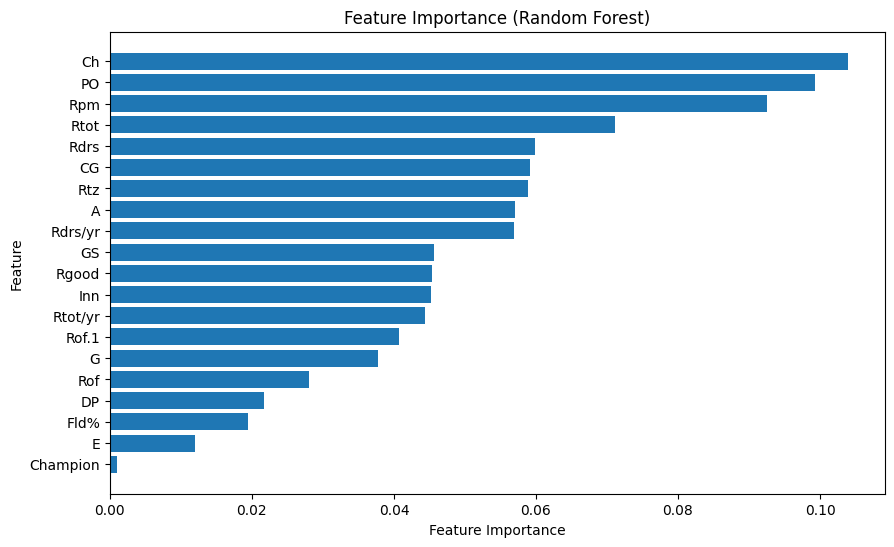

In [199]:
# Feature importance for Random Forest
print("\nFeature Importance for Random Forest:\n")

# Get feature importances and sort by importance
rf_importances = best_rf.feature_importances_
sorted_idx = np.argsort(rf_importances)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh([features[i] for i in sorted_idx], rf_importances[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance (Random Forest)")
plt.gca().invert_yaxis()
plt.show()

In [200]:
# Define hyperparameter grid for Logistic Regression
param_grid_lr = {
    'penalty': ['l1', 'l2'],
    'max_iter': [100, 500, 1000]
}

grid_search_lr = GridSearchCV(
    estimator=LogisticRegression(random_state=1),
    param_grid=param_grid_lr,
    scoring='roc_auc',
    cv=5
)

# Fit GridSearchCV
grid_search_lr.fit(center_field_X_train, center_field_y_train)

# Get the best model
best_lr = grid_search_lr.best_estimator_
print("\nBest Hyperparameters for Logistic Regression:")
print(grid_search_lr.best_params_)

# Predict probabilities for class 1
y_pred_prob_lr = best_lr.predict_proba(center_field_X_test)[:, 1]

# Add probabilities to the test dataset
center_field_test_data['LR_Probability_Class_1'] = y_pred_prob_lr

# Predict class labels for the test set
y_pred_lr = best_lr.predict(center_field_X_test)

# Evaluate the model
print("\nClassification Report for Logistic Regression:")
print(classification_report(center_field_y_test, y_pred_lr))
print(f"ROC AUC Score for Logistic Regression: {roc_auc_score(center_field_y_test, y_pred_prob_lr):.4f}")
print(f"Mean Squared Error for Logistic Regression: {mean_squared_error(center_field_y_test, y_pred_prob_lr):.4f}")


# Output top players by league
center_field_test_data_subset = center_field_test_data[['Name', 'Tm', 'Lg', 'Win', 'LR_Probability_Class_1']]
leagues = center_field_test_data_subset.groupby('Lg')
for league, group in leagues:
    print(f"\nTop Players in {league} League for Logistic Regression:")
    top_players = group.sort_values(by='LR_Probability_Class_1', ascending=False).head(10)
    print(top_players[['Name', 'Tm', 'Lg', 'Win', 'LR_Probability_Class_1']])


Best Hyperparameters for Logistic Regression:
{'max_iter': 100, 'penalty': 'l2'}

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       145
           1       1.00      0.50      0.67         2

    accuracy                           0.99       147
   macro avg       1.00      0.75      0.83       147
weighted avg       0.99      0.99      0.99       147

ROC AUC Score for Logistic Regression: 0.8966
Mean Squared Error for Logistic Regression: 0.0108

Top Players in AL League for Logistic Regression:
                 Name   Tm  Lg  Win  LR_Probability_Class_1
128     Leody Taveras  TEX  AL    0                0.312983
39       Jarren Duran  BOS  AL    0                0.201302
13          JJ Bleday  OAK  AL    0                0.133928
45      Tyler Freeman  CLE  AL    0                0.076048
120         Jose Siri  TBR  AL    0                0.036152
105  Ceddanne Rafaela  BOS  AL    0

In [201]:
# Define hyperparameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_gb = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=1),
    param_grid=param_grid_gb,
    scoring='roc_auc',
    cv=5
)

# Fit GridSearchCV
grid_search_gb.fit(center_field_X_train, center_field_y_train)

# Get the best model
best_gb = grid_search_gb.best_estimator_
print("\nBest Hyperparameters for Gradient Boosting:")
print(grid_search_gb.best_params_)

# Predict probabilities for class 1
y_pred_prob_gb = best_gb.predict_proba(center_field_X_test)[:, 1]

# Add probabilities to the test dataset
center_field_test_data['GB_Probability_Class_1'] = y_pred_prob_gb

# Predict class labels for the test set
y_pred_gb = best_gb.predict(center_field_X_test)

# Evaluate the model
print("\nClassification Report for Gradient Boosting:")
print(classification_report(center_field_y_test, y_pred_gb))
print(f"ROC AUC Score for Gradient Boosting: {roc_auc_score(center_field_y_test, y_pred_prob_gb):.4f}")
print(f"Mean Squared Error for Gradient Boosting: {mean_squared_error(center_field_y_test, y_pred_prob_gb):.4f}")

# Output top players by league
center_field_test_data_subset = center_field_test_data[['Name', 'Tm', 'Lg', 'Win', 'GB_Probability_Class_1']]
leagues = center_field_test_data_subset.groupby('Lg')
for league, group in leagues:
    print(f"\nTop Players in {league} League for Gradient Boosting:")
    top_players = group.sort_values(by='GB_Probability_Class_1', ascending=False).head(10)
    print(top_players[['Name', 'Tm', 'Lg', 'Win', 'GB_Probability_Class_1']])


Best Hyperparameters for Gradient Boosting:
{'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       145
           1       0.00      0.00      0.00         2

    accuracy                           0.99       147
   macro avg       0.49      0.50      0.50       147
weighted avg       0.97      0.99      0.98       147

ROC AUC Score for Gradient Boosting: 0.9379
Mean Squared Error for Gradient Boosting: 0.0128

Top Players in AL League for Gradient Boosting:
                 Name   Tm  Lg  Win  GB_Probability_Class_1
17       Byron Buxton  MIN  AL    0                0.146899
13          JJ Bleday  OAK  AL    0                0.034443
128     Leody Taveras  TEX  AL    0                0.012761
120         Jose Siri  TBR  AL    0                0.000209
39       Jarren Duran  BOS  AL   


Feature Importance for Gradient Boosting:



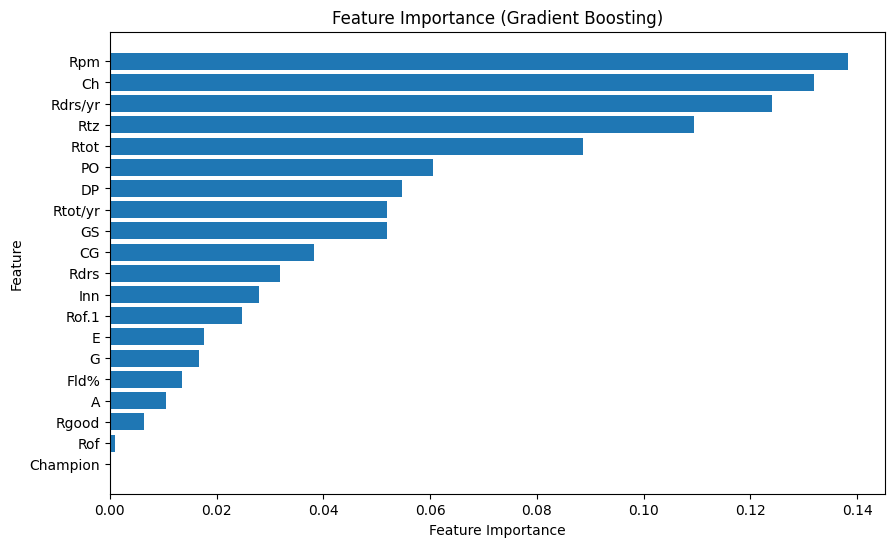

In [202]:
# Feature importance for Gradient Boosting
print("\nFeature Importance for Gradient Boosting:\n")

# Get feature importances and sort by importance
gb_importances = best_gb.feature_importances_
sorted_idx = np.argsort(gb_importances)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh([features[i] for i in sorted_idx], gb_importances[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance (Gradient Boosting)")
plt.gca().invert_yaxis()
plt.show()

In [203]:
# Define the hyperparameter grid for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Perform GridSearchCV to find the best parameters
grid_search_knn = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid_knn,
    scoring='roc_auc',
    cv=5
)

# Fit GridSearchCV
grid_search_knn.fit(center_field_X_train, center_field_y_train)

# Get the best model
best_knn = grid_search_knn.best_estimator_
print("\nBest Hyperparameters for KNN:")
print(grid_search_knn.best_params_)

# Predict probabilities for class 1
y_pred_prob_knn = best_knn.predict_proba(center_field_X_test)[:, 1]  # Probability for class 1

# Add probabilities to the test dataset
center_field_test_data['KNN_Probability_Class_1'] = y_pred_prob_knn

# Predict class labels for the test set
y_pred_knn = best_knn.predict(center_field_X_test)

# Evaluate the model
print("\nClassification Report for KNN:")
print(classification_report(center_field_y_test, y_pred_knn))
print(f"ROC AUC Score for KNN: {roc_auc_score(center_field_y_test, y_pred_prob_knn):.4f}")
print(f"Mean Squared Error for KNN: {mean_squared_error(center_field_y_test, y_pred_prob_knn):.4f}")

# Output top players by league
center_field_test_data_subset = center_field_test_data[['Name', 'Tm', 'Lg', 'Win', 'KNN_Probability_Class_1']]
leagues = center_field_test_data_subset.groupby('Lg')
for league, group in leagues:
    print(f"\nTop Players in {league} League for KNN:")
    top_players = group.sort_values(by='KNN_Probability_Class_1', ascending=False).head(10)
    print(top_players[['Name', 'Tm', 'Lg', 'Win', 'KNN_Probability_Class_1']])



Best Hyperparameters for KNN:
{'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}

Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       145
           1       0.00      0.00      0.00         2

    accuracy                           0.99       147
   macro avg       0.49      0.50      0.50       147
weighted avg       0.97      0.99      0.98       147

ROC AUC Score for KNN: 0.9828
Mean Squared Error for KNN: 0.0110

Top Players in AL League for KNN:
                Name   Tm  Lg  Win  KNN_Probability_Class_1
137   Daulton Varsho  TOR  AL    1                 0.142857
110  Julio Rodríguez  SEA  AL    0                 0.142857
128    Leody Taveras  TEX  AL    0                 0.142857
0       Wilyer Abreu  BOS  AL    0                 0.000000
85      Ryan McKenna  BAL  AL    0                 0.000000
96     Rafael Ortega  CHW  AL    0                 0.000000
92    Cedric Mullins  BAL  AL    0       

In [204]:
# Define hyperparameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel type
    'degree': [2, 3],  # Degree for polynomial kernel
    'gamma': ['scale', 'auto'],  # Kernel coefficient
}

grid_search_svm = GridSearchCV(
    estimator=SVC(probability=True, random_state=1),
    param_grid=param_grid_svm,
    scoring='roc_auc',
    cv=5
)

# Fit GridSearchCV
grid_search_svm.fit(center_field_X_train, center_field_y_train)

# Get the best model
best_svm = grid_search_svm.best_estimator_
print("\nBest Hyperparameters for SVM:")
print(grid_search_svm.best_params_)

# Predict probabilities for class 1
y_pred_prob_svm = best_svm.predict_proba(center_field_X_test)[:, 1]

# Add probabilities to the test dataset
center_field_test_data['SVM_Probability_Class_1'] = y_pred_prob_svm

# Predict class labels for the test set
y_pred_svm = best_svm.predict(center_field_X_test)

# Evaluate the model
print("\nClassification Report for SVM:")
print(classification_report(center_field_y_test, y_pred_svm))
print(f"ROC AUC Score for SVM: {roc_auc_score(center_field_y_test, y_pred_prob_svm):.4f}")
print(f"Mean Squared Error for SVM: {mean_squared_error(center_field_y_test, y_pred_prob_svm):.4f}")

# Output top players by league
center_field_test_data_subset = center_field_test_data[['Name', 'Tm', 'Lg', 'Win', 'SVM_Probability_Class_1']]
leagues = center_field_test_data_subset.groupby('Lg')
for league, group in leagues:
    print(f"\nTop Players in {league} League for SVM:")
    top_players = group.sort_values(by='SVM_Probability_Class_1', ascending=False).head(10)
    print(top_players[['Name', 'Tm', 'Lg', 'Win', 'SVM_Probability_Class_1']])


Best Hyperparameters for SVM:
{'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}

Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       145
           1       0.00      0.00      0.00         2

    accuracy                           0.99       147
   macro avg       0.49      0.50      0.50       147
weighted avg       0.97      0.99      0.98       147

ROC AUC Score for SVM: 0.9276
Mean Squared Error for SVM: 0.0134

Top Players in AL League for SVM:
                Name   Tm  Lg  Win  SVM_Probability_Class_1
128    Leody Taveras  TEX  AL    0                 0.023860
13         JJ Bleday  OAK  AL    0                 0.023800
120        Jose Siri  TBR  AL    0                 0.023613
110  Julio Rodríguez  SEA  AL    0                 0.023365
108  Luis Robert Jr.  CHW  AL    0                 0.023187
39      Jarren Duran  BOS  AL    0                 0.023121
88       Jake Meyers  HOU  AL 

### Right Field

In [205]:
player_right_field

,Name,Age,Tm,Lg,Season,Champion,G,GS,CG,Inn,...,Rtz,Rof,Rdrs,Rdrs/yr,Rpm,Rof.1,Rgood,RF/9,RF/G,Win
0,Wilyer Abreu,25,BOS,AL,2024,0,125,106,66,921.1,...,10,6,17,22.0,9.0,6.0,2.0,2.16,1.77,1
1,Ronald Acuña Jr.,26,ATL,NL,2024,0,48,48,47,428.0,...,-5,2,-7,-20.0,-7.0,0.0,0.0,2.10,2.08,0
2,Jordyn Adams,24,LAA,AL,2024,0,6,5,5,45.0,...,-2,-1,-1,-27.0,0.0,-1.0,0.0,1.80,1.50,0
3,Jo Adell,25,LAA,AL,2024,0,119,113,110,1001.2,...,10,-2,6,7.0,7.0,-2.0,1.0,2.08,1.94,0
4,Kevin Alcántara,21,CHC,NL,2024,0,3,3,2,26.0,...,1,0,0,0.0,0.0,0.0,0.0,0.69,0.67,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2613,Dewayne Wise,35,CHW,AL,2013,0,1,0,0,1.0,...,0,0,0,0.0,NaN,NaN,NaN,0.00,0.00,0
2614,Chris Young,29,OAK,AL,2013,0,26,21,16,194.0,...,1,-1,-2,-12.0,1.0,-2.0,-1.0,3.06,2.54,0
2615,Delmon Young,27,PHI,NL,2013,0,65,64,31,503.1,...,-7,-1,-7,-16.0,-8.0,0.0,1.0,2.13,1.83,0
2616,Eric Young Jr.,28,COL,NL,2013,0,20,20,14,168.0,...,-7,-1,-6,-43.0,-4.0,-2.0,0.0,1.39,1.30,0


In [206]:
league_right_field

,Season,Lg,#Fld,RA/G,G,GS,CG,Inn,Ch,PO,...,Fld%,Rtot,Rtot/yr,Rtz,Rof,Rdrs,Rdrs/yr,Rpm,Rof.1,Rgood
0,2024,AL,8,4.34,162,162,128,1436,341,328,...,0.986,4,0,4,0,19,0,1,0,0
1,2023,AL,8,4.57,162,162,127,1439,352,337,...,0.987,3,0,3,1,10,0,-1,-1,0
2,2022,AL,9,4.20,162,162,124,1437,355,342,...,0.988,6,0,5,1,24,0,1,0,0
3,2021,AL,8,4.58,162,162,132,1423,342,328,...,0.985,3,0,3,0,9,0,0,0,1
4,2020,AL,5,4.63,60,60,49,519,121,116,...,0.984,1,0,0,1,4,0,0,1,0
5,2019,AL,8,4.95,162,162,136,1446,339,325,...,0.983,2,0,2,0,-8,0,-1,0,0
6,2018,AL,7,4.56,162,162,134,1444,338,323,...,0.986,3,0,3,0,-4,0,-2,1,1
7,2017,AL,7,4.67,162,162,136,1442,333,318,...,0.982,3,0,2,1,6,0,-1,1,0
8,2016,AL,7,4.47,162,162,131,1441,341,325,...,0.986,2,0,1,1,9,0,-2,2,1
9,2015,AL,8,4.29,162,162,133,1446,329,313,...,0.985,0,0,0,0,-4,0,-4,0,1


In [207]:
# Drop unwanted columns
player_right_field = player_right_field.drop(columns=['RF/9', 'RF/G'])
league_right_field = league_right_field.drop(columns=['#Fld', 'RA/G'])

In [208]:
# Check for missing values
missing_values = player_right_field.isnull().sum()
print("Missing Values:")
print(missing_values[missing_values > 0])

Missing Values:
Fld%       261
Rtot/yr      4
Rdrs/yr      4
Rpm        106
Rof.1      159
Rgood      159
dtype: int64


In [209]:
# Drop rows with missing values
player_right_field = player_right_field.dropna()

In [230]:
# Generate basic statistics
print(player_right_field.describe())

               Age       Season     Champion            G           GS  \
count  2356.000000  2356.000000  2356.000000  2356.000000  2356.000000   
mean     27.759762  2018.670628     0.054329    27.976655    23.429117   
std       3.596650     3.448155     0.226715    36.598074    35.034403   
min      20.000000  2013.000000     0.000000     1.000000     0.000000   
25%      25.000000  2016.000000     0.000000     4.000000     2.000000   
50%      27.000000  2019.000000     0.000000    12.000000     8.000000   
75%      30.000000  2022.000000     0.000000    34.250000    28.000000   
max      45.000000  2024.000000     1.000000   162.000000   162.000000   

                CG          Inn           Ch           PO            A  ...  \
count  2356.000000  2356.000000  2356.000000  2356.000000  2356.000000  ...   
mean     19.009762   208.131027    48.382428    46.264431     1.379032  ...   
std      31.589463   306.670713    71.611136    68.609298     2.387914  ...   
min       0.00000

In [210]:
# Display the column names
player_right_field.columns

Index(['Name', 'Age', 'Tm', 'Lg', 'Season', 'Champion', 'G', 'GS', 'CG', 'Inn',
       'Ch', 'PO', 'A', 'E', 'DP', 'Fld%', 'Rtot', 'Rtot/yr', 'Rtz', 'Rof',
       'Rdrs', 'Rdrs/yr', 'Rpm', 'Rof.1', 'Rgood', 'Win'],
      dtype='object')

In [211]:
# Merge player and league datasets on 'Season' and 'Lg', keeping all player rows
right_field = player_right_field.merge(
    league_right_field,
    on=["Season", "Lg"],
    suffixes=("_player", "_league"),
    how="left"
)

# Add the 'Win' column to the merged dataset
right_field["Win"] = player_right_field["Win"].values

# List of columns containing player and league metrics to be normalized
columns = [
    "G", "GS", "CG", "Inn", "Ch", "PO", "A", "E", "DP", "Fld%", 
    "Rtot", "Rtot/yr", "Rtz", "Rof", "Rdrs", "Rdrs/yr", "Rpm",
    'Rof.1', "Rgood"
]

# Create a copy of the merged dataset for normalization
normalized_right_field = right_field.copy()

# Normalize the columns with player fielding metrics
for col in columns:
    if f"{col}_player" in right_field and f"{col}_league" in right_field:
        # Perform normalization and handle invalid values
        normalized_col = right_field[f"{col}_player"] / right_field[f"{col}_league"]
        normalized_col.replace([float('inf'), float('-inf')], pd.NA, inplace=True)  # Replace inf with NA
        normalized_col.fillna(right_field[f"{col}_player"], inplace=True)  # Revert to original value if invalid
        normalized_right_field[col] = normalized_col

# Drop extra columns from normalization dataset
for col in columns:
    normalized_right_field = normalized_right_field.drop(columns=[f"{col}_player", f"{col}_league"], errors='ignore')


In [212]:
normalized_right_field

,Name,Age,Tm,Lg,Season,Champion,Win,G,GS,CG,...,Fld%,Rtot,Rtot/yr,Rtz,Rof,Rdrs,Rdrs/yr,Rpm,Rof.1,Rgood
0,Wilyer Abreu,25,BOS,AL,2024,0,1,0.771605,0.654321,0.515625,...,0.982759,4.000000,21.0,2.500000,6.0,0.894737,22.0,9.000000,6.0,2.0
1,Ronald Acuña Jr.,26,ATL,NL,2024,0,0,0.296296,0.296296,0.388430,...,0.993915,1.333333,-10.0,1.666667,2.0,-0.583333,-20.0,-7.000000,-0.0,0.0
2,Jordyn Adams,24,LAA,AL,2024,0,0,0.037037,0.030864,0.039062,...,0.912779,-0.750000,-69.0,-0.500000,-1.0,-0.052632,-27.0,0.000000,-1.0,0.0
3,Jo Adell,25,LAA,AL,2024,0,0,0.734568,0.697531,0.859375,...,0.996957,2.000000,9.0,2.500000,-2.0,0.315789,7.0,7.000000,-2.0,1.0
4,Kevin Alcántara,21,CHC,NL,2024,0,0,0.018519,0.018519,0.016529,...,1.014199,-0.333333,49.0,-0.333333,0.0,0.000000,0.0,0.000000,-0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,Jayson Werth,34,WSN,NL,2013,0,0,0.777778,0.777778,0.804511,...,1.007107,0.000000,0.0,-0.333333,1.0,-0.500000,-1.0,0.000000,2.0,-1.0
2352,Chris Young,29,OAK,AL,2013,0,0,0.160494,0.129630,0.117647,...,0.988798,-0.000000,0.0,-0.500000,-1.0,0.100000,-12.0,-0.500000,-2.0,-1.0
2353,Delmon Young,27,PHI,NL,2013,0,0,0.401235,0.395062,0.233083,...,0.974619,-2.666667,-19.0,-2.333333,-1.0,-3.500000,-16.0,-2.666667,-0.0,-1.0
2354,Eric Young Jr.,28,COL,NL,2013,0,0,0.123457,0.123457,0.105263,...,0.977665,-2.666667,-54.0,-2.333333,-1.0,-3.000000,-43.0,-1.333333,2.0,-0.0


In [213]:
# Split the data into training and testing sets
right_field_train_data = normalized_right_field[normalized_right_field['Season'] != 2024]
right_field_test_data = normalized_right_field[normalized_right_field['Season'] == 2024]

# Define features and target
features = [
    'Champion', 'G', 'GS', 'CG', 'Inn', 'Ch', 'PO', 'A', 'E', 'DP',
    'Fld%', 'Rtot', 'Rtot/yr', 'Rtz', 'Rof', 'Rdrs', 'Rdrs/yr', 'Rpm',
    'Rof.1', 'Rgood'
]
target = 'Win'

# Extract features and target
right_field_X_train = right_field_train_data[features]
right_field_y_train = right_field_train_data[target]
right_field_X_test = right_field_test_data[features]
right_field_y_test = right_field_test_data[target]

In [214]:
# Define hyperparameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=1),
    param_grid=param_grid_rf,
    scoring='roc_auc',
    cv=5
)

# Fit GridSearchCV
grid_search_rf.fit(right_field_X_train, right_field_y_train)

# Get the best model
best_rf = grid_search_rf.best_estimator_
print("\nBest Hyperparameters for Random Forest:")
print(grid_search_rf.best_params_)

# Predict probabilities for class 1
y_pred_prob_rf = best_rf.predict_proba(right_field_X_test)[:, 1]

# Add probabilities to the test dataset
right_field_test_data['RF_Probability_Class_1'] = y_pred_prob_rf

# Predict class labels for the test set
y_pred_rf = best_rf.predict(right_field_X_test)

# Evaluate the model
print("\nClassification Report for Random Forest:")
print(classification_report(right_field_y_test, y_pred_rf))
print(f"ROC AUC Score for Random Forest: {roc_auc_score(right_field_y_test, y_pred_prob_rf):.4f}")
print(f"Mean Squared Error for Random Forest: {mean_squared_error(right_field_y_test, y_pred_prob_rf):.4f}")

# Output top players by league
right_field_test_data_subset = right_field_test_data[['Name', 'Tm', 'Lg', 'Win', 'RF_Probability_Class_1']]
leagues = right_field_test_data_subset.groupby('Lg')
for league, group in leagues:
    print(f"\nTop Players in {league} League for Random Forest:")
    top_players = group.sort_values(by='RF_Probability_Class_1', ascending=False).head(10)
    print(top_players[['Name', 'Tm', 'Lg', 'Win', 'RF_Probability_Class_1']])


Best Hyperparameters for Random Forest:
{'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       198
           1       0.00      0.00      0.00         2

    accuracy                           0.99       200
   macro avg       0.49      0.50      0.50       200
weighted avg       0.98      0.99      0.99       200

ROC AUC Score for Random Forest: 0.9924
Mean Squared Error for Random Forest: 0.0072

Top Players in AL League for Random Forest:
                  Name   Tm  Lg  Win  RF_Probability_Class_1
0         Wilyer Abreu  BOS  AL    1                0.297635
165          Juan Soto  NYY  AL    0                0.129958
67       Adolis García  TEX  AL    0                0.022667
180        Kyle Tucker  HOU  AL    0                0.019750
3             Jo Adell  LAA  AL    0            


Feature Importance for Random Forest:



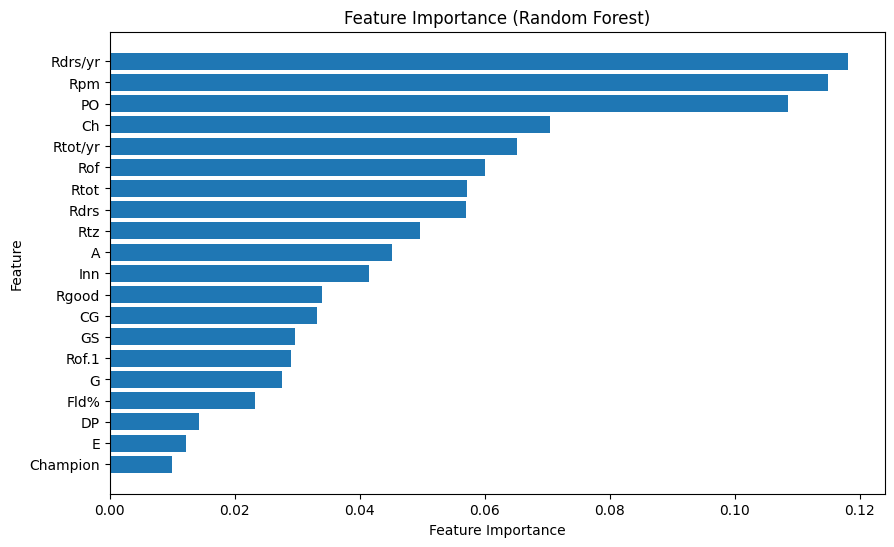

In [215]:
# Feature importance for Random Forest
print("\nFeature Importance for Random Forest:\n")

# Get feature importances and sort by importance
rf_importances = best_rf.feature_importances_
sorted_idx = np.argsort(rf_importances)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh([features[i] for i in sorted_idx], rf_importances[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance (Random Forest)")
plt.gca().invert_yaxis()
plt.show()

In [216]:
# Define hyperparameter grid for Logistic Regression
param_grid_lr = {
    'penalty': ['l1', 'l2'],
    'max_iter': [100, 500, 1000]
}

grid_search_lr = GridSearchCV(
    estimator=LogisticRegression(random_state=1),
    param_grid=param_grid_lr,
    scoring='roc_auc',
    cv=5
)

# Fit GridSearchCV
grid_search_lr.fit(right_field_X_train, right_field_y_train)

# Get the best model
best_lr = grid_search_lr.best_estimator_
print("\nBest Hyperparameters for Logistic Regression:")
print(grid_search_lr.best_params_)

# Predict probabilities for class 1
y_pred_prob_lr = best_lr.predict_proba(right_field_X_test)[:, 1]

# Add probabilities to the test dataset
right_field_test_data['LR_Probability_Class_1'] = y_pred_prob_lr

# Predict class labels for the test set
y_pred_lr = best_lr.predict(right_field_X_test)

# Evaluate the model
print("\nClassification Report for Logistic Regression:")
print(classification_report(right_field_y_test, y_pred_lr))
print(f"ROC AUC Score for Logistic Regression: {roc_auc_score(right_field_y_test, y_pred_prob_lr):.4f}")
print(f"Mean Squared Error for Logistic Regression: {mean_squared_error(right_field_y_test, y_pred_prob_lr):.4f}")


# Output top players by league
right_field_test_data_subset = right_field_test_data[['Name', 'Tm', 'Lg', 'Win', 'LR_Probability_Class_1']]
leagues = right_field_test_data_subset.groupby('Lg')
for league, group in leagues:
    print(f"\nTop Players in {league} League for Logistic Regression:")
    top_players = group.sort_values(by='LR_Probability_Class_1', ascending=False).head(10)
    print(top_players[['Name', 'Tm', 'Lg', 'Win', 'LR_Probability_Class_1']])


Best Hyperparameters for Logistic Regression:
{'max_iter': 500, 'penalty': 'l2'}

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       198
           1       0.00      0.00      0.00         2

    accuracy                           0.98       200
   macro avg       0.49      0.50      0.50       200
weighted avg       0.98      0.98      0.98       200

ROC AUC Score for Logistic Regression: 0.9646
Mean Squared Error for Logistic Regression: 0.0119

Top Players in AL League for Logistic Regression:
                  Name   Tm  Lg  Win  LR_Probability_Class_1
165          Juan Soto  NYY  AL    0                0.776797
67       Adolis García  TEX  AL    0                0.140331
0         Wilyer Abreu  BOS  AL    1                0.130564
180        Kyle Tucker  HOU  AL    0                0.019834
148     Hunter Renfroe  KCR  AL    0                0.018758
93      Daniel Johnson  BAL  

In [217]:
# Define hyperparameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_gb = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=1),
    param_grid=param_grid_gb,
    scoring='roc_auc',
    cv=5
)

# Fit GridSearchCV
grid_search_gb.fit(right_field_X_train, right_field_y_train)

# Get the best model
best_gb = grid_search_gb.best_estimator_
print("\nBest Hyperparameters for Gradient Boosting:")
print(grid_search_gb.best_params_)

# Predict probabilities for class 1
y_pred_prob_gb = best_gb.predict_proba(right_field_X_test)[:, 1]

# Add probabilities to the test dataset
right_field_test_data['GB_Probability_Class_1'] = y_pred_prob_gb

# Predict class labels for the test set
y_pred_gb = best_gb.predict(right_field_X_test)

# Evaluate the model
print("\nClassification Report for Gradient Boosting:")
print(classification_report(right_field_y_test, y_pred_gb))
print(f"ROC AUC Score for Gradient Boosting: {roc_auc_score(right_field_y_test, y_pred_prob_gb):.4f}")
print(f"Mean Squared Error for Gradient Boosting: {mean_squared_error(right_field_y_test, y_pred_prob_gb):.4f}")

# Output top players by league
right_field_test_data_subset = right_field_test_data[['Name', 'Tm', 'Lg', 'Win', 'GB_Probability_Class_1']]
leagues = right_field_test_data_subset.groupby('Lg')
for league, group in leagues:
    print(f"\nTop Players in {league} League for Gradient Boosting:")
    top_players = group.sort_values(by='GB_Probability_Class_1', ascending=False).head(10)
    print(top_players[['Name', 'Tm', 'Lg', 'Win', 'GB_Probability_Class_1']])


Best Hyperparameters for Gradient Boosting:
{'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}

Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       198
           1       0.50      0.50      0.50         2

    accuracy                           0.99       200
   macro avg       0.75      0.75      0.75       200
weighted avg       0.99      0.99      0.99       200

ROC AUC Score for Gradient Boosting: 0.9836
Mean Squared Error for Gradient Boosting: 0.0084

Top Players in AL League for Gradient Boosting:
                  Name   Tm  Lg  Win  GB_Probability_Class_1
0         Wilyer Abreu  BOS  AL    1                0.832788
165          Juan Soto  NYY  AL    0                0.811542
67       Adolis García  TEX  AL    0                0.000075
156  Anthony Santander  BAL  AL    0                0.000037
148     Hunter Renfroe  KCR 


Feature Importance for Gradient Boosting:



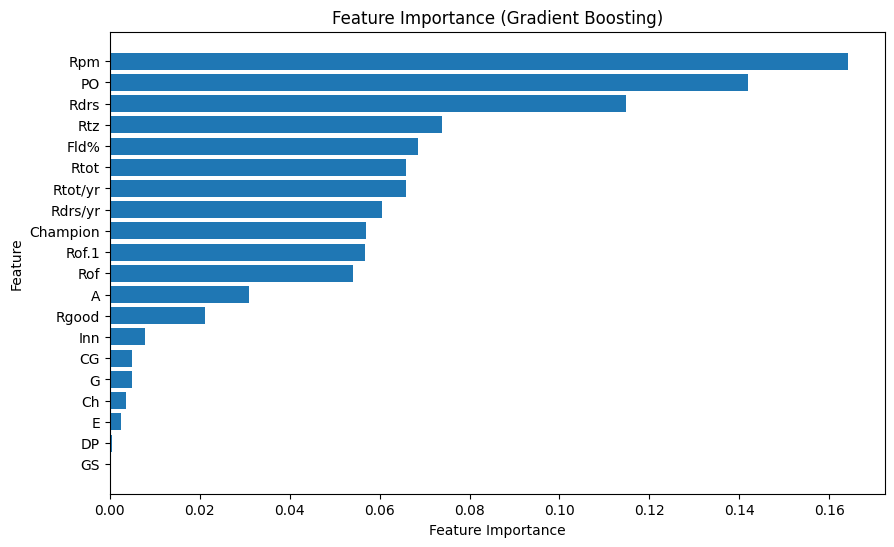

In [218]:
# Feature importance for Gradient Boosting
print("\nFeature Importance for Gradient Boosting:\n")

# Get feature importances and sort by importance
gb_importances = best_gb.feature_importances_
sorted_idx = np.argsort(gb_importances)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh([features[i] for i in sorted_idx], gb_importances[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance (Gradient Boosting)")
plt.gca().invert_yaxis()
plt.show()

In [219]:
# Define the hyperparameter grid for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Perform GridSearchCV to find the best parameters
grid_search_knn = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid_knn,
    scoring='roc_auc',
    cv=5
)

# Fit GridSearchCV
grid_search_knn.fit(right_field_X_train, right_field_y_train)

# Get the best model
best_knn = grid_search_knn.best_estimator_
print("\nBest Hyperparameters for KNN:")
print(grid_search_knn.best_params_)

# Predict probabilities for class 1
y_pred_prob_knn = best_knn.predict_proba(right_field_X_test)[:, 1]  # Probability for class 1

# Add probabilities to the test dataset
right_field_test_data['KNN_Probability_Class_1'] = y_pred_prob_knn

# Predict class labels for the test set
y_pred_knn = best_knn.predict(right_field_X_test)

# Evaluate the model
print("\nClassification Report for KNN:")
print(classification_report(right_field_y_test, y_pred_knn))
print(f"ROC AUC Score for KNN: {roc_auc_score(right_field_y_test, y_pred_prob_knn):.4f}")
print(f"Mean Squared Error for KNN: {mean_squared_error(right_field_y_test, y_pred_prob_knn):.4f}")

# Output top players by league
right_field_test_data_subset = right_field_test_data[['Name', 'Tm', 'Lg', 'Win', 'KNN_Probability_Class_1']]
leagues = right_field_test_data_subset.groupby('Lg')
for league, group in leagues:
    print(f"\nTop Players in {league} League for KNN:")
    top_players = group.sort_values(by='KNN_Probability_Class_1', ascending=False).head(10)
    print(top_players[['Name', 'Tm', 'Lg', 'Win', 'KNN_Probability_Class_1']])



Best Hyperparameters for KNN:
{'n_neighbors': 11, 'p': 1, 'weights': 'distance'}

Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       198
           1       0.00      0.00      0.00         2

    accuracy                           0.99       200
   macro avg       0.49      0.50      0.50       200
weighted avg       0.98      0.99      0.99       200

ROC AUC Score for KNN: 0.7475
Mean Squared Error for KNN: 0.0081

Top Players in AL League for KNN:
                Name   Tm  Lg  Win  KNN_Probability_Class_1
0       Wilyer Abreu  BOS  AL    1                 0.213799
165        Juan Soto  NYY  AL    0                 0.078733
180      Kyle Tucker  HOU  AL    0                 0.071969
102   Trevor Larnach  MIN  AL    0                 0.000000
124      MJ Melendez  KCR  AL    0                 0.000000
141       Tommy Pham  CHW  AL    0                 0.000000
140    Wenceel Pérez  DET  AL    0     

In [220]:
# Define hyperparameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel type
    'degree': [2, 3],  # Degree for polynomial kernel
    'gamma': ['scale', 'auto'],  # Kernel coefficient
}

grid_search_svm = GridSearchCV(
    estimator=SVC(probability=True, random_state=1),
    param_grid=param_grid_svm,
    scoring='roc_auc',
    cv=5
)

# Fit GridSearchCV
grid_search_svm.fit(right_field_X_train, right_field_y_train)

# Get the best model
best_svm = grid_search_svm.best_estimator_
print("\nBest Hyperparameters for SVM:")
print(grid_search_svm.best_params_)

# Predict probabilities for class 1
y_pred_prob_svm = best_svm.predict_proba(right_field_X_test)[:, 1]

# Add probabilities to the test dataset
right_field_test_data['SVM_Probability_Class_1'] = y_pred_prob_svm

# Predict class labels for the test set
y_pred_svm = best_svm.predict(right_field_X_test)

# Evaluate the model
print("\nClassification Report for SVM:")
print(classification_report(right_field_y_test, y_pred_svm))
print(f"ROC AUC Score for SVM: {roc_auc_score(right_field_y_test, y_pred_prob_svm):.4f}")
print(f"Mean Squared Error for SVM: {mean_squared_error(right_field_y_test, y_pred_prob_svm):.4f}")

# Output top players by league
right_field_test_data_subset = right_field_test_data[['Name', 'Tm', 'Lg', 'Win', 'SVM_Probability_Class_1']]
leagues = right_field_test_data_subset.groupby('Lg')
for league, group in leagues:
    print(f"\nTop Players in {league} League for SVM:")
    top_players = group.sort_values(by='SVM_Probability_Class_1', ascending=False).head(10)
    print(top_players[['Name', 'Tm', 'Lg', 'Win', 'SVM_Probability_Class_1']])


Best Hyperparameters for SVM:
{'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}

Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       198
           1       0.00      0.00      0.00         2

    accuracy                           0.98       200
   macro avg       0.49      0.49      0.49       200
weighted avg       0.98      0.98      0.98       200

ROC AUC Score for SVM: 0.9520
Mean Squared Error for SVM: 0.0110

Top Players in AL League for SVM:
                 Name   Tm  Lg  Win  SVM_Probability_Class_1
165         Juan Soto  NYY  AL    0                 0.413610
93     Daniel Johnson  BAL  AL    0                 0.088886
67      Adolis García  TEX  AL    0                 0.064586
0        Wilyer Abreu  BOS  AL    1                 0.050370
95       Jahmai Jones  NYY  AL    0                 0.035752
180       Kyle Tucker  HOU  AL    0                 0.029051
96        Aaron Judge 